# All imports necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

import inspect

import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [3]:
%matplotlib inline

In [4]:
sns.set(font_scale=2)

# Auxiliary methods

In [5]:
def plot_separate_histogramms(data, feature_name):
    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(25, 10))
    ax1.hist(data[data.y == 'no'][feature_name],
        bins=20,
        label='no',
        density=True,
        stacked=True,
        color='tab:blue'
    )
    ax1.set_xlabel('{} (y = "no")'.format(feature_name))
    ax1.set_ylabel('count')
    ax2.hist(
        data[data.y == 'yes'][feature_name],
        bins=20,
        label='yes',
        density=True,
        stacked=True,
        color='tab:orange'
    )
    ax2.set_xlabel('{} (y = "yes")'.format(feature_name))
    ax2.set_ylabel('count')
    plt.tight_layout()
    plt.show()

# Read the data

Вычитаем данные в память:

In [6]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv')

Попробуем вывести шапку, глянуть, все ли нормально прочиталось:

In [7]:
data.head()

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                                                                                                                                          
4  56;"services";"married";"high.school";"no";"no...

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"    41188 non-null object
dtypes: object(1)
memory usage: 321.9+ KB


Мешанина какая-то.

Вообще говоря, это произошло потому, что (как вы, возможно заметили) pandas не стал вдумываться в то, что служит в качестве разделителя значений в строке.

Глянем на дефолтные значения параметров метода pd.read_csv:

In [9]:
signature = inspect.signature(pd.read_csv)

for k, v in signature.parameters.items():
    if v.default is not inspect.Parameter.empty and v.default is not None:
        print('Parameter: ', k, ' Default value: ', v.default)

Parameter:  sep  Default value:  ,
Parameter:  header  Default value:  infer
Parameter:  squeeze  Default value:  False
Parameter:  mangle_dupe_cols  Default value:  True
Parameter:  skipinitialspace  Default value:  False
Parameter:  keep_default_na  Default value:  True
Parameter:  na_filter  Default value:  True
Parameter:  verbose  Default value:  False
Parameter:  skip_blank_lines  Default value:  True
Parameter:  parse_dates  Default value:  False
Parameter:  infer_datetime_format  Default value:  False
Parameter:  keep_date_col  Default value:  False
Parameter:  dayfirst  Default value:  False
Parameter:  iterator  Default value:  False
Parameter:  compression  Default value:  infer
Parameter:  decimal  Default value:  b'.'
Parameter:  quotechar  Default value:  "
Parameter:  quoting  Default value:  0
Parameter:  error_bad_lines  Default value:  True
Parameter:  warn_bad_lines  Default value:  True
Parameter:  skipfooter  Default value:  0
Parameter:  doublequote  Default value

И первым же параметром идет, собственно, разделитель, дефолтное значение которого нам не подходит.

Поменяем его и случится счастье:

In [131]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv', sep=';')

Заметили, что выводятся не все столбцы?

Временами это раздражает.

Тут есть два варианта:
- транспонировать вывод метода pd.head();
- поменять дефолтные значения параметров библиотеки pandas, отвечающие за то, как данные отображаются.

Итак, вариант номер раз:

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [12]:
data.head().T

0            1            2            3  \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed            5191         5191         5191         5191   
y                        no           no           no           no   

                          4  
age                      56  
job                services  
marital             married  
education       high.school  
default                  no  
housing                  no  
loan                    yes  
contact           telephone  
month                   may  
day_of_week             mon  
duration                307  
campaign                  1  
pdays                   999  
previous                  0  
poutcome        nonexistent  
emp.var.rate            1.1  
cons.price.idx       93.994  
cons.conf.idx         -36.4  
euribor3m             4.857  
nr.employed            5191  
y                        no

Вариант номер два:

In [13]:
default_columns_count = pd.options.display.max_columns

In [14]:
default_columns_count

20

In [15]:
pd.options.display.max_columns = 21

In [16]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [17]:
pd.options.display.max_columns = default_columns_count

Pandas также позволяет конфиурировать максимальное количество строк для вывода, ширину ячеек, точность вывода чисел с плавающей запятой и [Многое другое](https://pandas.pydata.org/pandas-docs/stable/options.html).

Также стоит время от времени поглядывать на курсы типа [вот этого](https://www.tutorialspoint.com/python_pandas/index.htm).

Не панацея, но может пригодиться.

# Data description

Нередко данные сопровождаются каким-нибудь описанием.

Правилом хорошего тона является ввести в курс дела, вообще рассказать о том, что это за данные, откуда они взялись, как они собирались, осуществлялась ли какая-то их предобработка.

Не всегда и не на все вопросы есть ответы.

В данном случае у нас есть файлик с описанием признаков:

In [18]:
with open('../data/datasets/TS_Summer_2018/description.txt', 'r') as desc_f:
    for line in desc_f:
        print(line)

п»їAttribute information:



   Input variables:

   # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical)

   3 - marital : marital status (categorical,note: "divorced" means divorced or widowed)

   4 - education (categorical)

   5 - default: has credit in default? (categorical)

   6 - housing: has housing loan? (categorical)

   7 - loan: has personal loan? (categorical)



   # related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical) 

   9 - month: last contact month of year (categorical)

  10 - day_of_week: last contact day of the week (categorical)

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should 

Уже что-то.

Знаем, что:
- в нашем распоряжении 20 признаков:
- из них половина - вещественные;
- как минимум один из признаков нет смысла рассматривать в качестве предиктора в модели (очевидно, что если клиент на звонок не ответил, то его ответ "no", да и после звонка оператора тоже понятно, каков ответ клиента, однако на момент, когда клиенту еще не звонили, мы не знаем продолжительность звонка).

# Univariate analysis

Ладно, данные прочитали, посмотрели, сколько столбцов (признаков), примерно поняли, что это за признаки.

Дальше что?

Ну надо бы глянуть теперь для начала на каждый из этих признаков по отдельности.

Зачем?

Как минимум, чтобы понять:
- сколько в данных вещественных признаков;
- сколько в данных категориальных признаков;
- на каком количестве категориальных признаков установлено отношение порядка;
- есть ли среди категориальных признаков бинарные;
- как распределены признаки;
- есть ли отчетливо различимые выбросы;
- как соотносятся отдельно взятые признаки с целевой переменной, значение которой нам надо предсказывать;
- и т.д.

## Separate features description

### Pandas descriptive statistics

Из предыдущей лекции (да наверняка и из своего опыта) вы знаете, что есть такой прекрасный метод в pandas как describe:

In [19]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Думаю, ни для кого не секрет, что и по отдельности можно с пеомощью этого метода глянуть на описательные статистики:

In [20]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

### Pandas profiling

Тем не менее, в ряде случаев этого бывает недостаточно и нужно формировать более подробное описание.

Для такой ситуации добрые люди написали PandasProfiling.

Собственно, это библиотечка, которая в одну строку позволяет получить довольно подробное описание данных:

In [21]:
pandas_profiling.ProfileReport(data)

Как вы видите, профайлер для каждого признака определил, является ли он вещественным или категориальным и соответствующим образом сформировал отчет по описательным статистикам.

Очень здорово, однако бывает так, что хотелось бы этими мета-данными как-то поманипулировать.

Например, есть набор данных, в нем какое-то количество признаков и надо взять только те, которые, предположим:
- являются вещественными\категориальными;
- содержат не больше {скольки-то}% пропусков.

Для этого данный отчет можно получить в слегка иной форме:

In [22]:
profiling_report = pandas_profiling.ProfileReport(data)

In [23]:
type(profiling_report)

pandas_profiling.ProfileReport

In [24]:
dir(profiling_report)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'description_set',
 'file',
 'get_description',
 'get_rejected_variables',
 'html',
 'to_file',
 'to_html']

Смотрите-ка, есть тут кое что интересное, в частности все, что идет после поля \_repr_html_.

глянем, что оттуда можно выцепить:

In [25]:
type(profiling_report.get_description())

dict

In [26]:
profiling_report.get_description().keys()

dict_keys(['table', 'variables', 'freq', 'correlations'])

In [27]:
type(profiling_report.get_description()['table'])

dict

In [28]:
profiling_report.get_description()['table'].keys()

dict_keys(['n', 'nvar', 'total_missing', 'n_duplicates', 'memsize', 'recordsize', 'NUM', 'DATE', 'CONST', 'CAT', 'UNIQUE', 'CORR', 'RECODED', 'BOOL', 'UNSUPPORTED', 'REJECTED'])

In [29]:
for k, v in profiling_report.get_description()['table'].items():
    print(k, v)

n 41188
nvar 21
total_missing 0.0
n_duplicates 12
memsize 6.6 MiB
recordsize 168.0 B
NUM 8
DATE 0
CONST 0
CAT 11
UNIQUE 0
CORR 2
RECODED 0
BOOL 0
UNSUPPORTED 0
REJECTED 2


In [30]:
type(profiling_report.get_description()['variables'])

pandas.core.frame.DataFrame

In [31]:
profiling_report.get_description()['variables']

type correlation_var correlation  count distinct_count  \
age              NUM             NaN         NaN  41188             78   
campaign         NUM             NaN         NaN  41188             42   
cons.conf.idx    NUM             NaN         NaN  41188             26   
cons.price.idx   NUM             NaN         NaN  41188             26   
contact          CAT             NaN         NaN  41188              2   
day_of_week      CAT             NaN         NaN  41188              5   
default          CAT             NaN         NaN  41188              3   
duration         NUM             NaN         NaN  41188           1544   
education        CAT             NaN         NaN  41188              8   
emp.var.rate     NUM             NaN         NaN  41188             10   
euribor3m       CORR    emp.var.rate    0.972245    NaN            NaN   
housing          CAT             NaN         NaN  41188              3   
job              CAT             NaN         NaN  41188             12   
loan             CAT             NaN         NaN  41188              3   
marital          CAT             NaN         NaN  41188              4   
month            CAT             NaN         NaN  41188             10   
nr.employed     CORR       euribor3m    0.945154    NaN            NaN   
pdays            NUM             NaN         NaN  41188             27   
poutcome         CAT             NaN         NaN  41188              3   
previous         NUM             NaN         NaN  41188              8   
y                CAT             NaN         NaN  41188              2   

               p_missing n_missing p_infinite n_infinite is_unique  \
age                    0         0          0          0     False   
campaign               0         0          0          0     False   
cons.conf.idx          0         0          0          0     False   
cons.price.idx         0         0          0          0     False   
contact                0         0          0          0     False   
day_of_week            0         0          0          0     False   
default                0         0          0          0     False   
duration               0         0          0          0     False   
education              0         0          0          0     False   
emp.var.rate           0         0          0          0     False   
euribor3m            NaN       NaN        NaN        NaN       NaN   
housing                0         0          0          0     False   
job                    0         0          0          0     False   
loan                   0         0          0          0     False   
marital                0         0          0          0     False   
month                  0         0          0          0     False   
nr.employed          NaN       NaN        NaN        NaN       NaN   
pdays                  0         0          0          0     False   
poutcome               0         0          0          0     False   
previous               0         0          0          0     False   
y                      0         0          0          0     False   

                                      ...                            iqr  \
age                                   ...                             15   
campaign                              ...                              2   
cons.conf.idx                         ...                            6.3   
cons.price.idx                        ...                          0.919   
contact                               ...                            NaN   
day_of_week                           ...                            NaN   
default                               ...                            NaN   
duration                              ...                            217   
education                             ...                            NaN   
emp.var.rate                          ...                            3.2   
euribor3m 

In [32]:
type(profiling_report.get_description()['freq'])

dict

In [33]:
profiling_report.get_description()['freq'].keys()

dict_keys(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'])

In [34]:
for _, v in profiling_report.get_description()['freq'].items():
    print(type(v))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [35]:
type(profiling_report.get_description()['correlations'])

dict

In [36]:
profiling_report.get_description()['correlations'].keys()

dict_keys(['pearson', 'spearman'])

In [37]:
profiling_report.get_rejected_variables()

['euribor3m', 'nr.employed']

Итак, у нас уже есть довольно неплохое представление о данных, мы получили набор мета-данных о наших данных, где описаны типы признаков, количество пропусков и много разных других описательных статистик.

Все замечательно, но стоит помнить об одном минусе: сбор такого отчета крайне ресурсоемкий, если речь идет о больших данных.

Речь даже не о сотнях ТБ, PandasProfiling начнет себя плохо чувствовать даже уже ГБ на 8, поэтому его использование оправдано далеко не всегда.

Тем не менее мы пока придержим собранный отчет, он еще чуть ниже пригодится.

## Target analysis

Здесь имеется в виду:
- как распределена целевая переменная;
- как она связана с другими признаками по отдельности;
- есть ли статистически значимые отличия в характеристиках подвыборок с разными значениями целевой;
- и т. д.

Гланем для начала, как вообще записи распределены по целевой переменной:

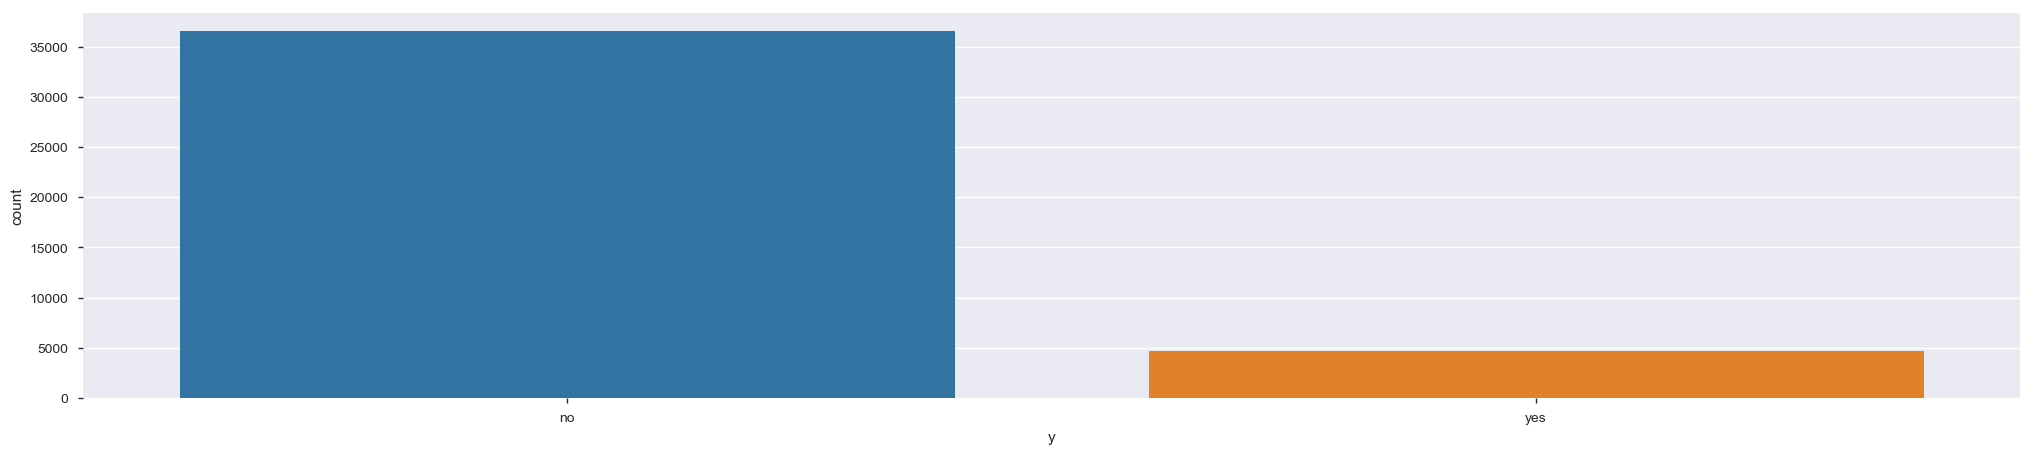

In [38]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', data=data)
plt.show()

Классы очень сильно несбалансированы.

Конечно же, на качество классификации это положительно НЕ повлияет.

Посмотрим теперь по отдельности на каждый признак.

### Continuous features

Дернем из отчета все вещественные признаки и пойдем по очереди их рассматривать:

In [132]:
continuous_features = profiling_report.get_description()['variables'][profiling_report.get_description()['variables'].type == 'NUM'].index.values.tolist()

In [133]:
len(continuous_features)

8

#### Age

Сначала просто посмотрим на то, как клиенты распределены по возрасту (возьмем 10 бинов, чтобы гистограмма не получилась сильно дерганой):

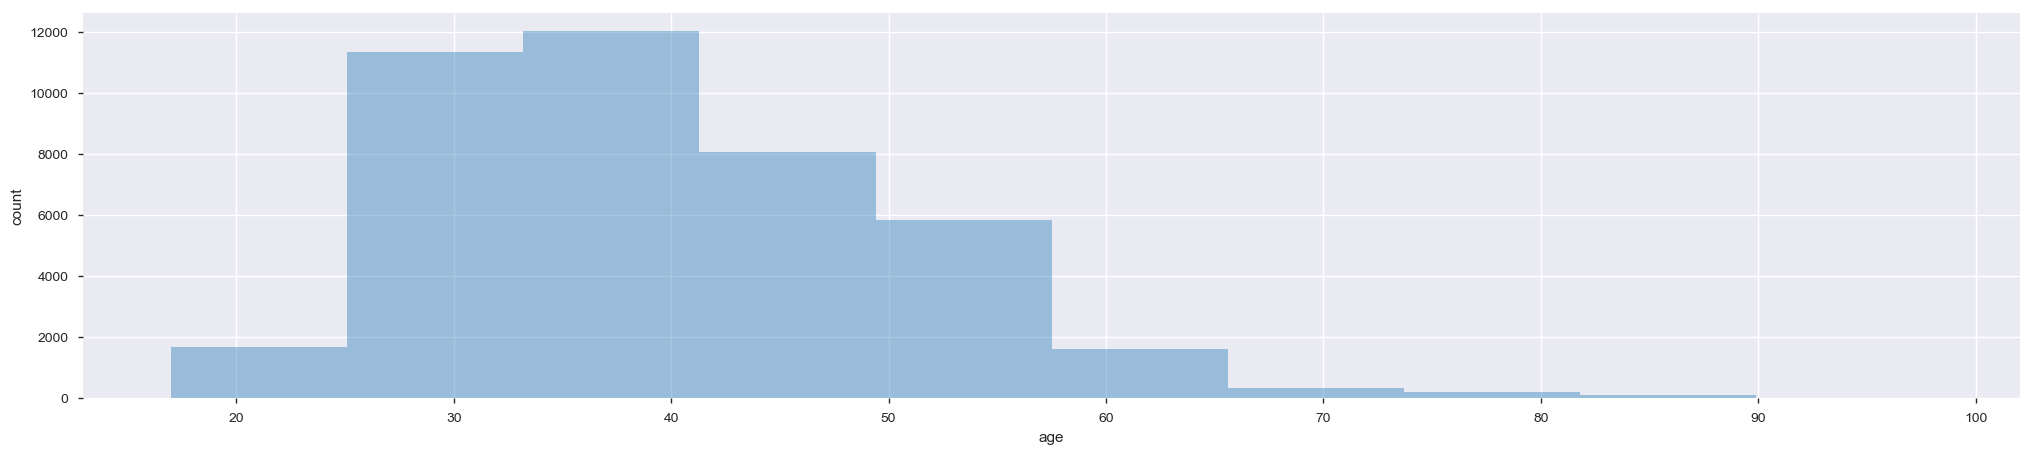

In [41]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[0]], bins=10, kde=False)
plt.ylabel('count')
plt.show()

Не особо радужая картина, распределение дерганое, никакого намека на нормальность, следовательно вариант использования t- и z- тестов для проверки статистически значимых различий среднего возраста в разных группах уже отпадает.

Глянем, можно ли визуально отличить распределение возрастов в группах с положительным и отрицательным значениям признака "y":

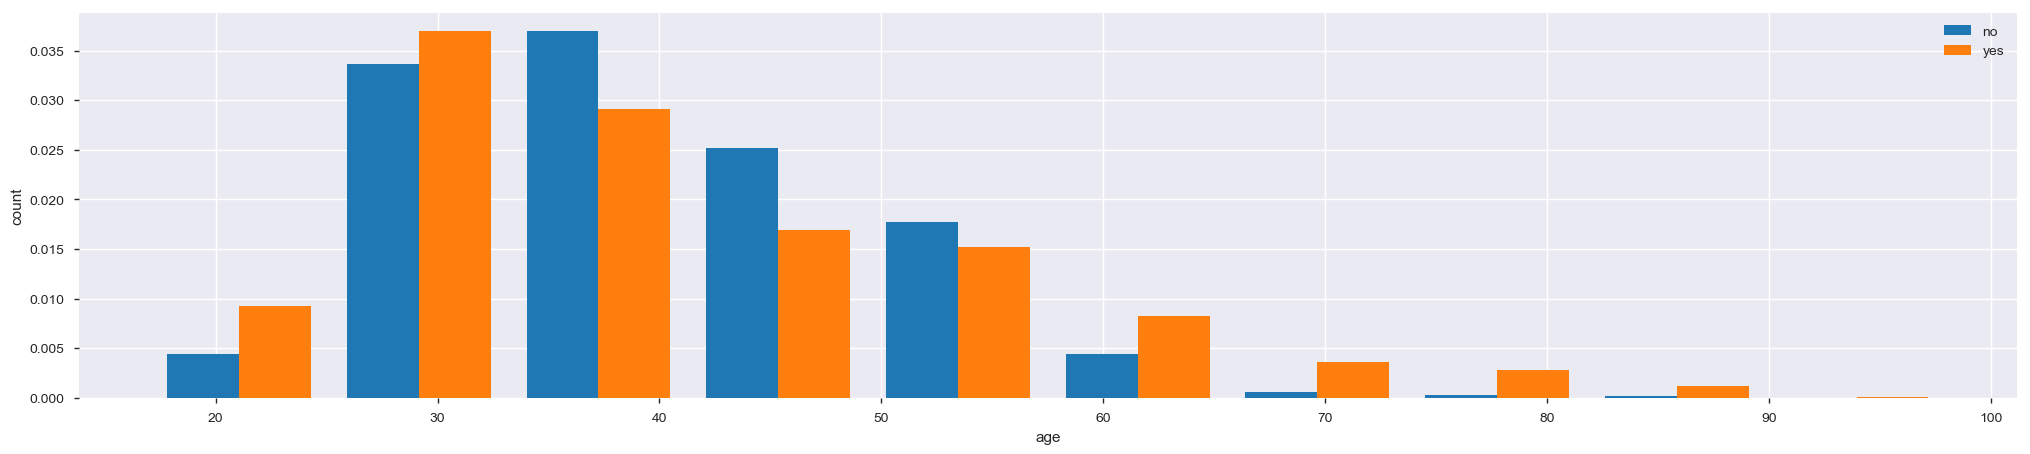

In [42]:
plt.figure(figsize=(25, 5))
plt.hist(
    [data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]]],
    label=['no', 'yes'],
    density=True
)
plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Как-то смотрится не очень.

Возможно, если наложить одну гистограмму на другую, то будет получше:

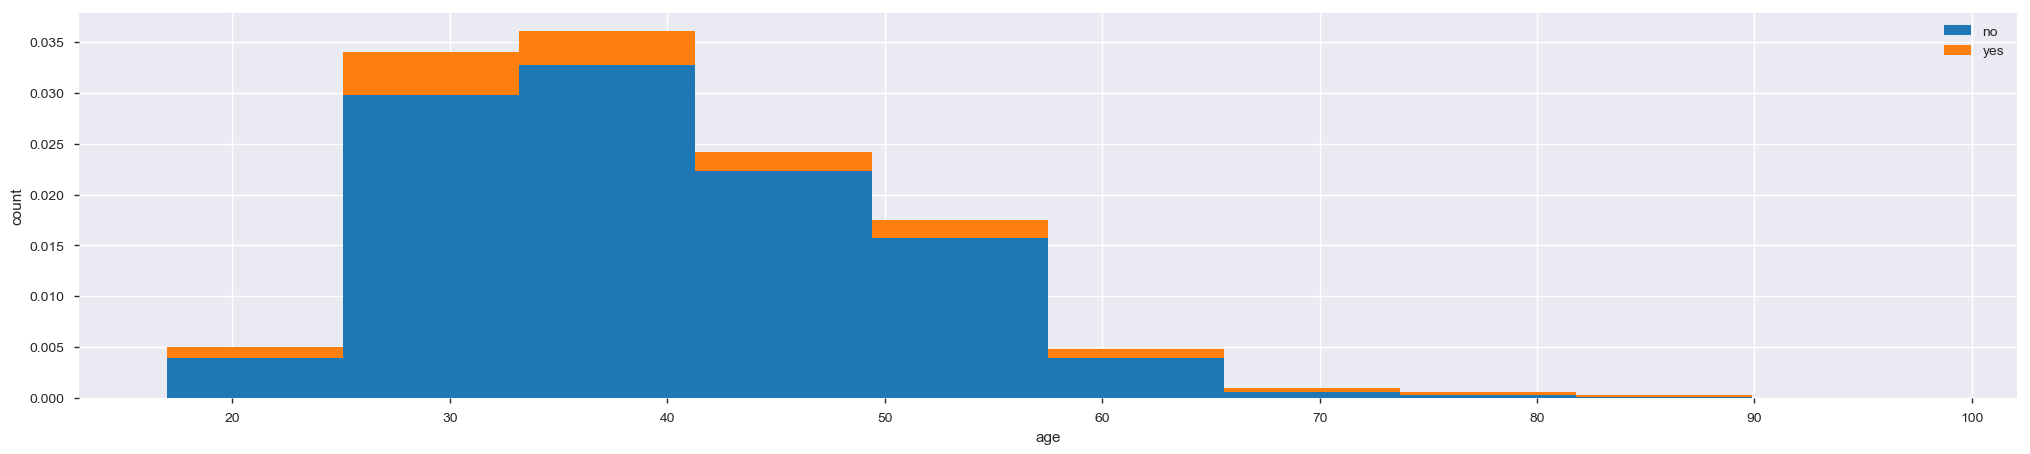

In [43]:
plt.figure(figsize=(25, 5))
plt.hist(
    [data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]]],
    label=['no', 'yes'],
    density=True,
    stacked=True
)
plt.legend()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Глянем на них еще по отдельности, поскольку все равно еще как-то не особо понятно, как они (распределения) друг с другом соотносятся:

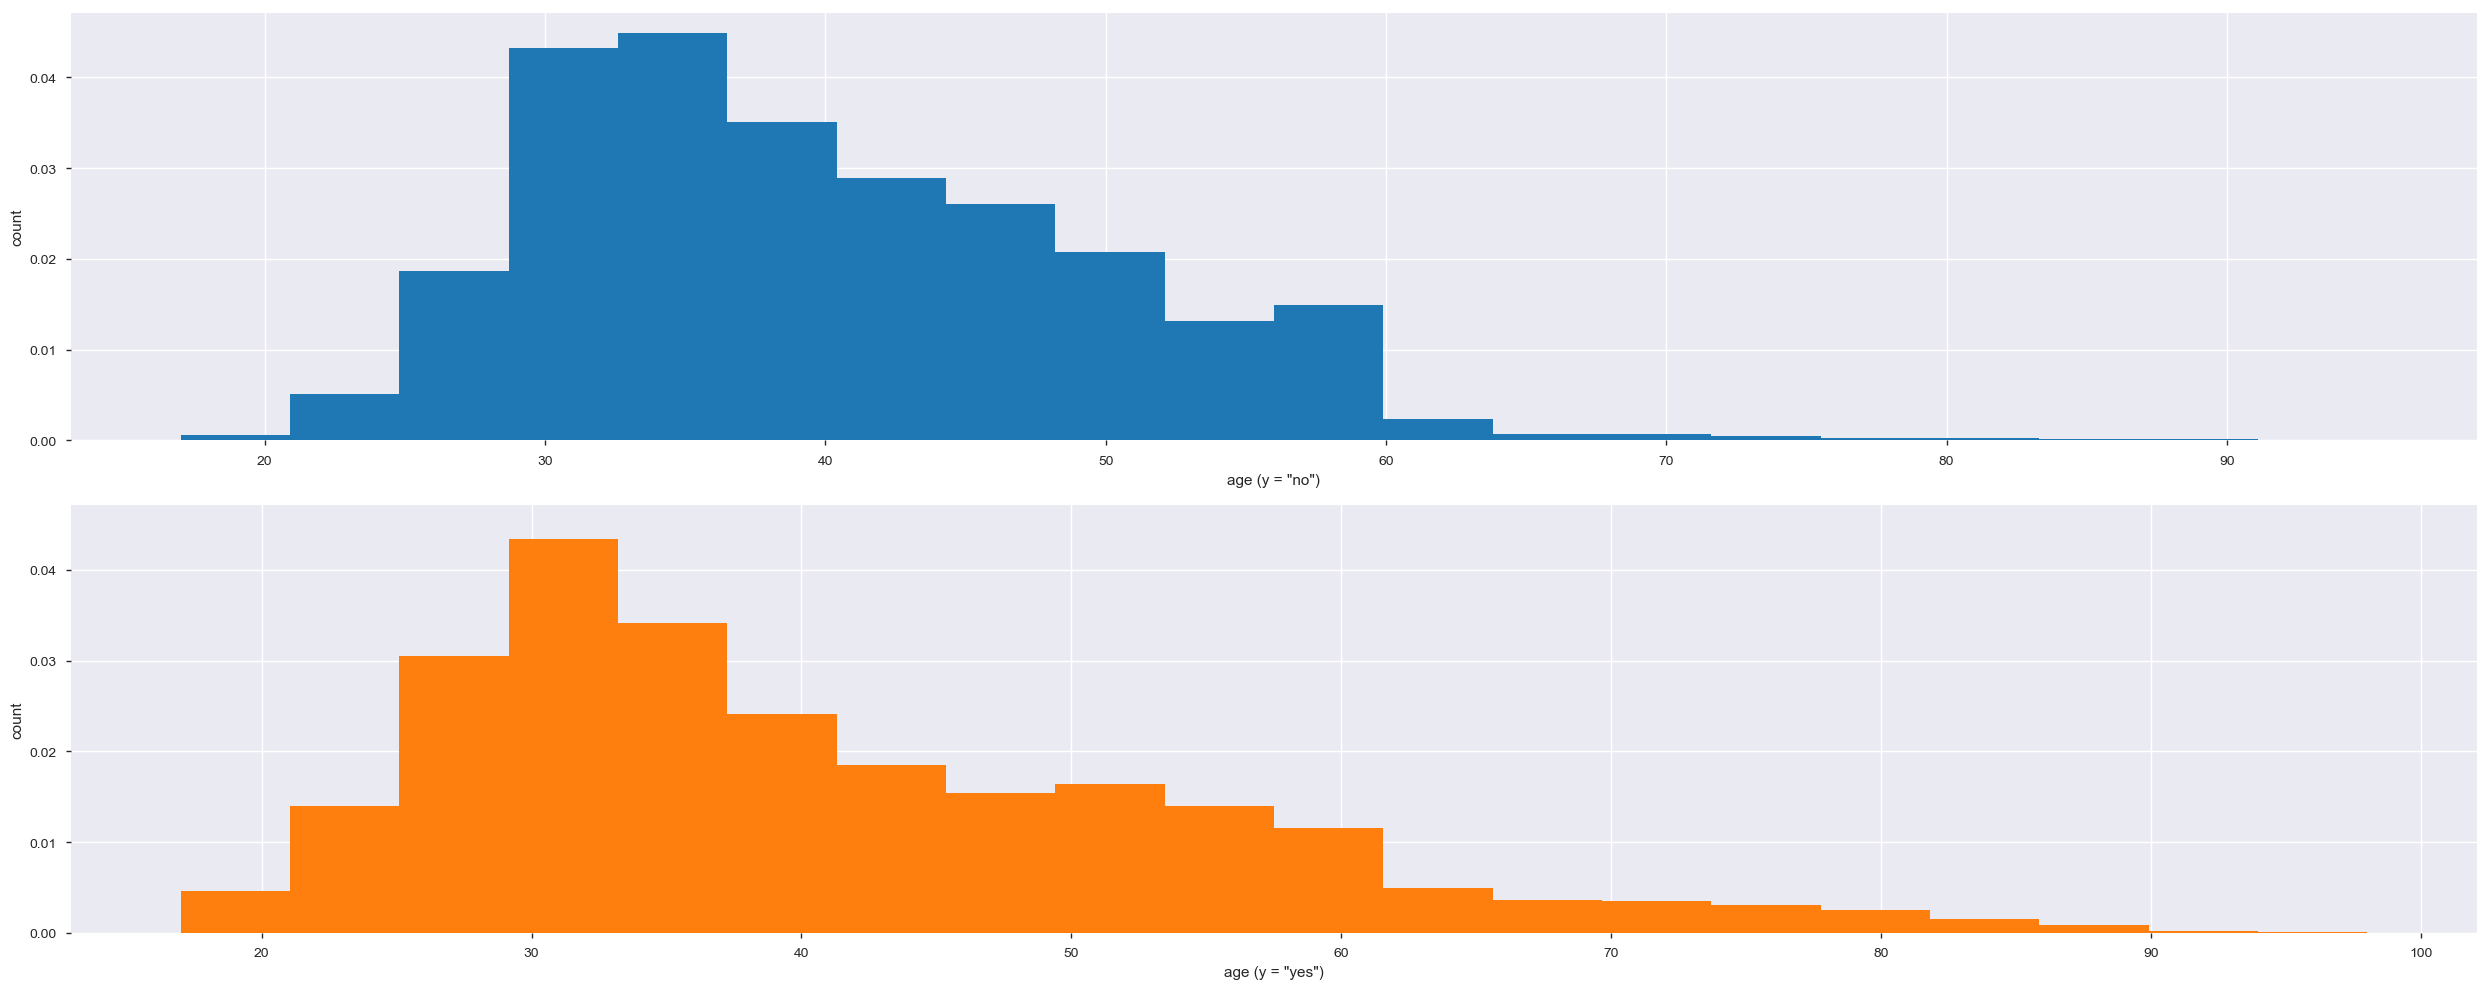

In [44]:
plot_separate_histogramms(data, continuous_features[0])

Так, вроде бы, получше.

По крайней мере видно, что моды распределений смещены в разные стороны, да и в целом гистограммы по виду друг от друга отличаются.

Можно еще попробовать посчитать каког-нибудь Колмогорова-Смирнова тест, чтобы глянуть, взяты ли эти выборки из одного распределения:

In [45]:
scipy.stats.ks_2samp(data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]])

Ks_2sampResult(statistic=0.08608700226060761, pvalue=4.978090371581271e-27)

Здесь p-value получилось мизерным, что позволяет твердо отвергать нулевую гипотезу о том, что эти выборки были взяты из одного распределения.

Глянем еще на тест Краскела — Уоллиса (непараметрический вариант ANOVA, по утверждению [этой доки](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.kruskal.html)), который тестирует нулевую гипотезу о равенстве медианы в подгруппах.

In [46]:
scipy.stats.kruskal(data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]])

KruskalResult(statistic=5.794049148713395, pvalue=0.016080509455241632)

p-value получилось не настолько маленьким, как в тесте Колмогорова-Смирнова, однако оно достаточно маленькое для того, чтобы отвергнуть нулевую гипотезу.

Теперь еще надо глянуть, где какое значение медианы:

In [47]:
data[data.y == 'no'][continuous_features[0]].median()

38.0

In [48]:
data[data.y == 'yes'][continuous_features[0]].median()

37.0

Глянем еще на то, как соотносятся средние значения в группах клиентов с положительным и отрицательным ответом:

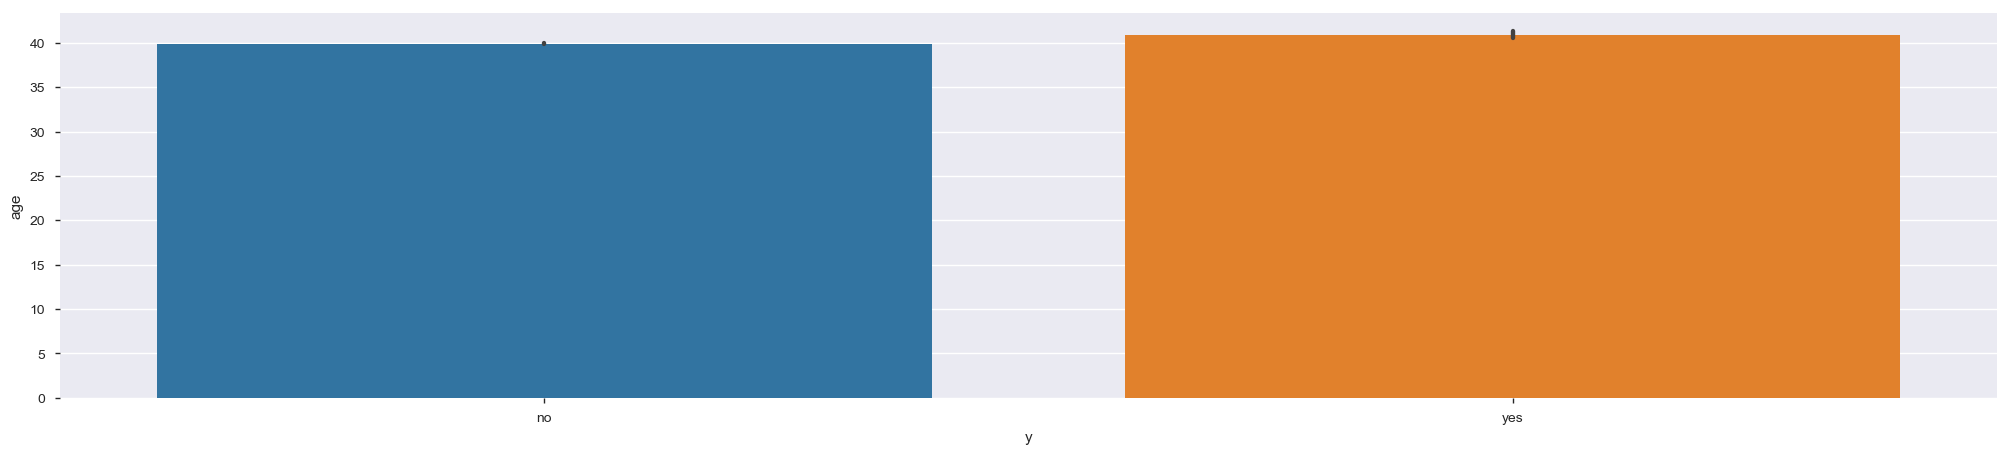

In [49]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[0], data=data)
plt.show()

Любопытно, что здесь по графику вроде как среднее значение возраста выше во второй группе, а не в первой.

Также разброс возраста во второй группе выше.

Попробуем проверить значимость различия среднего по двухвыборочному критерию Уилкоксона:

In [50]:
scipy.stats.ranksums(data[data.y == 'no'][continuous_features[0]], data[data.y == 'yes'][continuous_features[0]])

RanksumsResult(statistic=2.405857273747131, pvalue=0.01613456686393064)

p-value получилось достаточно маленькое для того, чтобы отвергнуть нулевую гипотезу.

Посчитаем средние в группах:

In [51]:
data[data.y == 'no'][continuous_features[0]].mean()

39.911185290576775

In [52]:
data[data.y == 'yes'][continuous_features[0]].mean()

40.91314655172414

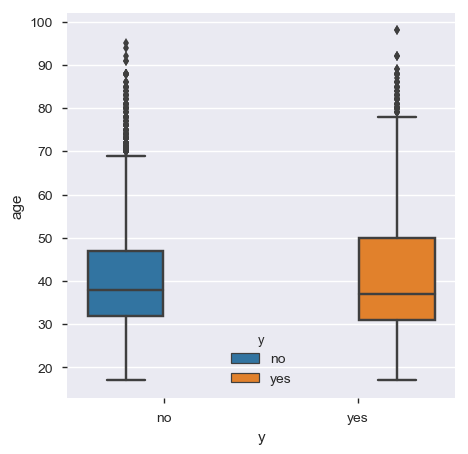

In [53]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', y=continuous_features[0], hue='y', data=data)
plt.show()

Box-plot тоже никакого существенного смещения одного распределения относительно другого не показывает.

Тем не менее видно, что во второй группе более пологий правый хвост (что, кстати, может объяснить, почему среднее значение в этой группе выше).

Проблема в том, что все время до этого возраст рассматривался как вещественный признак.

Это не вполне корректно, особенно если речь идет о возрасте в годах.

Да, можно делать допущения, что возраст - величина непрерывная, но тогда нужно учитывать, что выводы, полученные с помощью соответствующих методов, могут быть не такими уж и однозначными.

Глянем напоследок на возраст в группах, как на дискретную случайную величину:

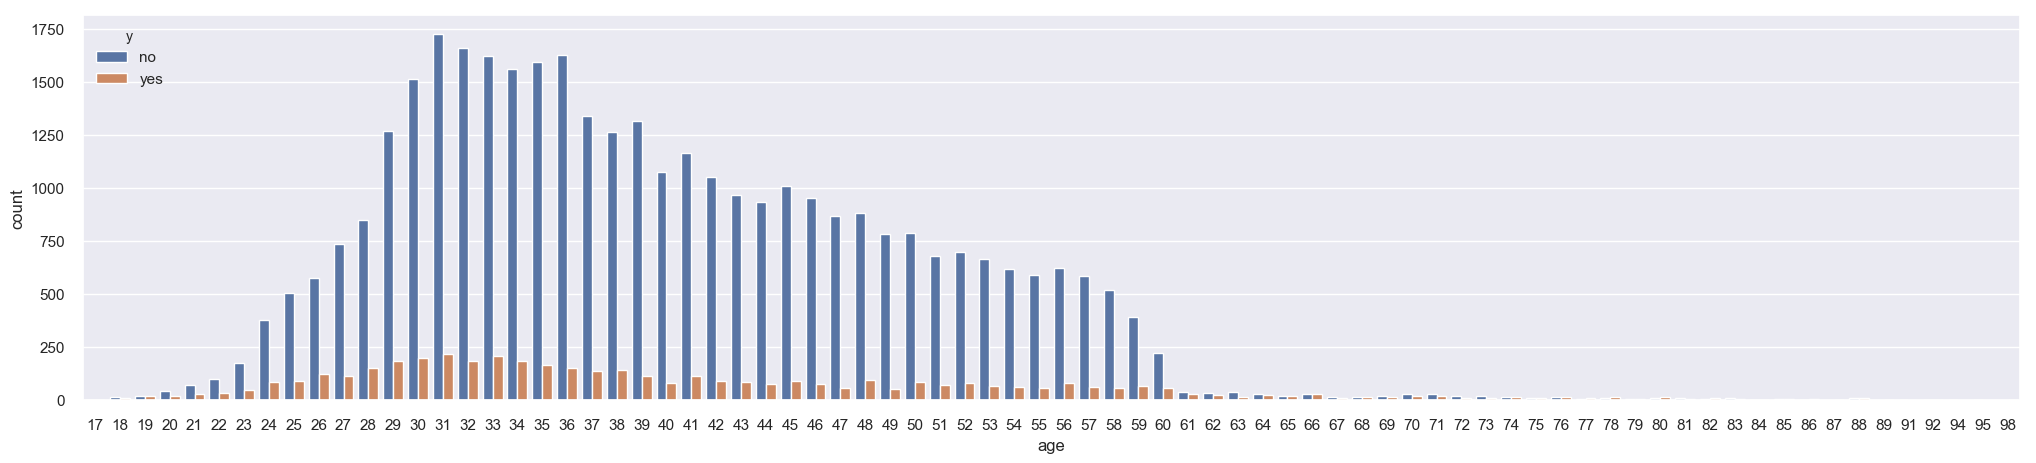

In [54]:
sns.set(font_scale=1)
plt.figure(figsize=(25, 5))
sns.countplot(x=continuous_features[0], hue='y', data=data)
plt.show()
sns.set(font_scale=2)

#### Campaign (number of contacts performed during this campaign and for this client)

Как и для возраста, та же история, сначала просто глянем на распределение, потом на распределения в группах и т.д.

Здесь мы, тем не менее, не будем подробно заострять внимание на разных критериях, поскольку это займет слишком много времени.

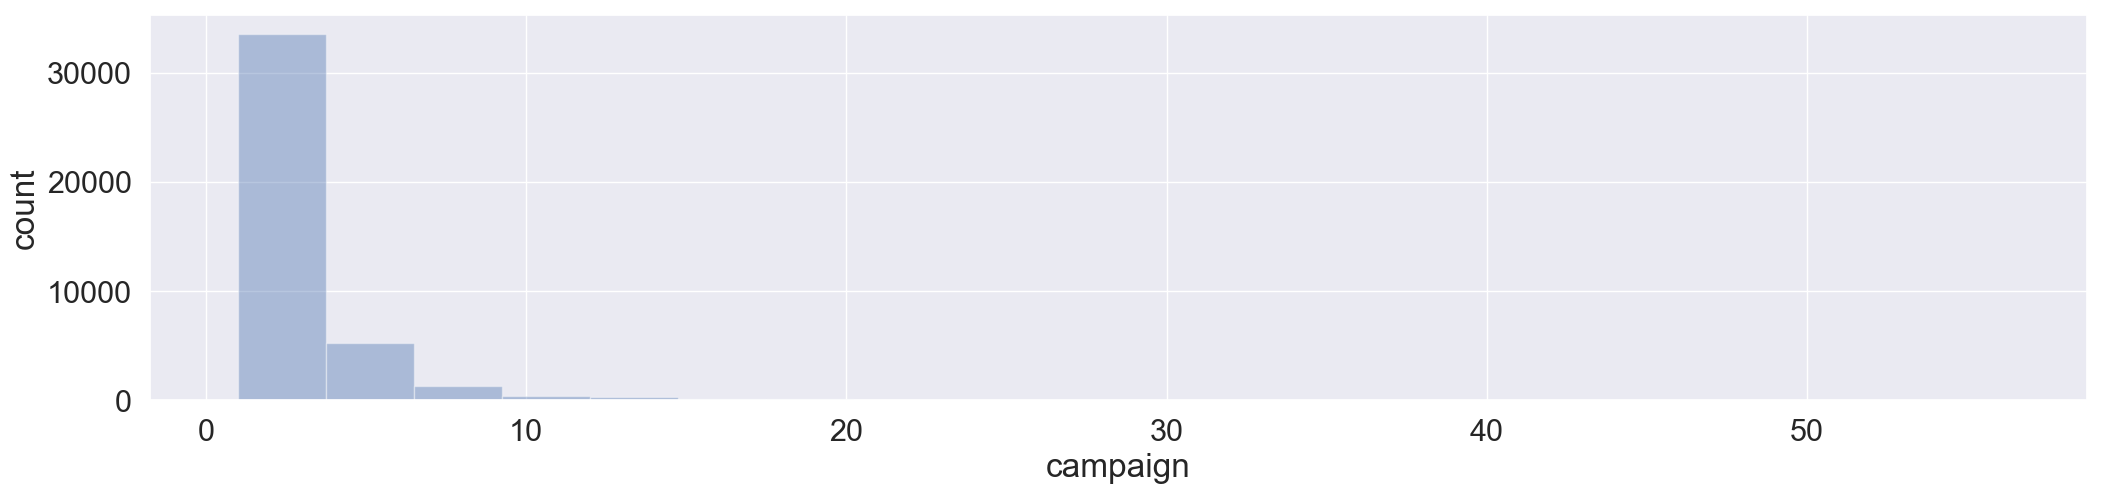

In [55]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[1]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

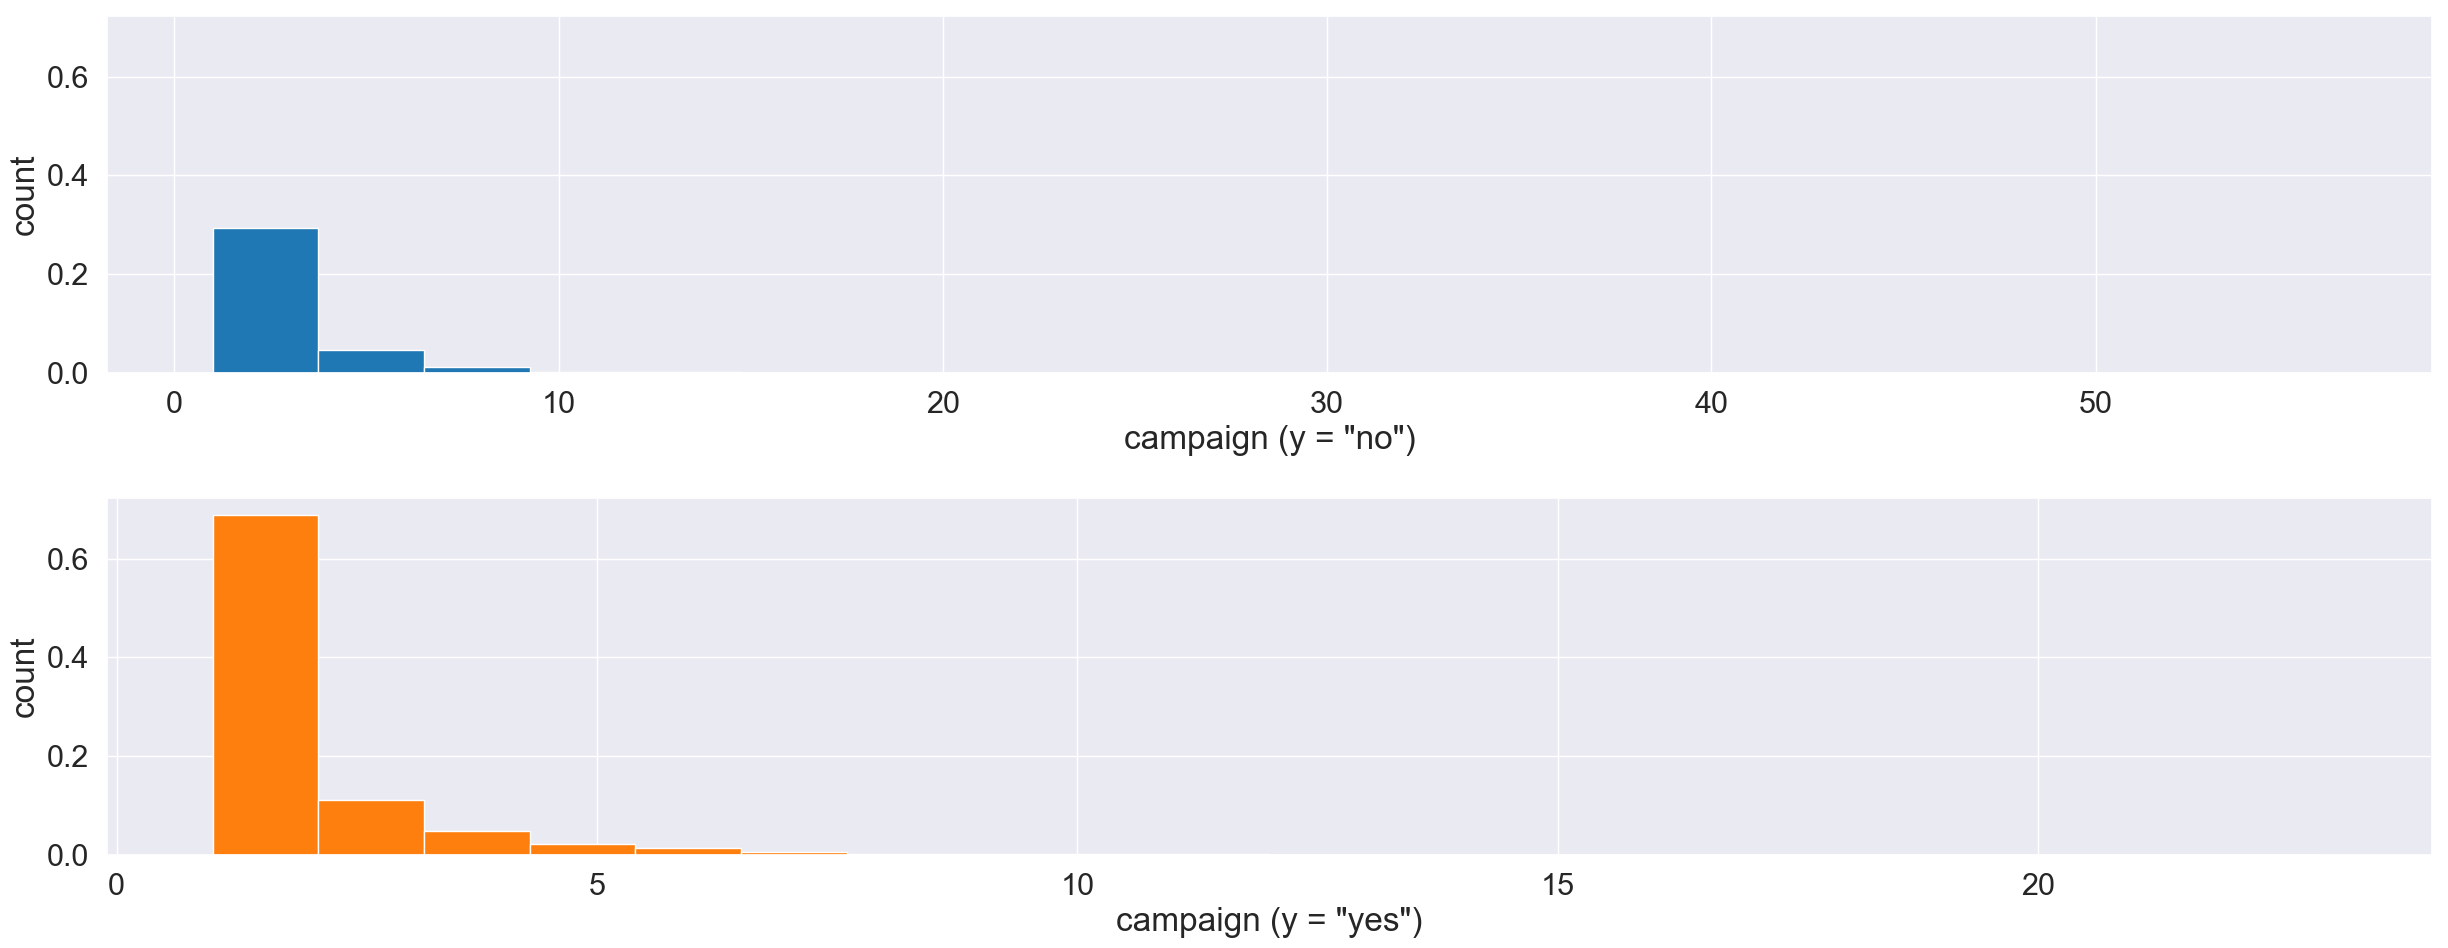

In [56]:
plot_separate_histogramms(data, continuous_features[1])

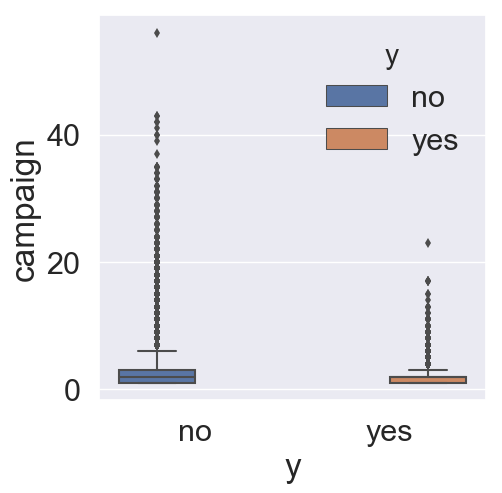

In [57]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='y', y=continuous_features[1], hue='y', data=data)
plt.show()

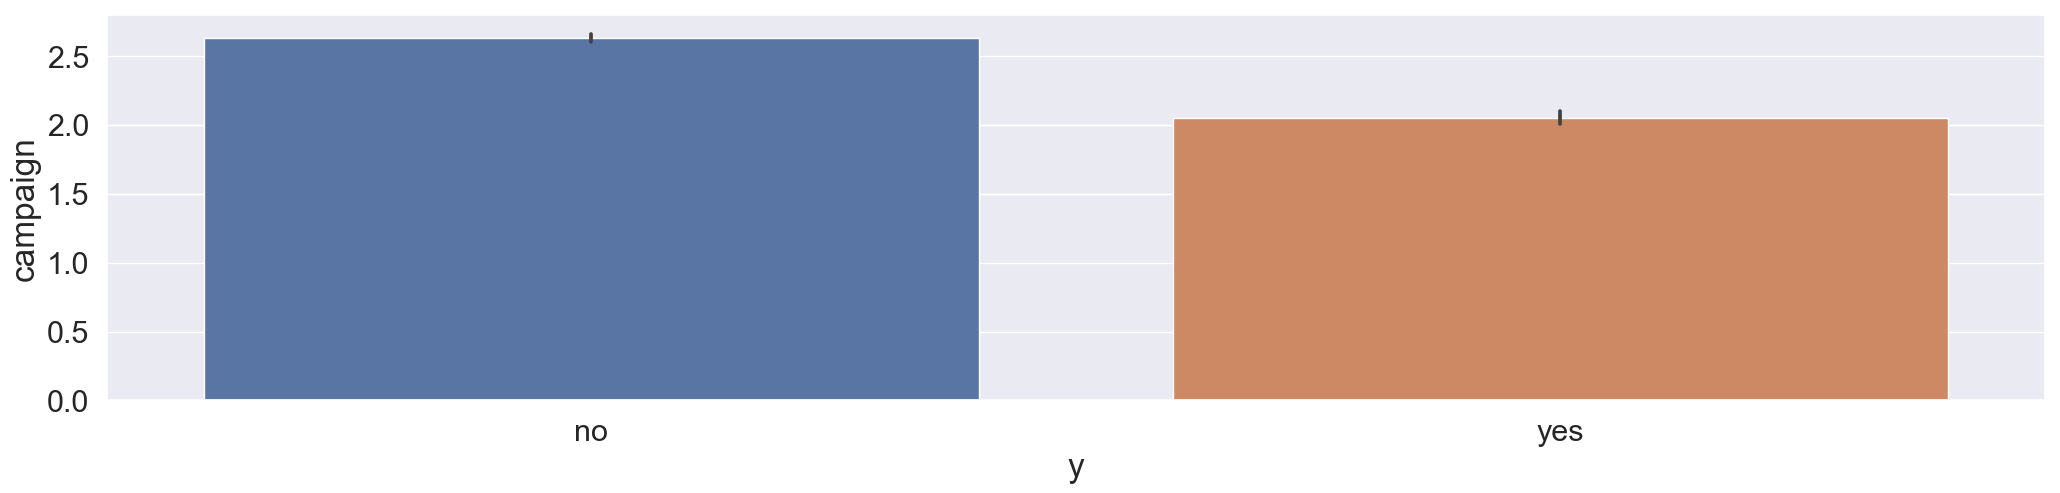

In [58]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[1], data=data)
plt.show()

In [59]:
scipy.stats.ks_2samp(data[data.y == 'no'][continuous_features[1]], data[data.y == 'yes'][continuous_features[1]])

Ks_2sampResult(statistic=0.08083009872704006, pvalue=7.030743901333017e-24)

In [60]:
scipy.stats.kruskal(data[data.y == 'no'][continuous_features[1]], data[data.y == 'yes'][continuous_features[1]])

KruskalResult(statistic=166.95694220771807, pvalue=3.418495971231501e-38)

In [61]:
data[data.y == 'no'][continuous_features[1]].median()

2.0

In [62]:
data[data.y == 'yes'][continuous_features[1]].median()

2.0

Любопытно, что, не смотря на очень маленькое значение p-value, никакой разницы в медианах нет.

Глянем, сколько всего уникальных значений в выборках:

In [63]:
data[data.y == 'no'][continuous_features[1]].nunique()

42

In [64]:
data[data.y == 'yes'][continuous_features[1]].nunique()

17

Маловато уникальных значений для непрерывной-то переменной.

Собственно поэтому и не работает критерий.

Он попросту не расчитан на использование с дискретными случайными величинами.

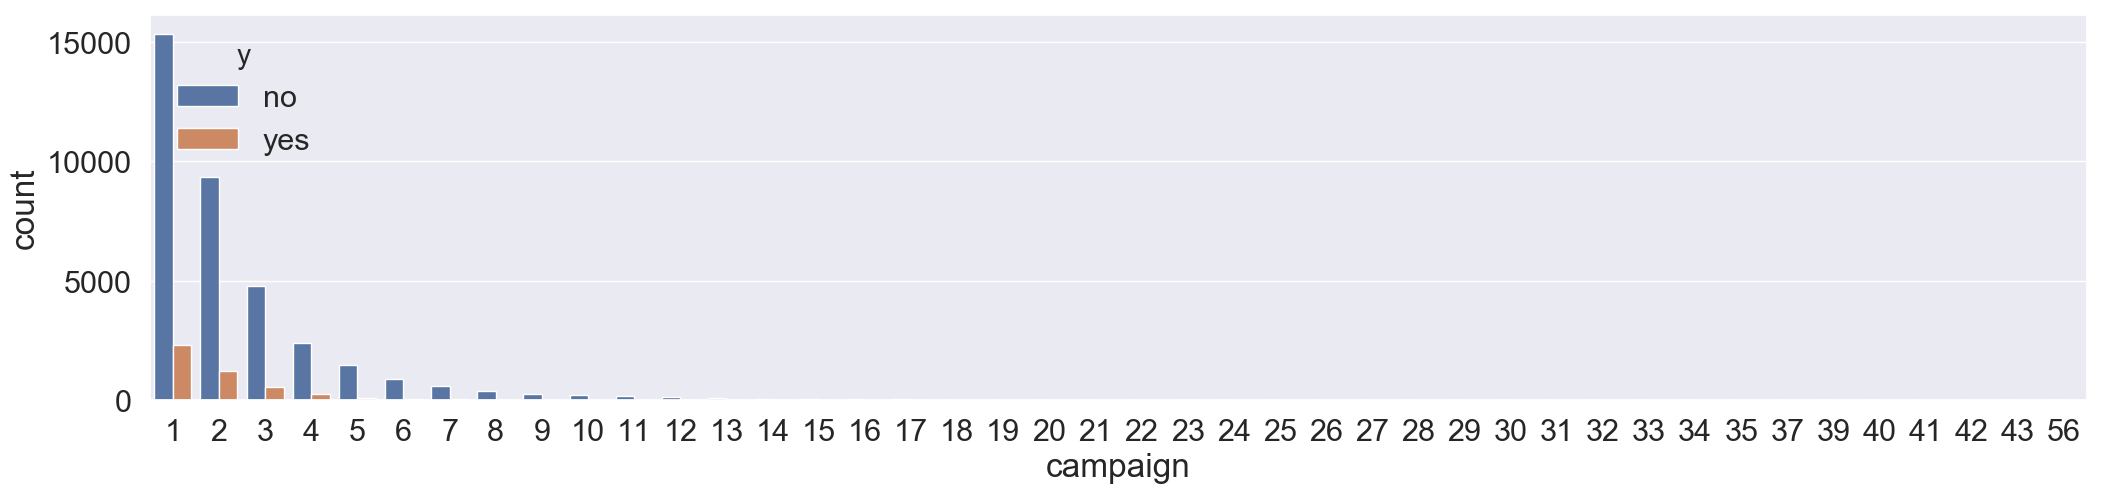

In [65]:
plt.figure(figsize=(25, 5))
sns.countplot(x=continuous_features[1], hue='y', data=data)
plt.show()

#### Consumer confidence index

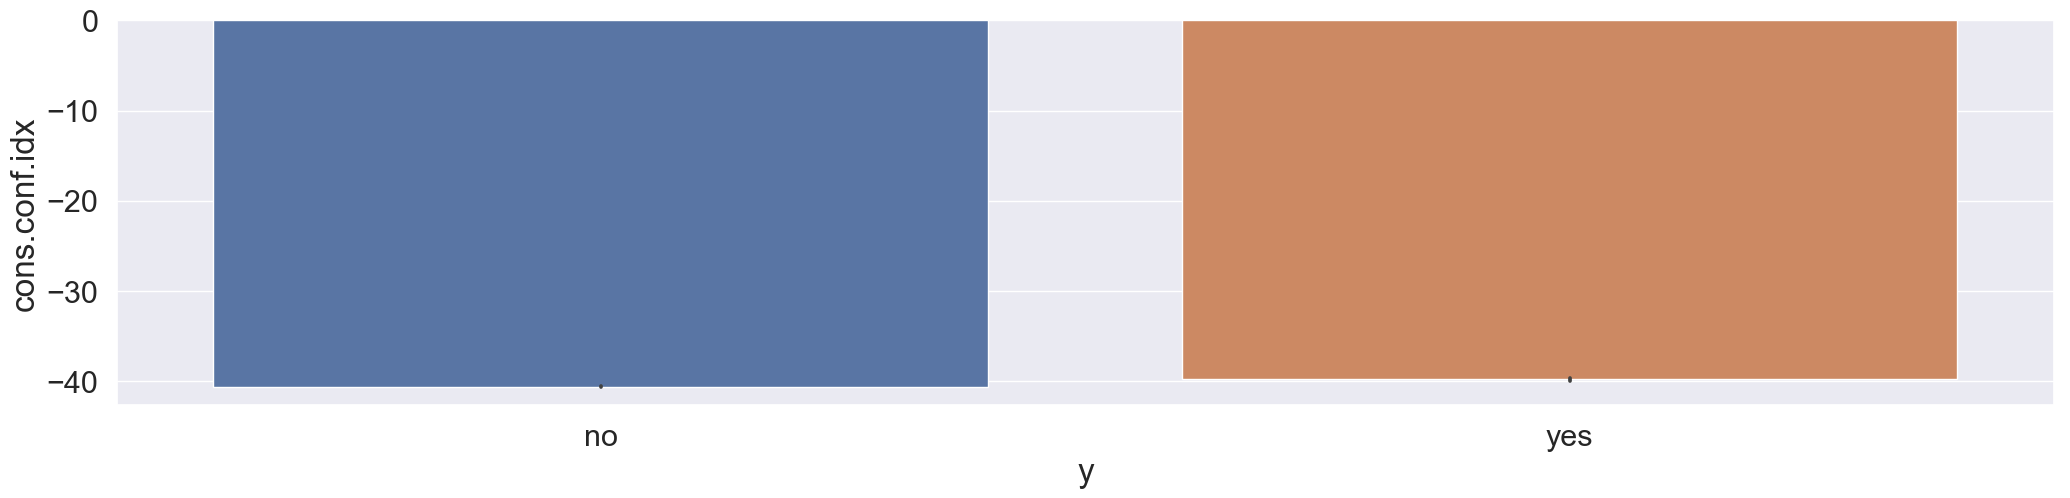

In [66]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[2], data=data)
plt.show()

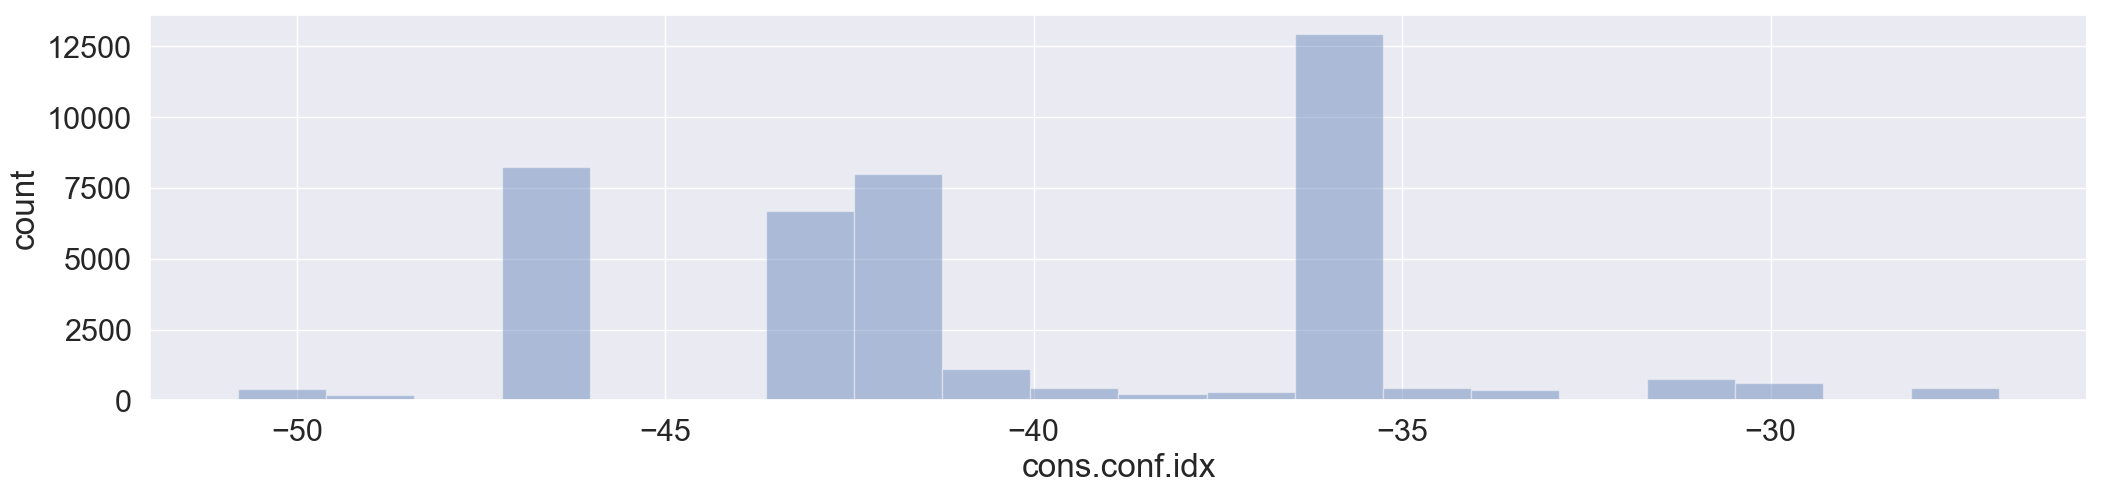

In [67]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[2]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

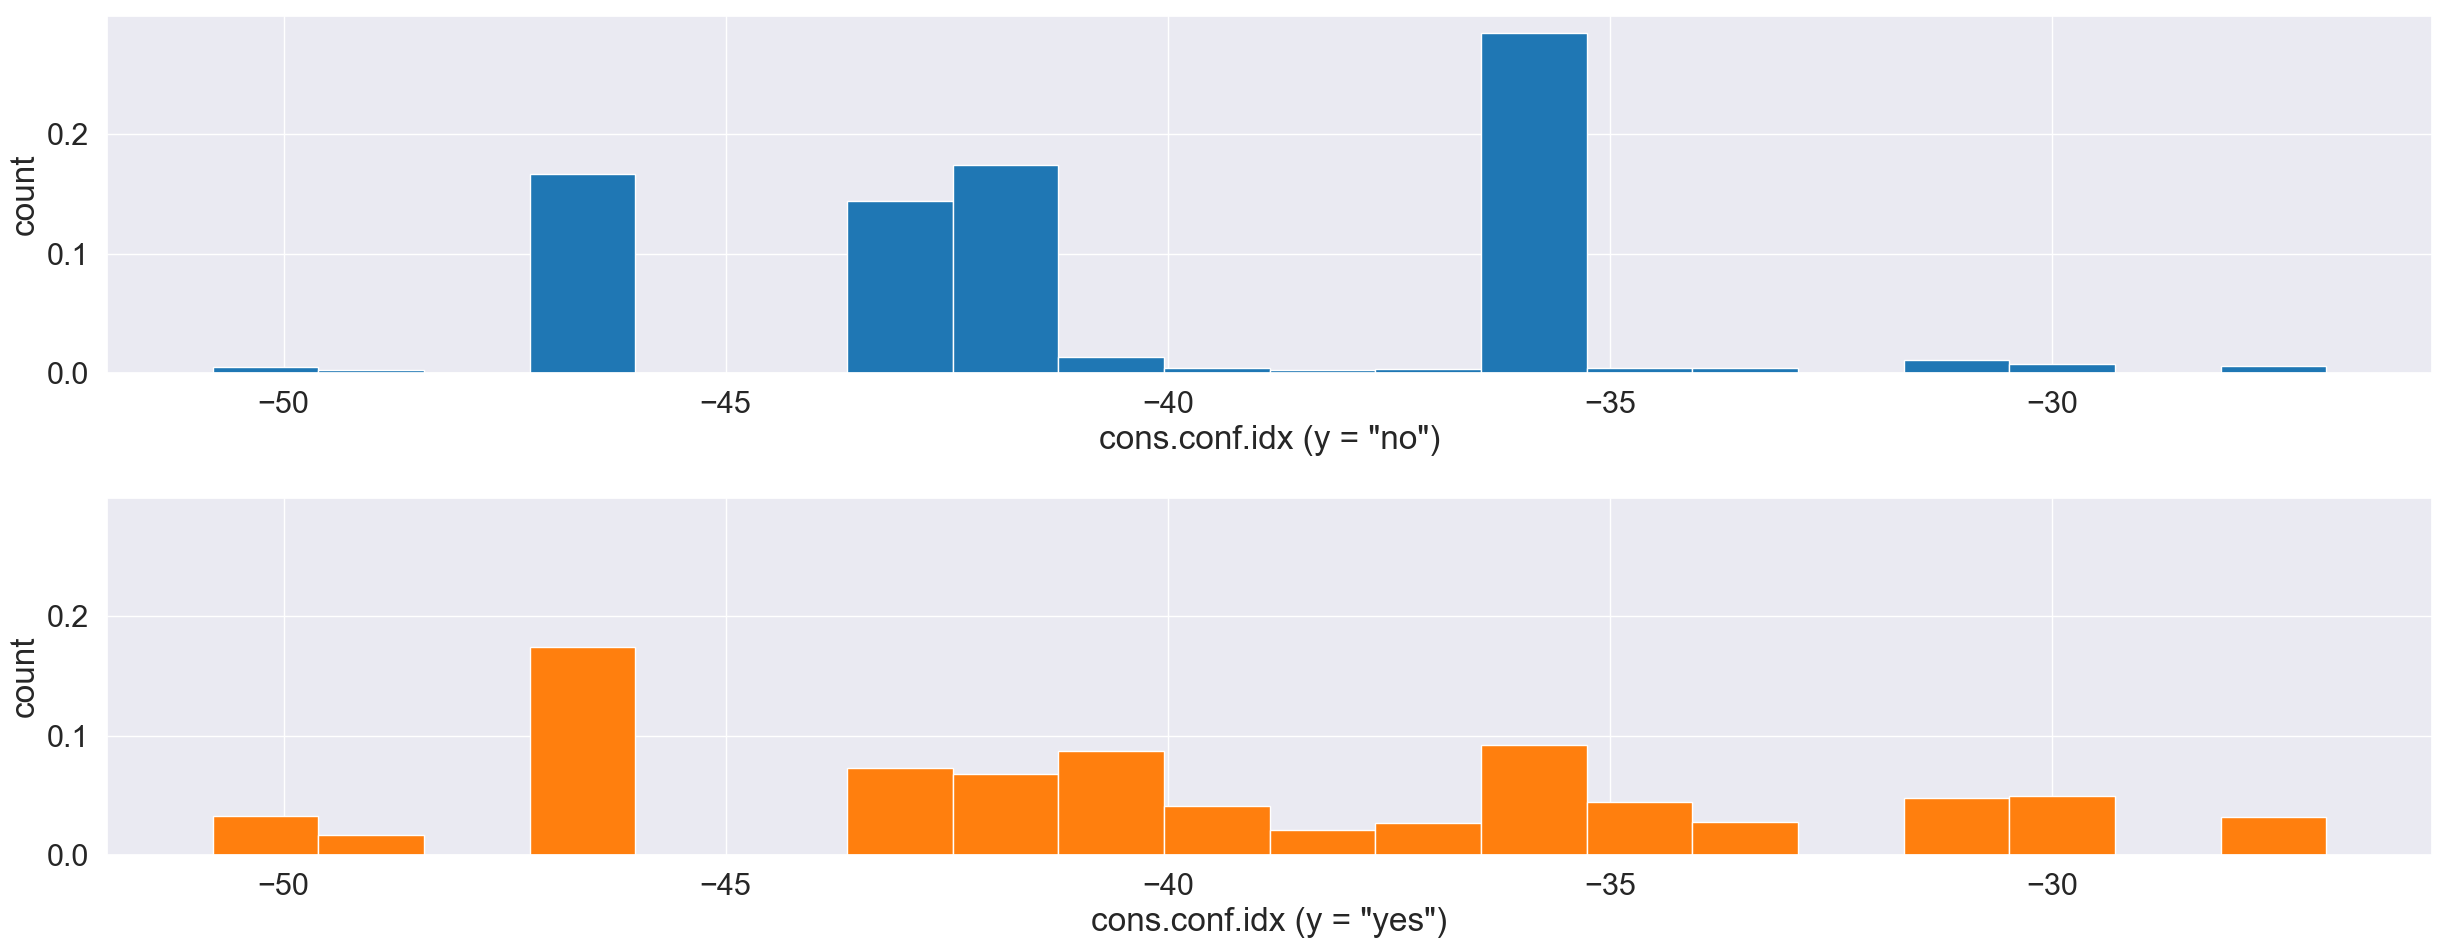

In [68]:
plot_separate_histogramms(data, continuous_features[2])

In [69]:
scipy.stats.ranksums(data[data.y == 'no'][continuous_features[2]], data[data.y == 'yes'][continuous_features[2]])

RanksumsResult(statistic=-8.292192653325053, pvalue=1.1117966195648494e-16)

p-value получилось достаточно маленькое для того, чтобы отвергнуть нулевую гипотезу.

Посчитаем средние в группах:

In [70]:
data[data.y == 'no'][continuous_features[2]].mean()

-40.59309674946871

In [71]:
data[data.y == 'yes'][continuous_features[2]].mean()

-39.78978448275715

#### Consumer price index

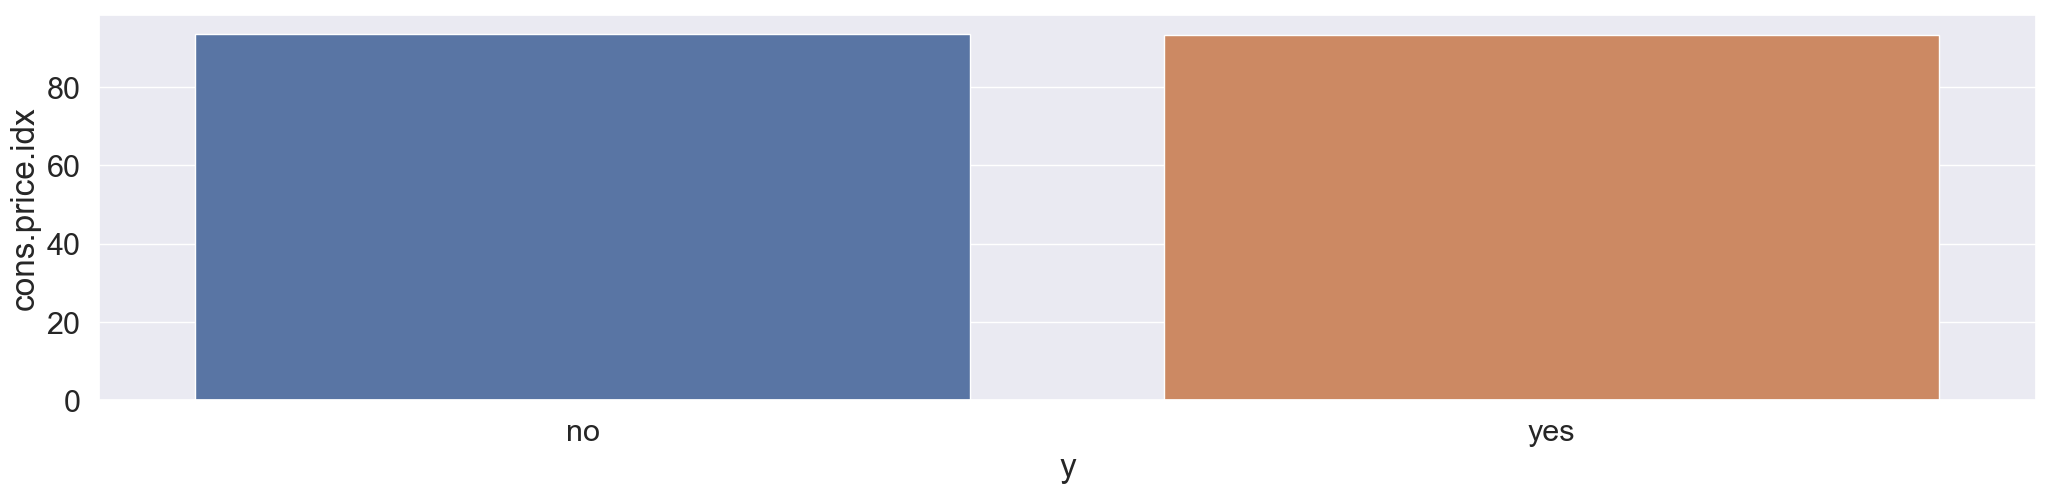

In [72]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[3], data=data)
plt.show()

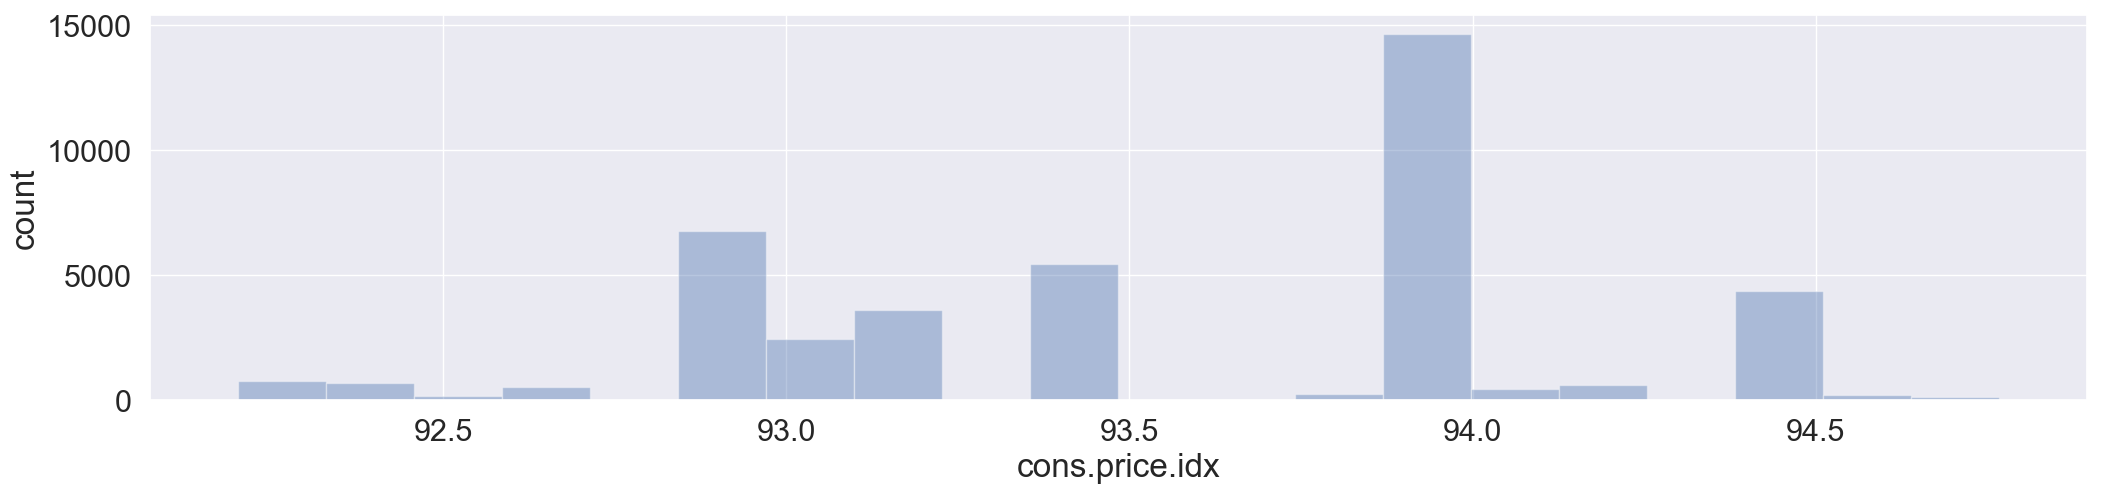

In [73]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[3]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

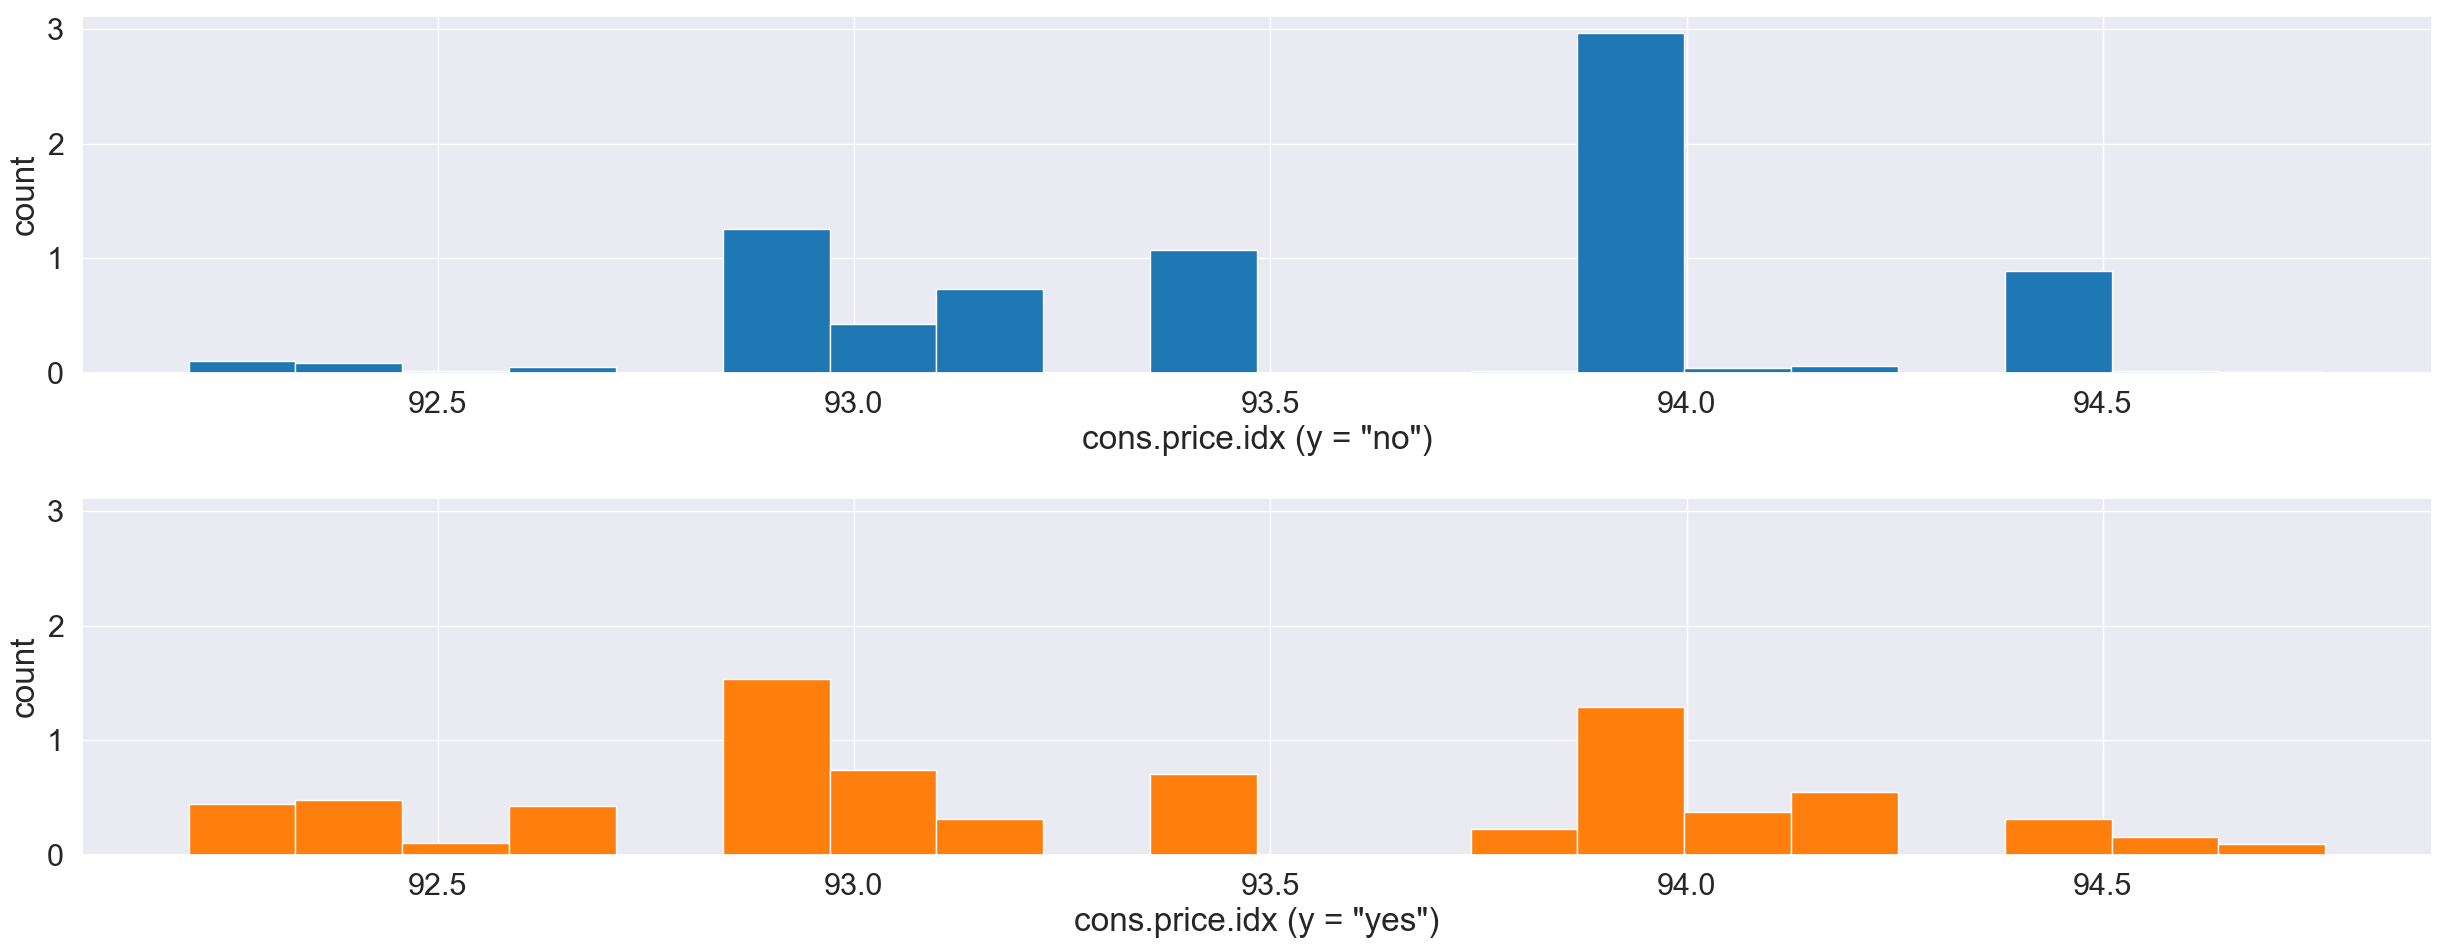

In [74]:
plot_separate_histogramms(data, continuous_features[3])

In [75]:
scipy.stats.ranksums(data[data.y == 'no'][continuous_features[3]], data[data.y == 'yes'][continuous_features[3]])

RanksumsResult(statistic=24.57515742814708, pvalue=2.3290480809210814e-133)

p-value получилось достаточно маленькое для того, чтобы отвергнуть нулевую гипотезу.

Посчитаем средние в группах:

In [76]:
data[data.y == 'no'][continuous_features[3]].mean()

93.60375705925486

In [77]:
data[data.y == 'yes'][continuous_features[3]].mean()

93.35438599138173

#### Duration (last contact duration, in seconds)

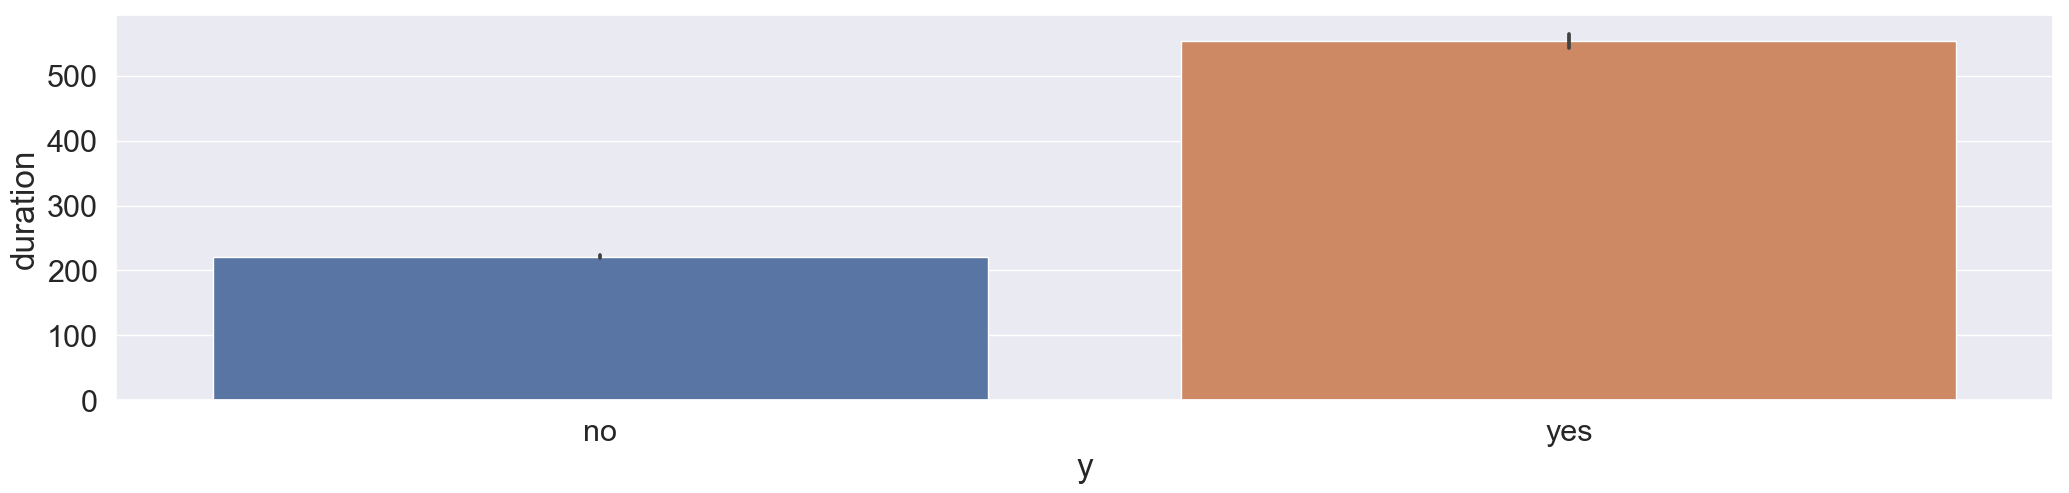

In [127]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[4], data=data)
plt.show()

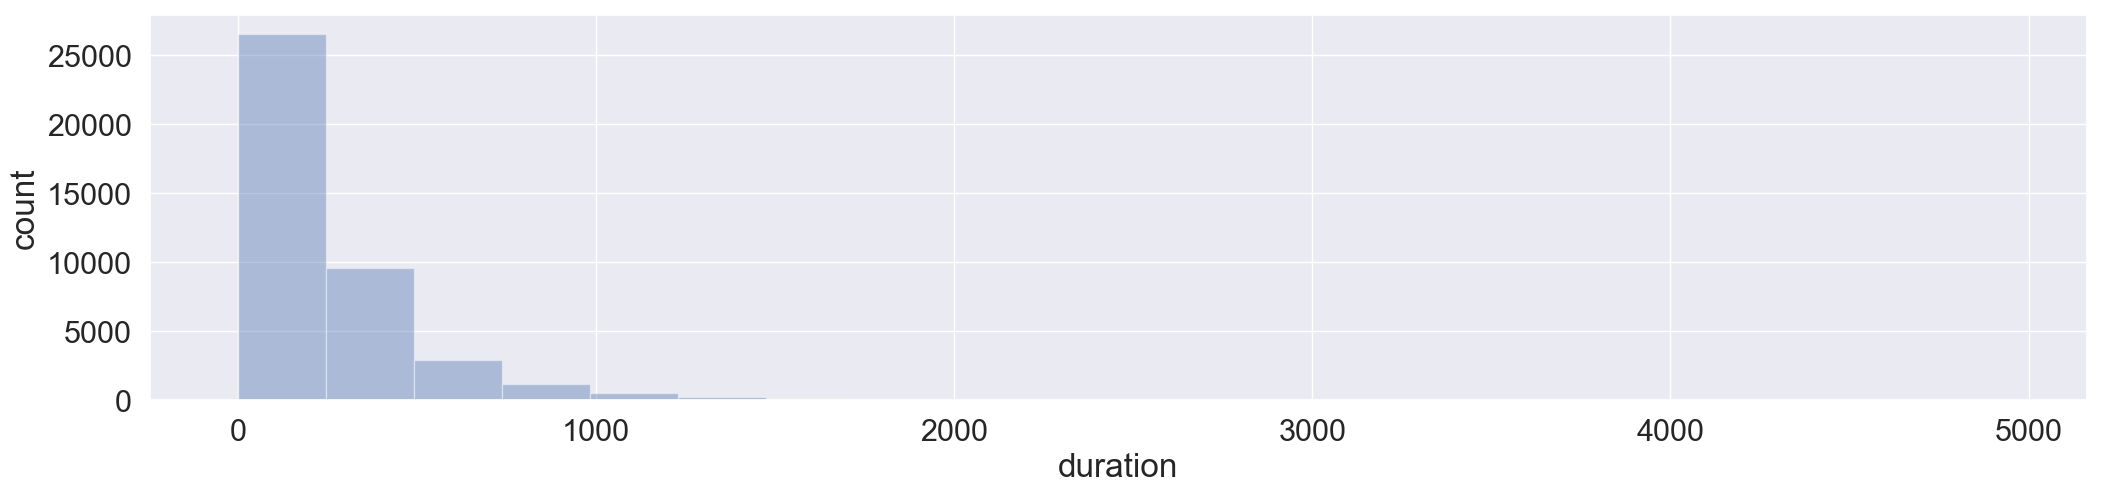

In [79]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[4]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

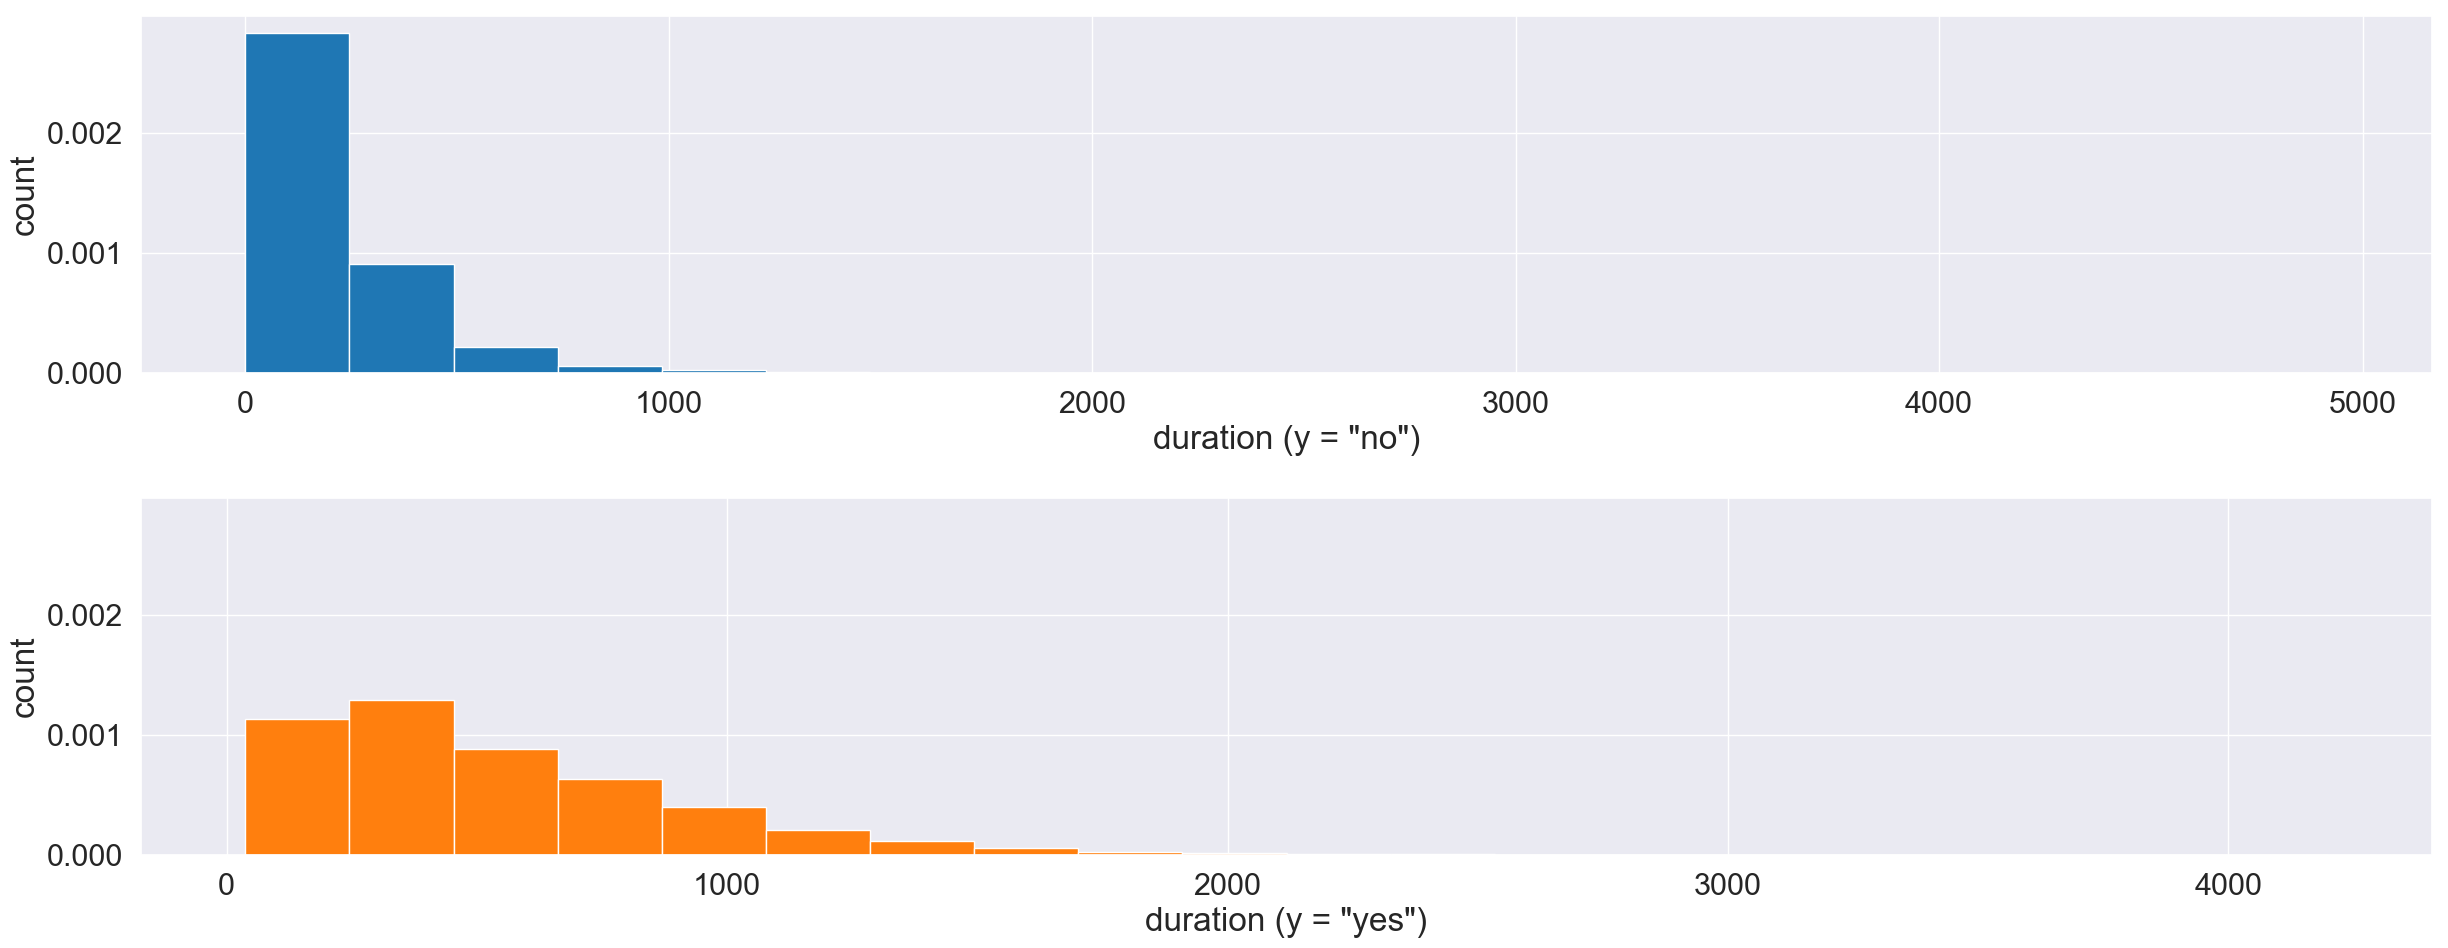

In [80]:
plot_separate_histogramms(data, continuous_features[4])

#### Employment variation rate

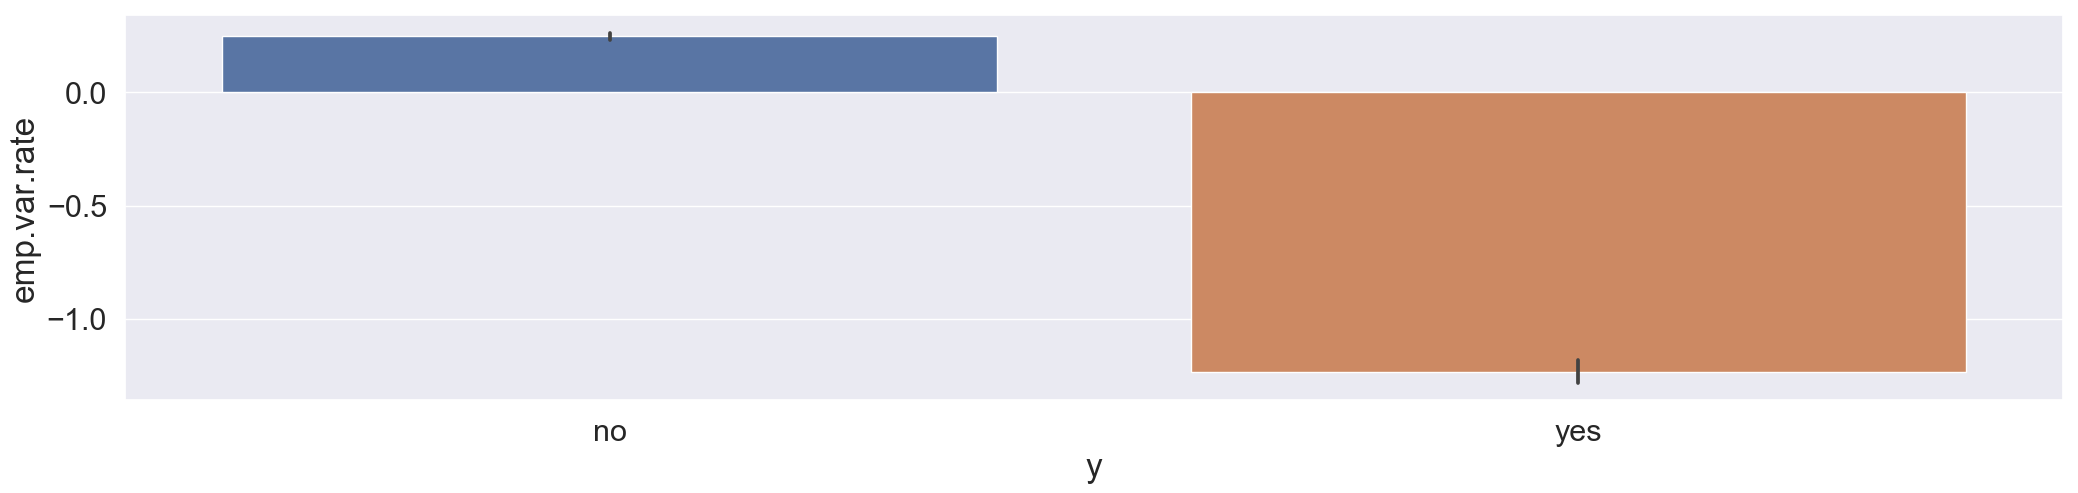

In [81]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[5], data=data)
plt.show()

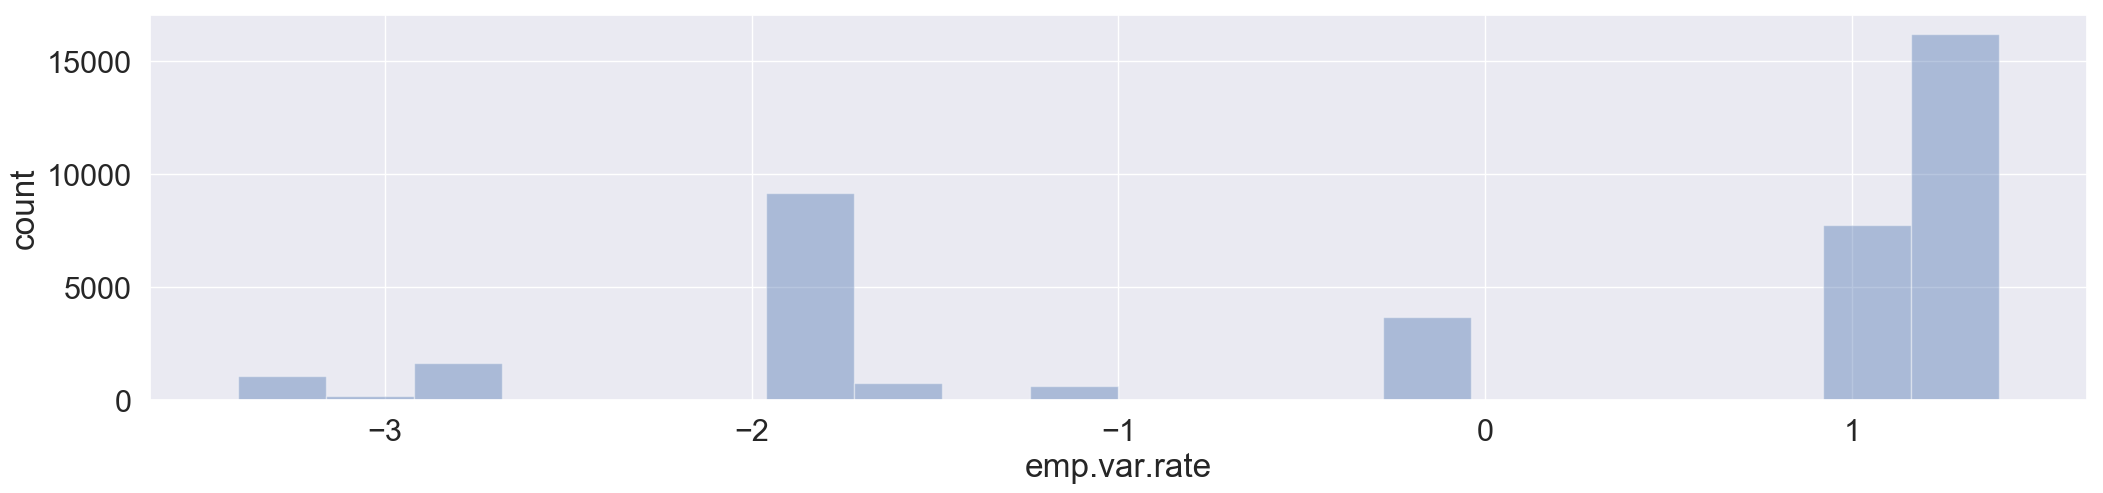

In [82]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[5]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

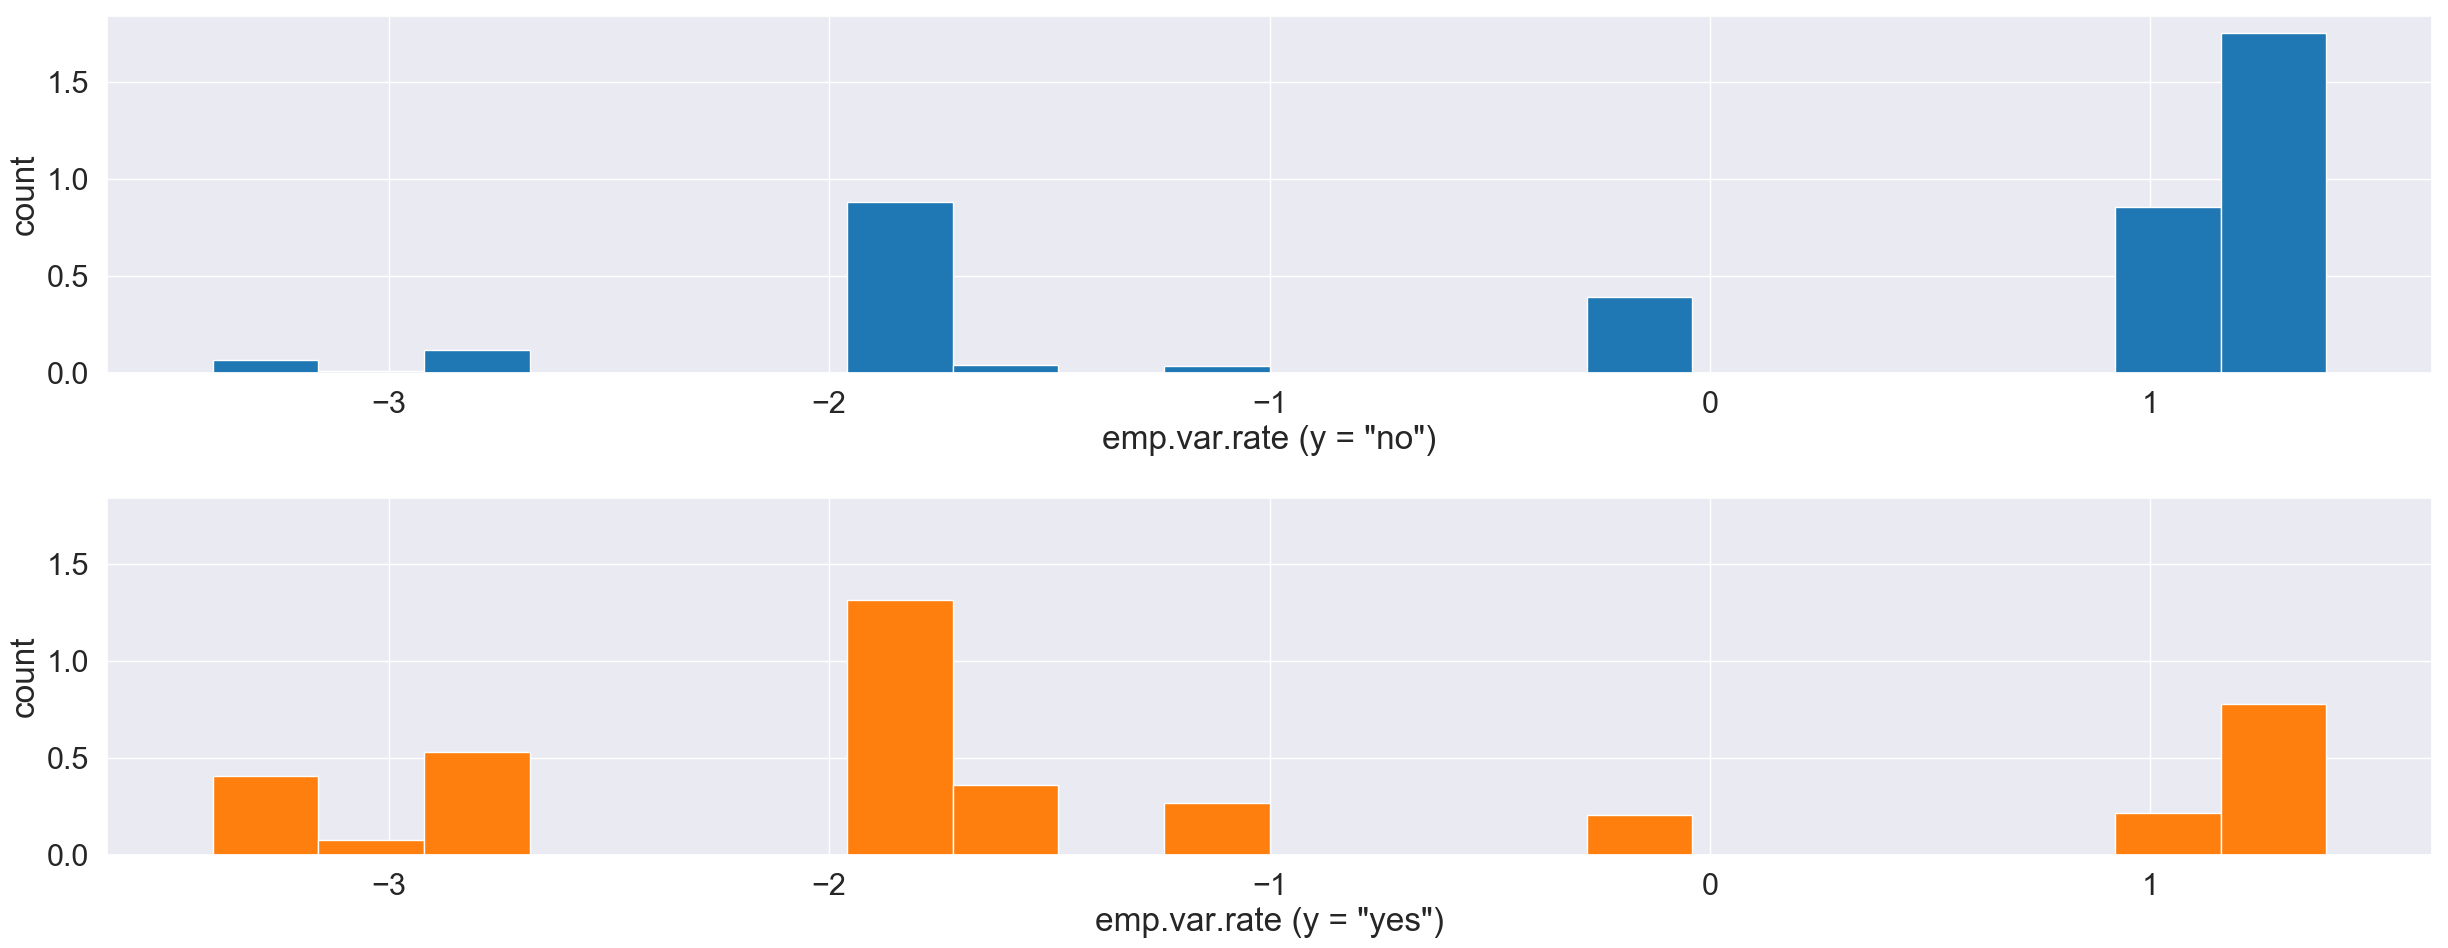

In [83]:
plot_separate_histogramms(data, continuous_features[5])

#### Number of days that passed by after the client was last contacted from a previous campaign

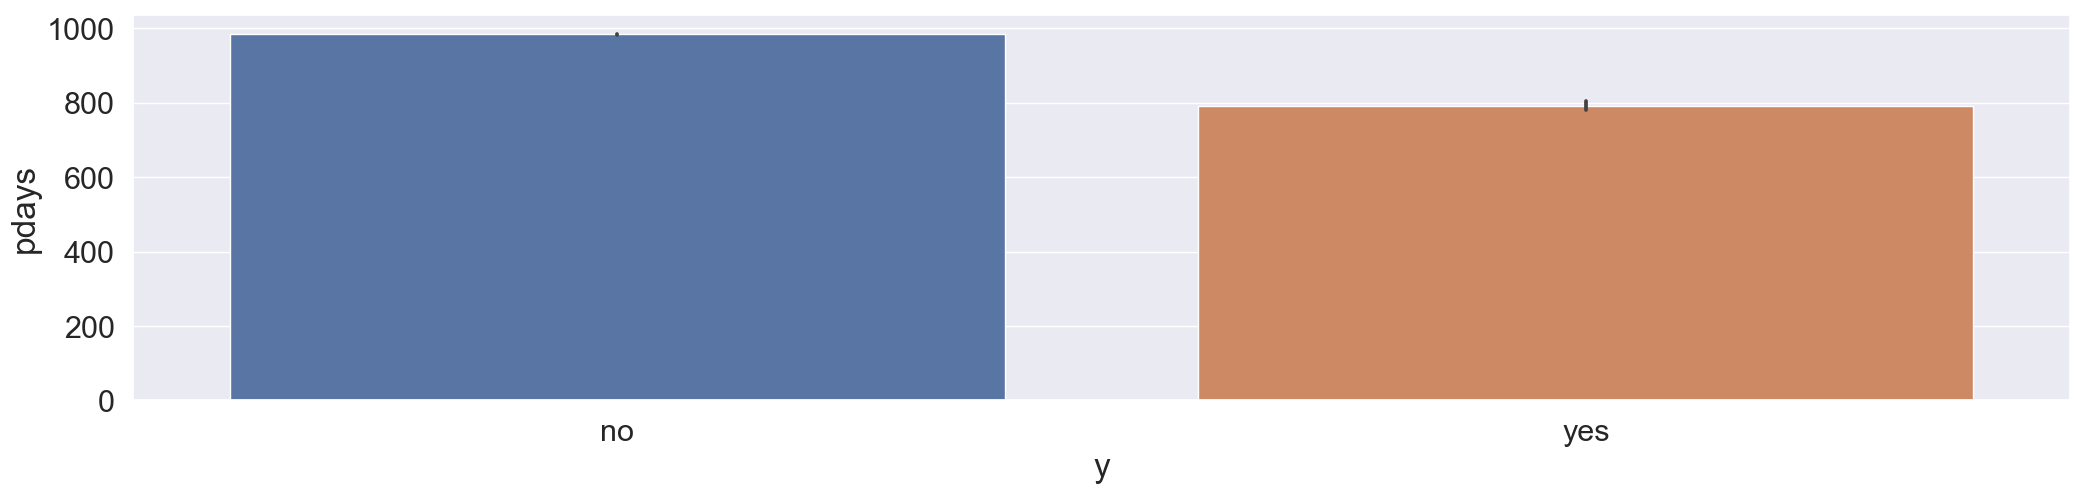

In [84]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[6], data=data)
plt.show()

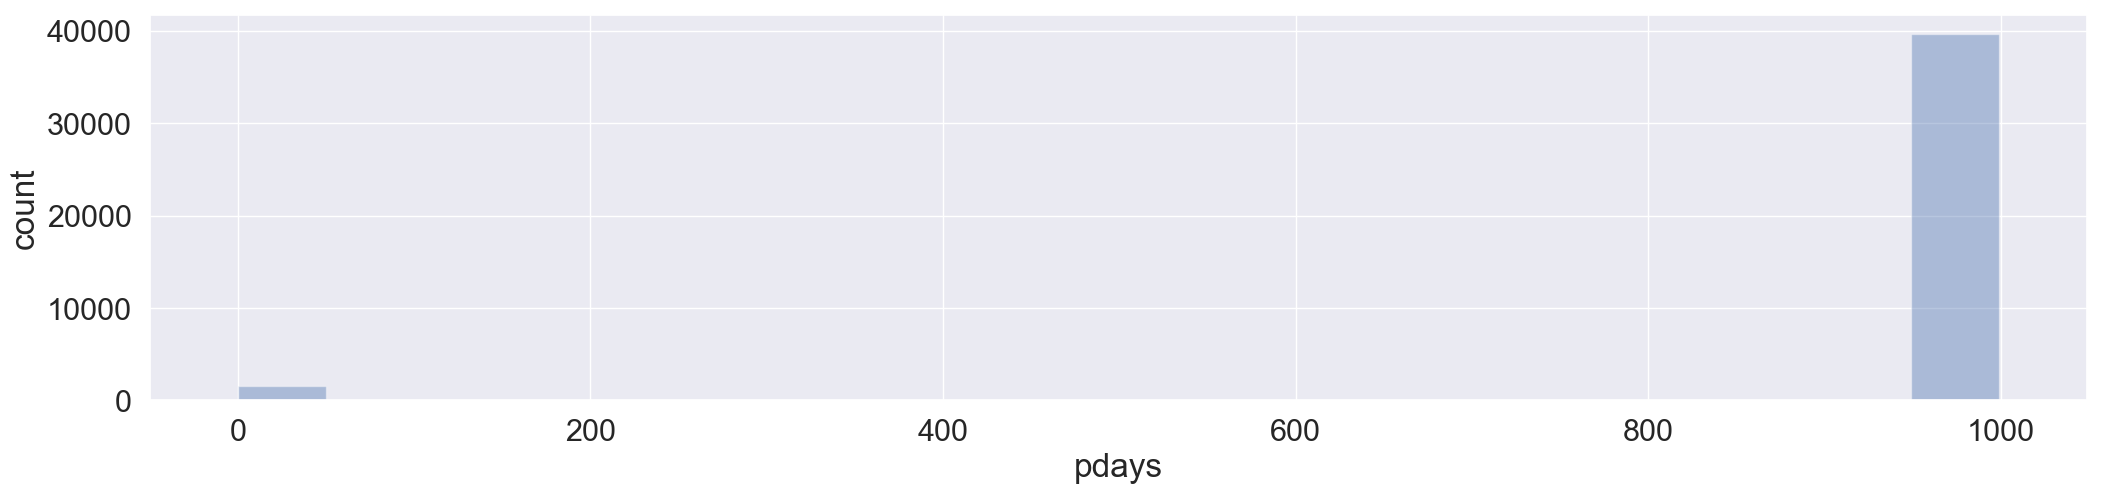

In [85]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[6]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

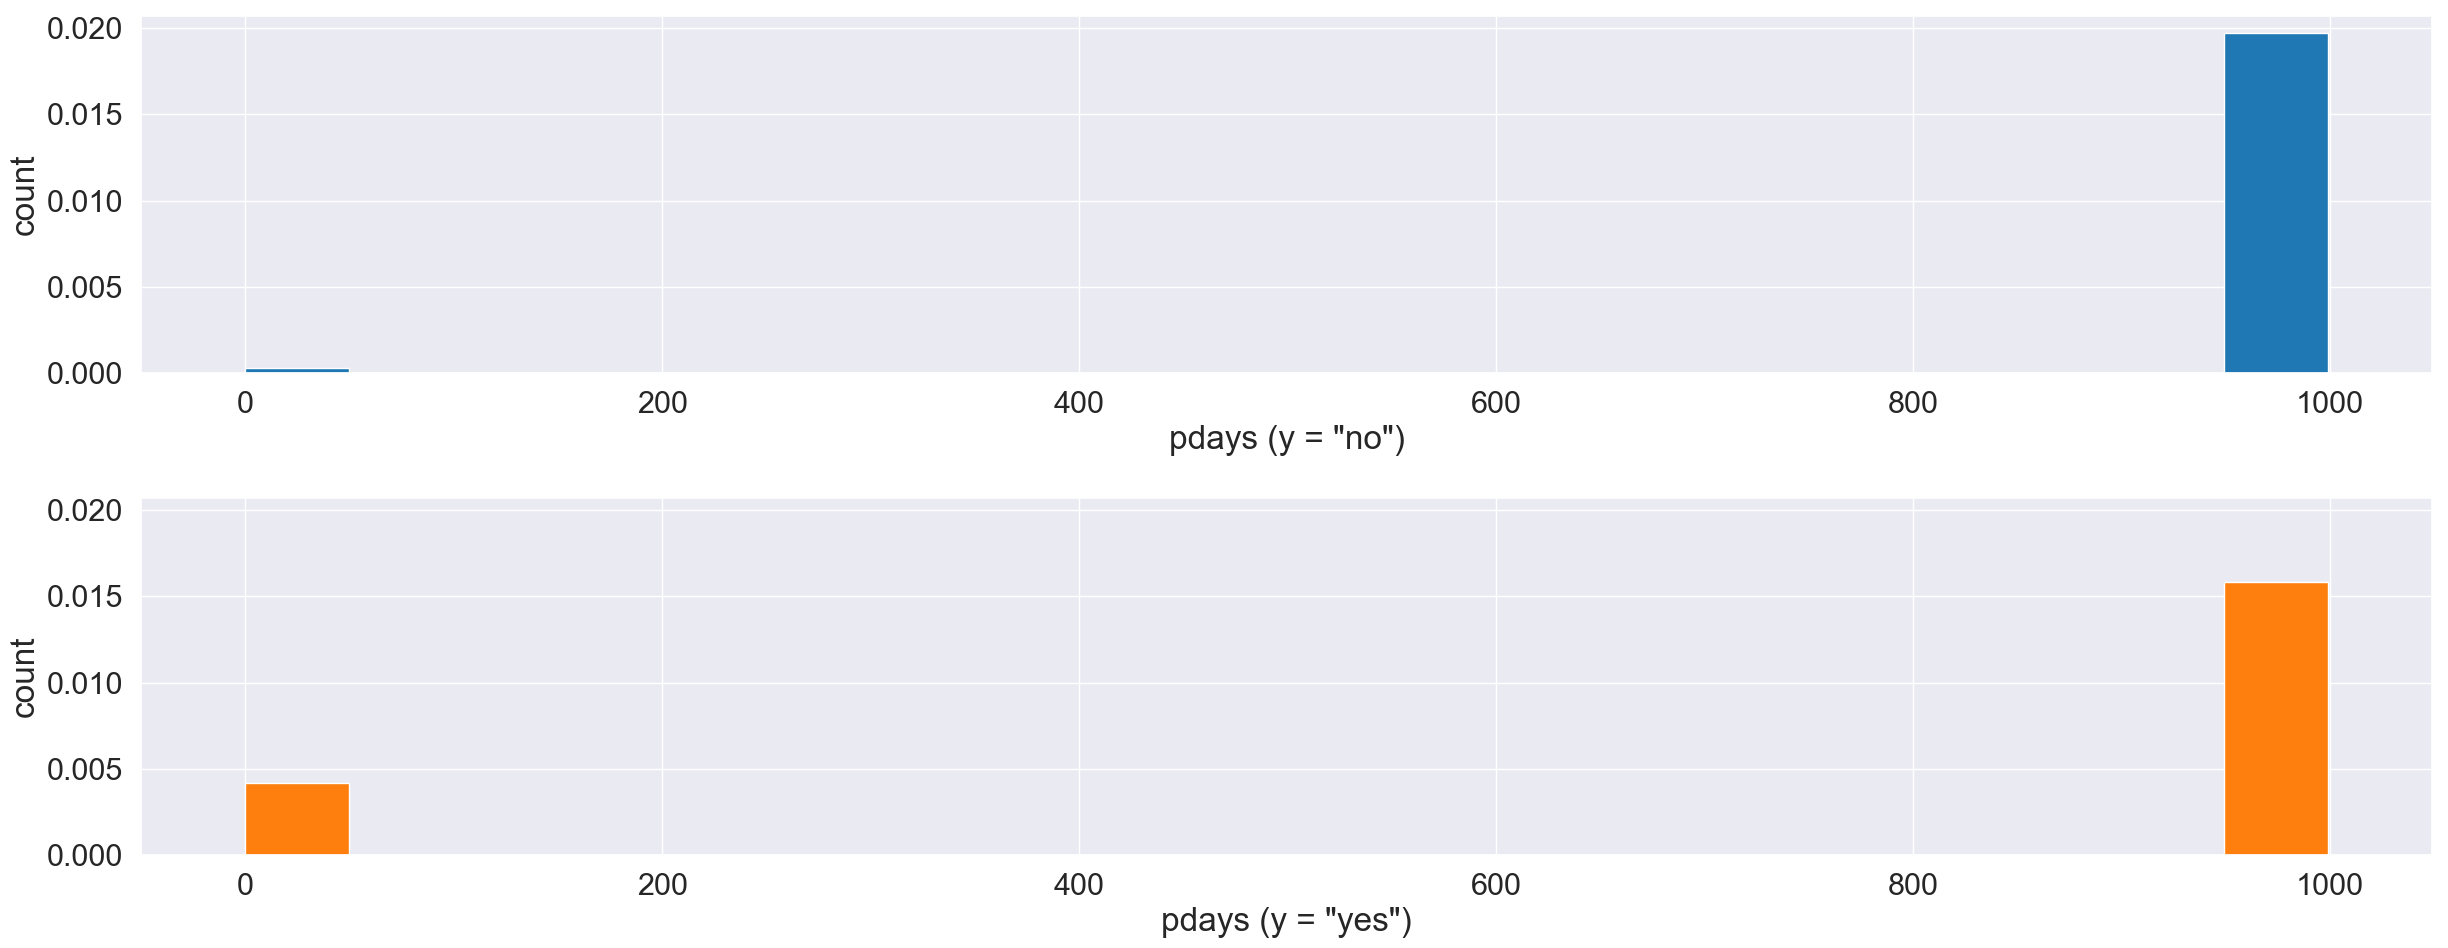

In [86]:
plot_separate_histogramms(data, continuous_features[6])

#### Number of contacts performed before this campaign and for this client

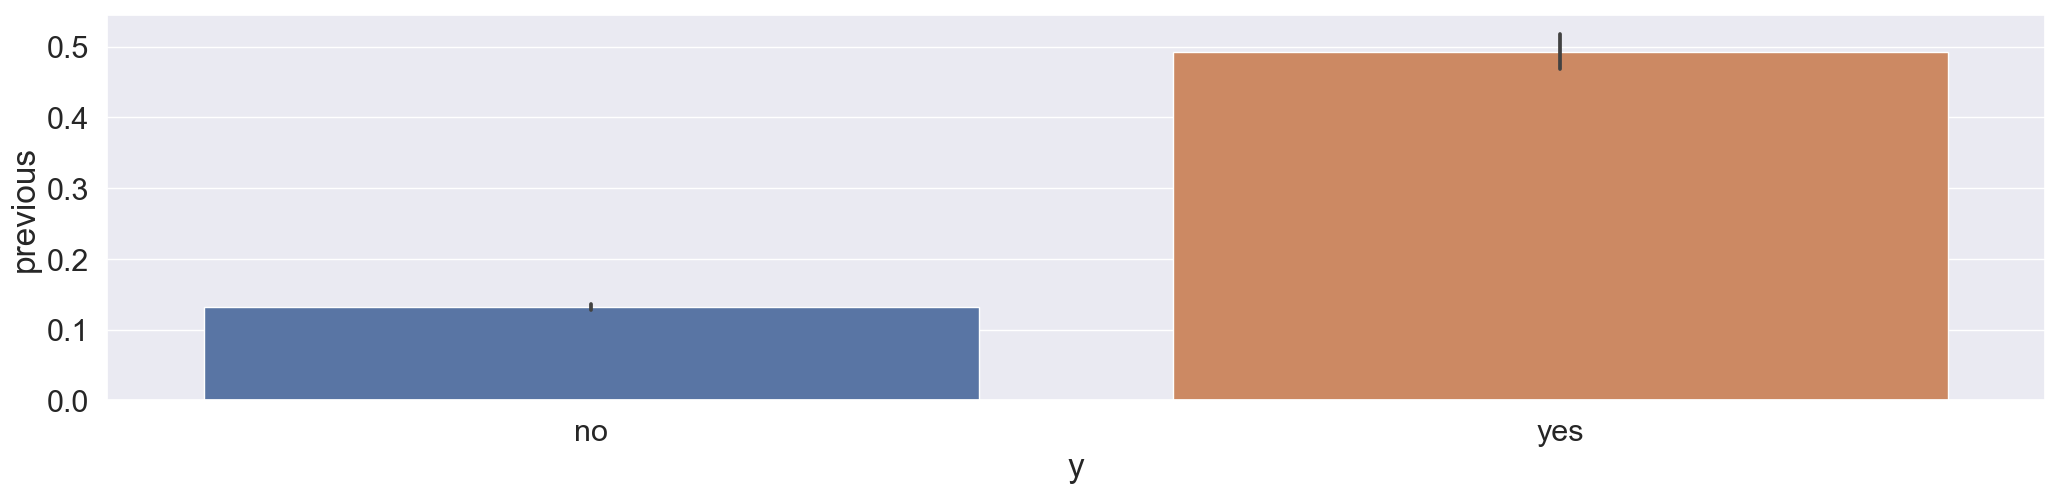

In [87]:
plt.figure(figsize=(25, 5))
sns.barplot(x='y', y=continuous_features[7], data=data)
plt.show()

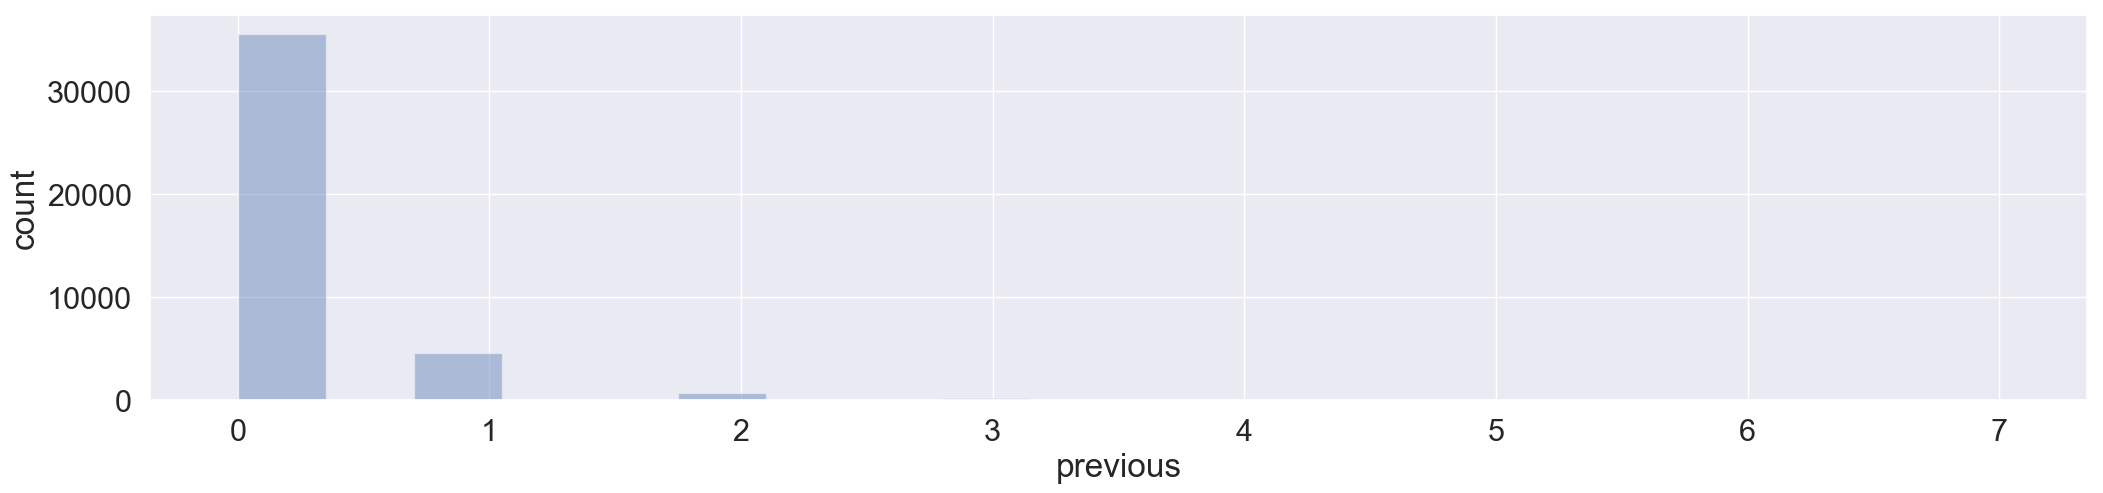

In [88]:
plt.figure(figsize=(25, 5))
sns.distplot(data[continuous_features[7]], bins=20, kde=False)
plt.ylabel('count')
plt.show()

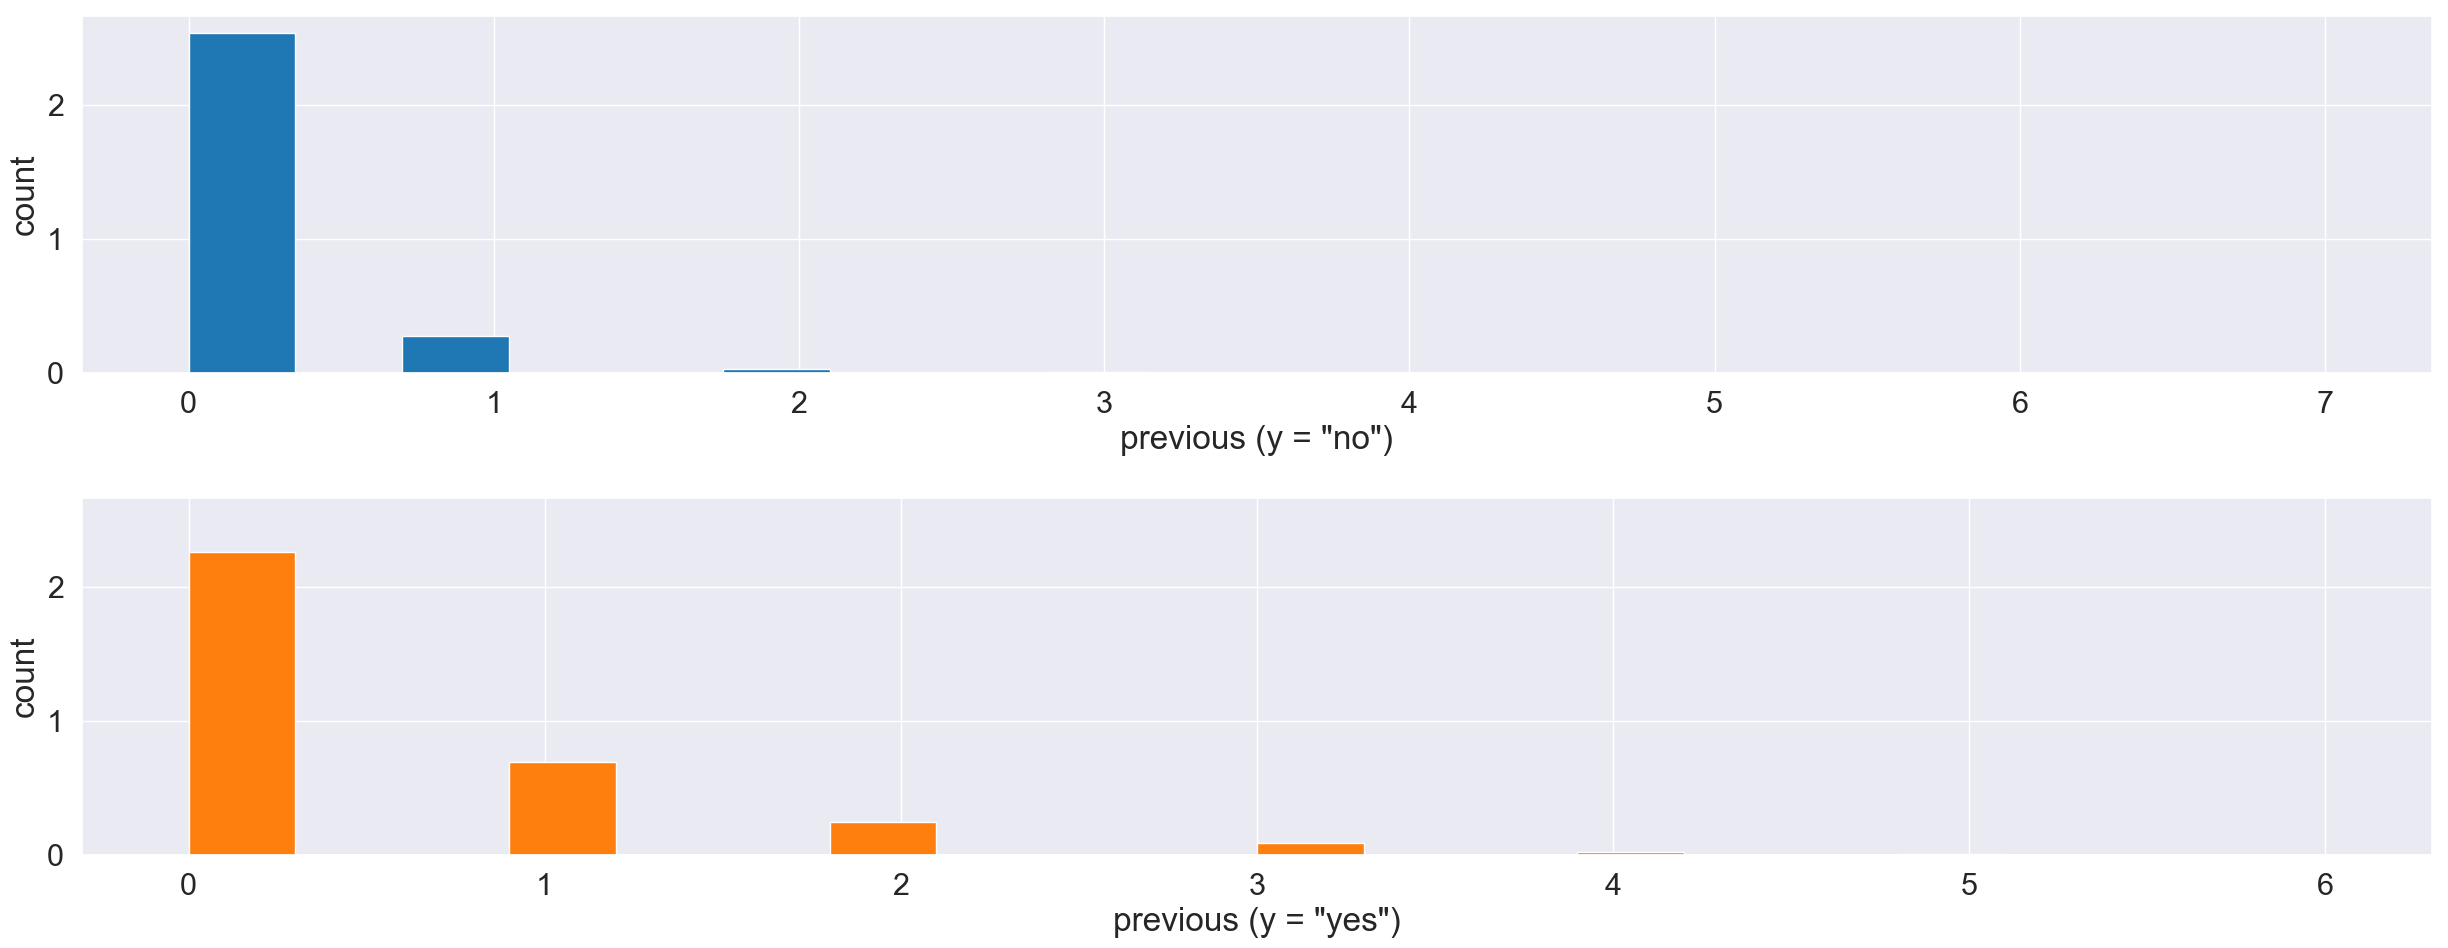

In [89]:
plot_separate_histogramms(data, continuous_features[7])

### Discrete features

Дернем из отчета все категориальные признаки и пойдем по очереди их рассматривать:

In [134]:
discrete_features = profiling_report.get_description()['variables'][profiling_report.get_description()['variables'].type == 'CAT'].index.values.tolist()

In [91]:
len(discrete_features)

11

In [135]:
discrete_features

['contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome',
 'y']

In [136]:
discrete_features = discrete_features[0:-1]

In [137]:
discrete_features

['contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome']

#### Contact (contact communication type)

Первым делом глянем как клиенты распределены по категориям:

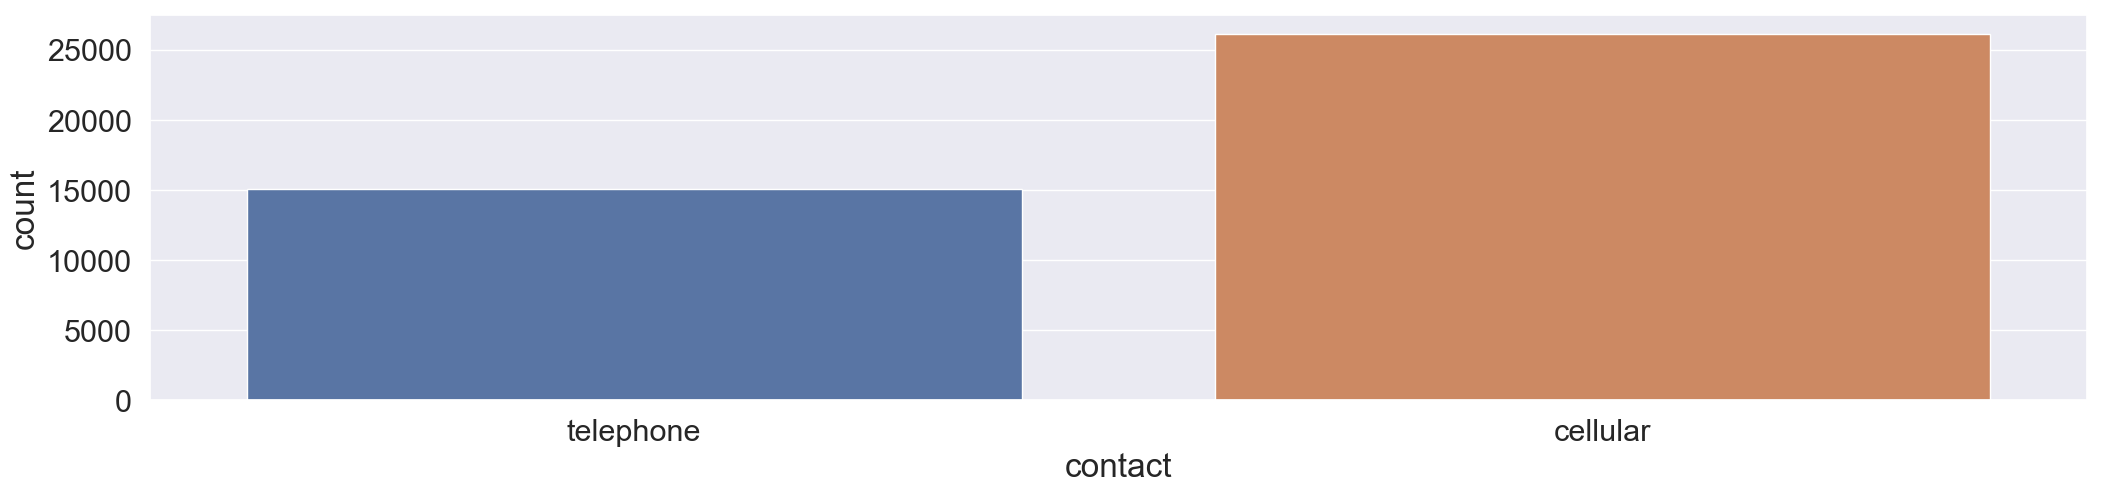

In [95]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[0], data=data)
plt.show()

Ага, чаще звонят по сотовому телефону.

Ну ладно, почему бы и нет.

Теперь глянем, есть ли какие-то отличия в этом распределении по целевым группам:

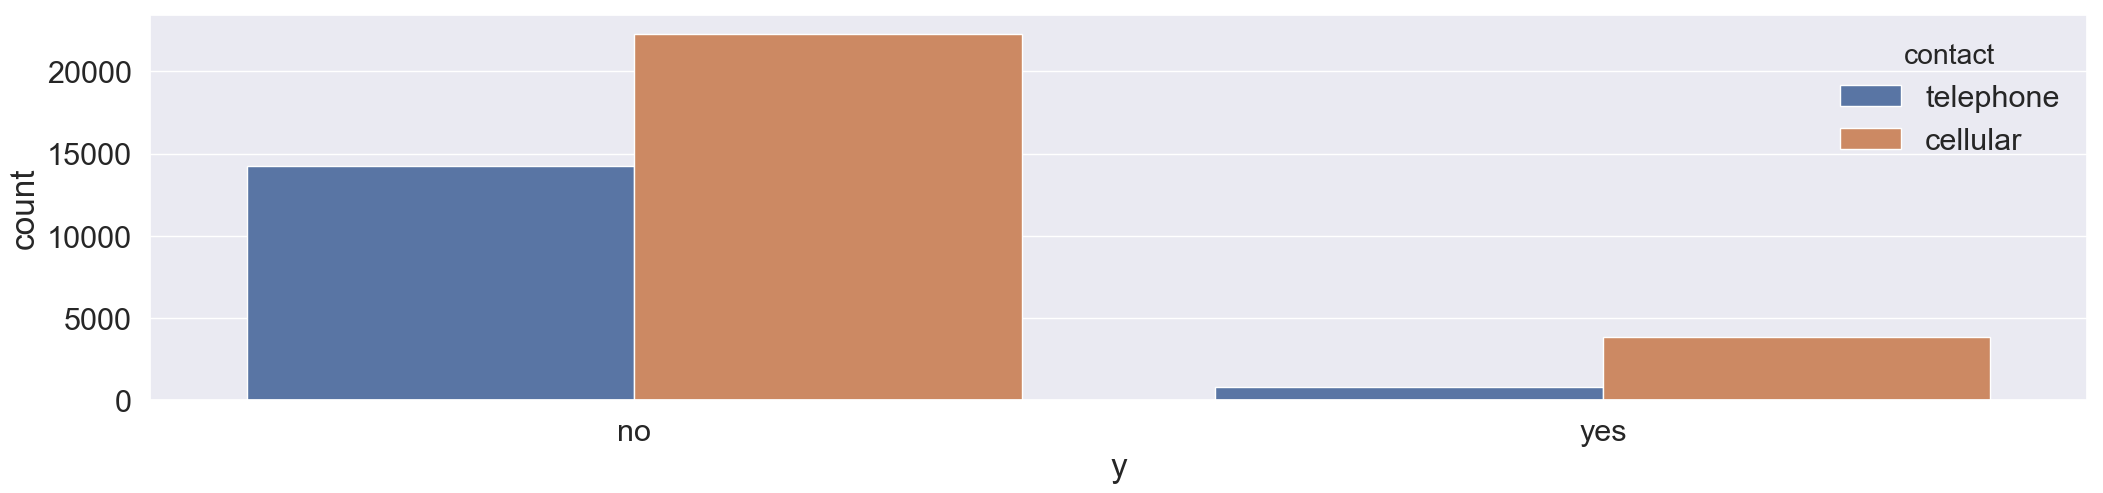

In [96]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[0], data=data)
plt.show()

Неа, что в одной, что в другой группе по сотовому телефону звонят чаще.

#### Day of week (last contact day of the week)

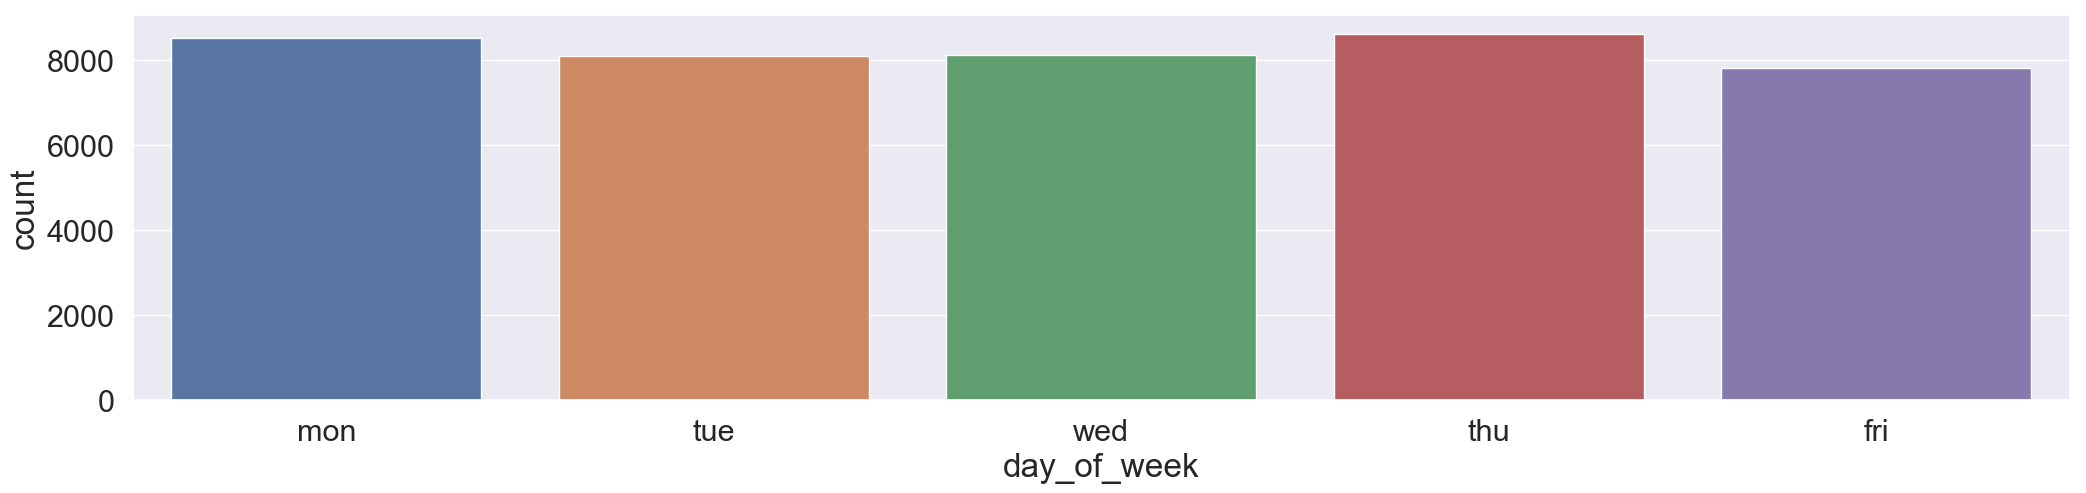

In [97]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[1], data=data)
plt.show()

Ну хорошо, что хотя бы по выходным со звонками не донимают.

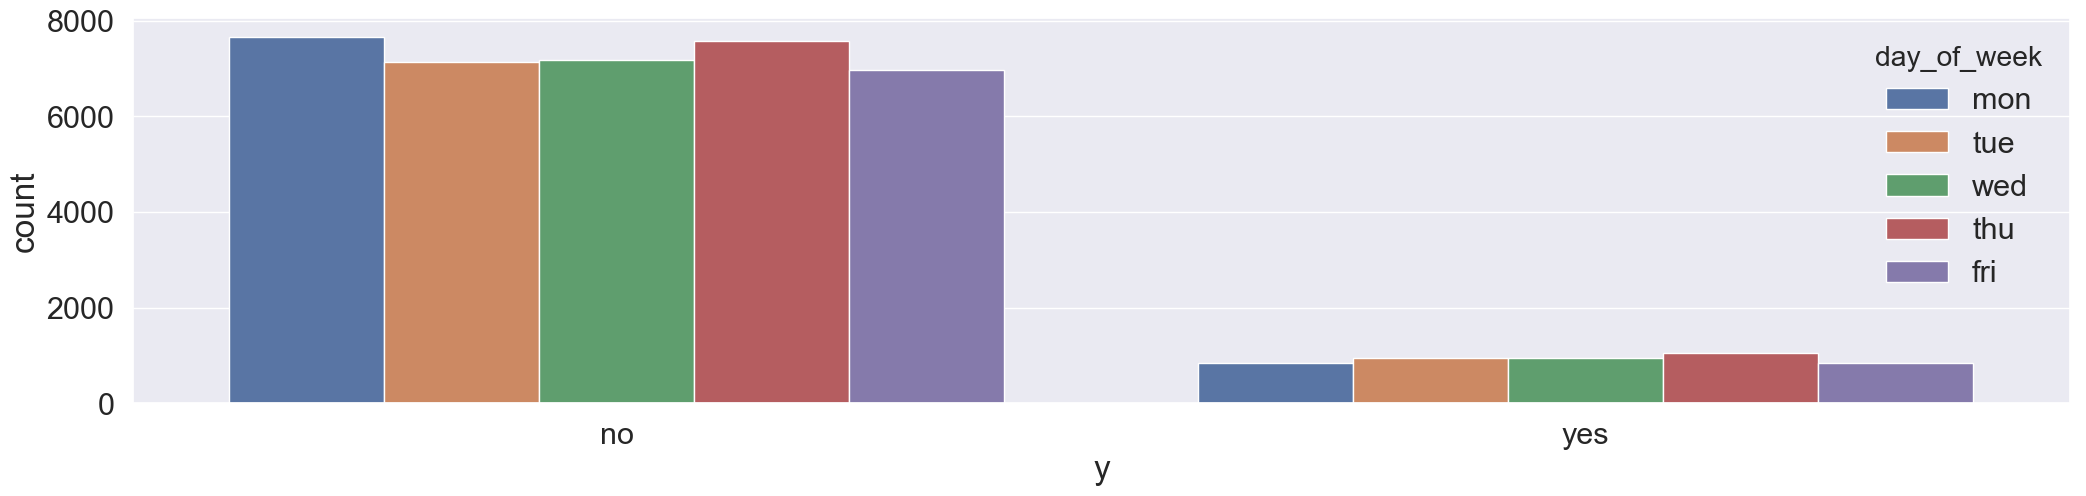

In [98]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[1], data=data)
plt.show()

#### Default (has/hasn't credit in default)

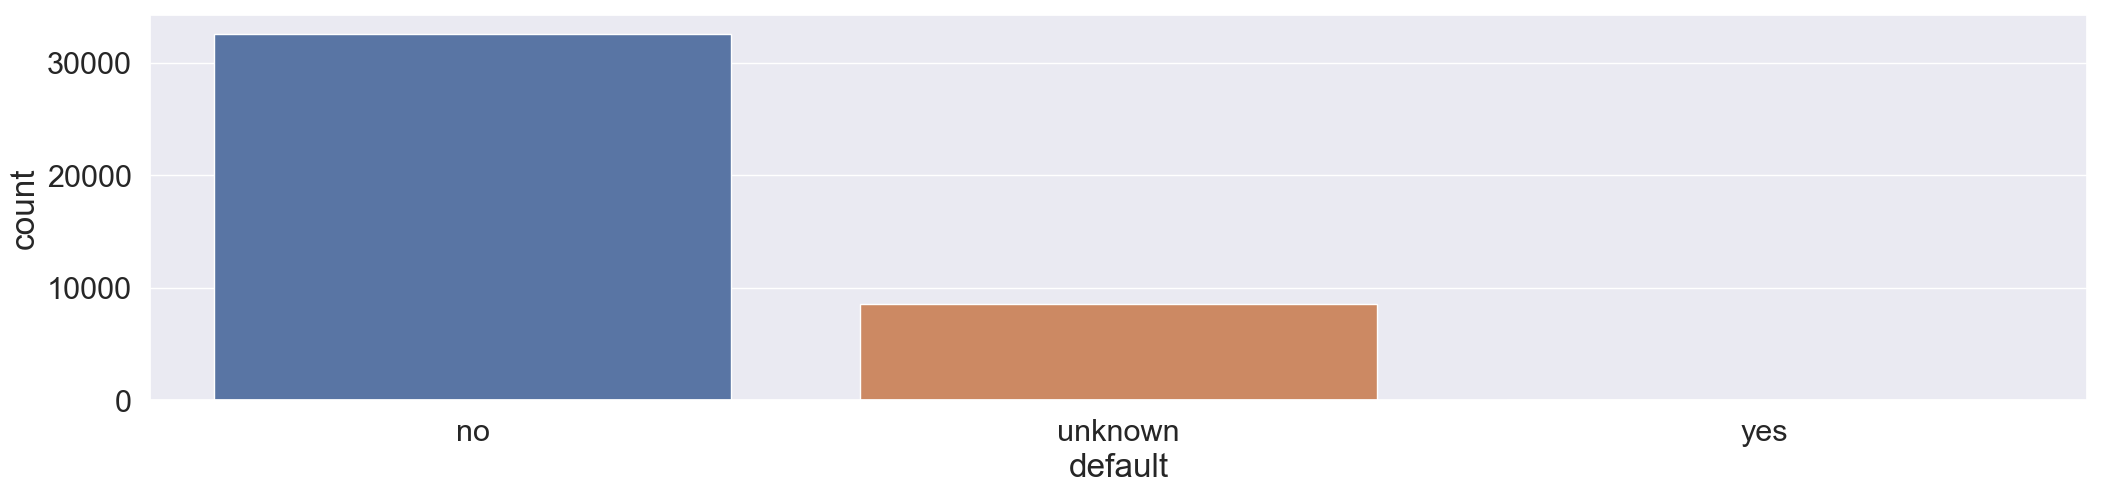

In [99]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[2], data=data)
plt.show()

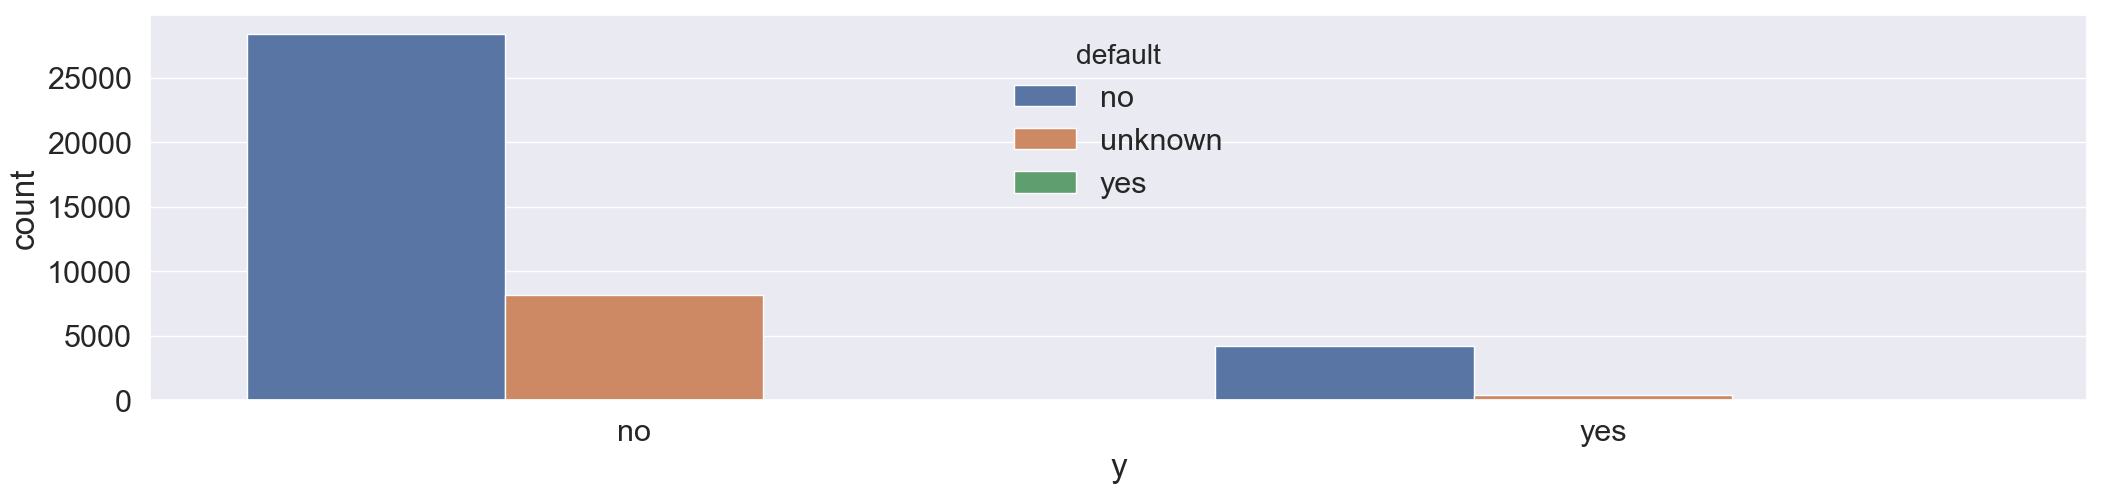

In [100]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[2], data=data)
plt.show()

In [101]:
data[discrete_features[2]].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [102]:
data[data[discrete_features[2]] == 'yes'].T

21580                21581        24866
age                              48                   48           31
job                      technician           technician   unemployed
marital                     married              married      married
education       professional.course  professional.course  high.school
default                         yes                  yes          yes
housing                          no                  yes           no
loan                             no                   no           no
contact                    cellular             cellular     cellular
month                           aug                  aug          nov
day_of_week                     tue                  tue          tue
duration                         66                  133          111
campaign                          1                    1            2
pdays                           999                  999          999
previous                          0                    0            1
poutcome                nonexistent          nonexistent      failure
emp.var.rate                    1.4                  1.4         -0.1
cons.price.idx               93.444               93.444         93.2
cons.conf.idx                 -36.1                -36.1          -42
euribor3m                     4.963                4.963        4.153
nr.employed                  5228.1               5228.1       5195.8
y                                no                   no           no

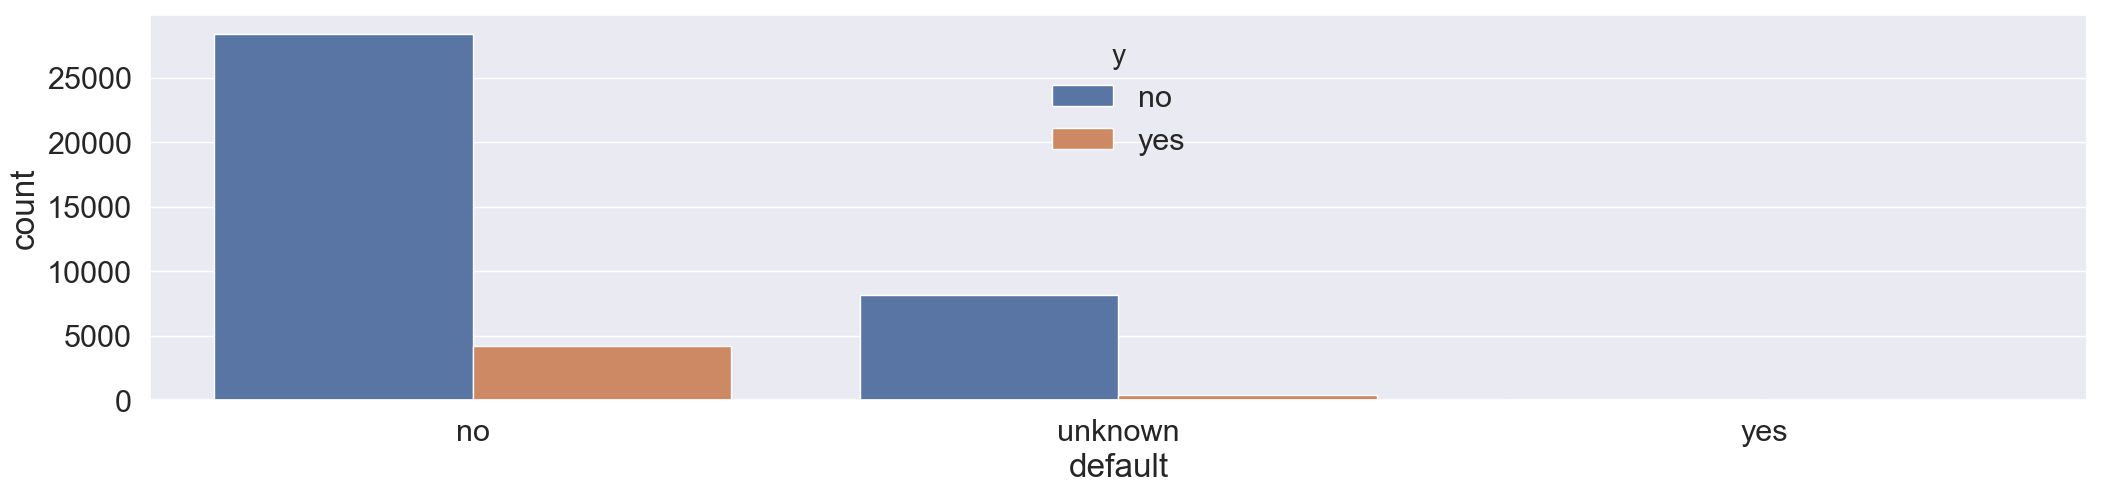

In [103]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[2], hue='y', data=data)
plt.show()

#### Education

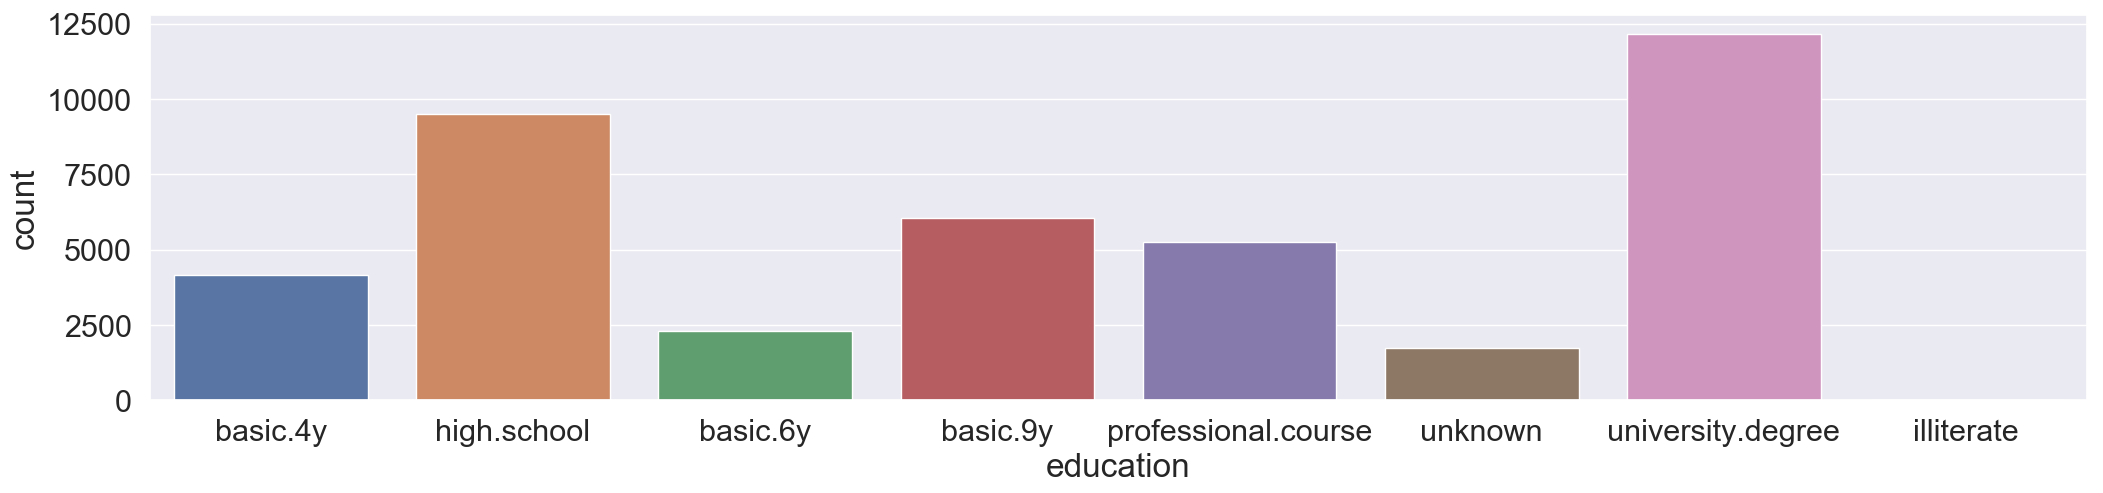

In [104]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[3], data=data)
plt.show()

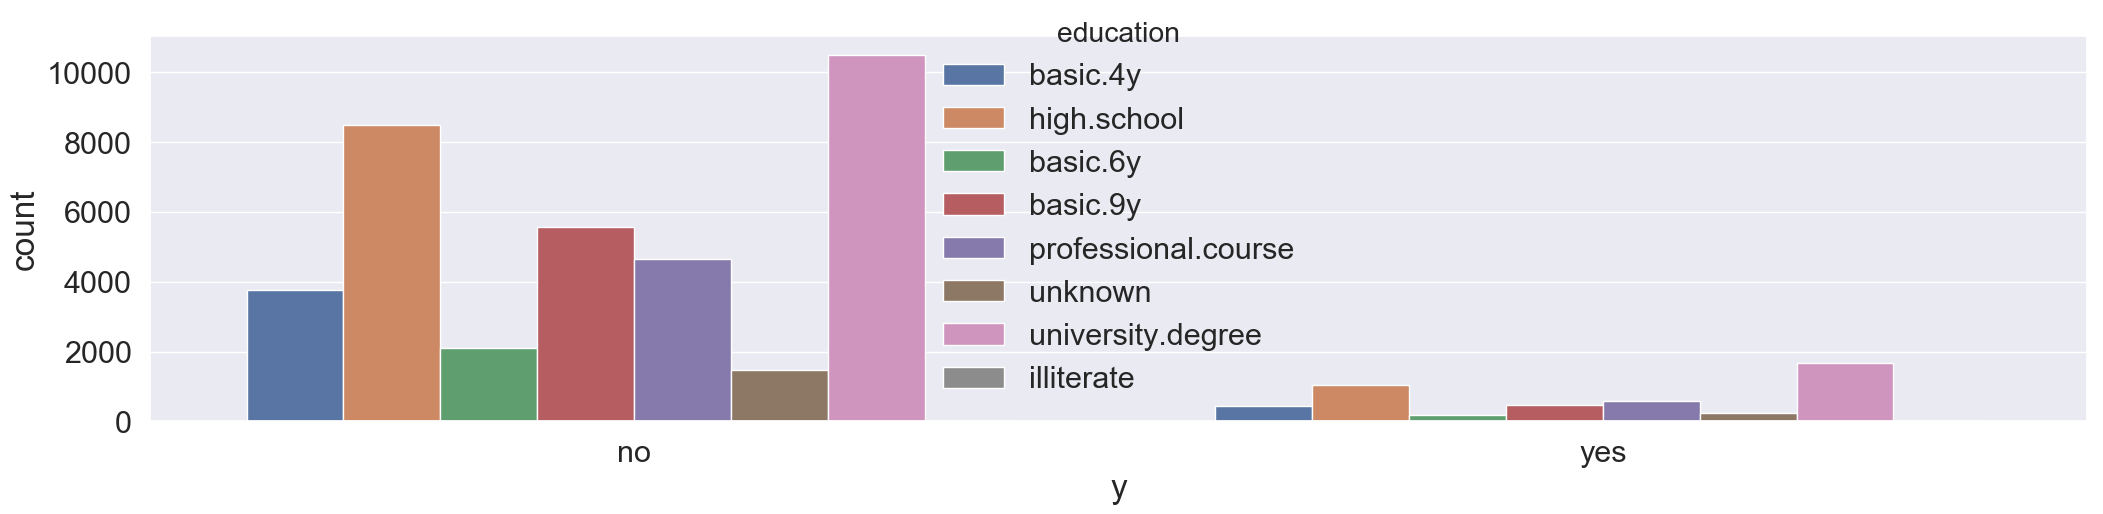

In [105]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[3], data=data)
plt.show()

In [106]:
data[discrete_features[3]].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [107]:
data[data[discrete_features[3]] == 'illiterate'].T

5393         6928         12383        14445  \
age                      45           45           51           55   
job             blue-collar  blue-collar       admin.  blue-collar   
marital             married      married      married      married   
education        illiterate   illiterate   illiterate   illiterate   
default             unknown      unknown      unknown           no   
housing                  no           no           no          yes   
loan                    yes           no           no           no   
contact           telephone    telephone     cellular     cellular   
month                   may          may          jul          jul   
day_of_week             fri          thu          mon          tue   
duration                333         1196          151           92   
campaign                  2            1            4            3   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.4          1.4   
cons.price.idx       93.994       93.994       93.918       93.918   
cons.conf.idx         -36.4        -36.4        -42.7        -42.7   
euribor3m             4.857         4.86         4.96        4.961   
nr.employed            5191         5191       5228.1       5228.1   
y                        no           no           no           no   

                      14486        16269        17739        22402  \
age                      55           60           54           45   
job             blue-collar    housemaid  blue-collar  blue-collar   
marital             married      married      married      married   
education        illiterate   illiterate   illiterate   illiterate   
default                  no      unknown      unknown           no   
housing                  no          yes          yes          yes   
loan                     no           no          yes           no   
contact            cellular     cellular     cellular     cellular   
month                   jul          jul          jul          aug   
day_of_week             tue          tue          tue          fri   
duration                129          176           83          127   
campaign                  2            7            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.4          1.4          1.4          1.4   
cons.price.idx       93.918       93.918       93.918       93.444   
cons.conf.idx         -42.7        -42.7        -42.7        -36.1   
euribor3m             4.961        4.961        4.961        4.964   
nr.employed          5228.1       5228.1       5228.1       5228.1   
y                        no           no           no           no   

                      22642          26680          26689          26756  \
age                      44             34             34             34   
job             blue-collar  self-employed  self-employed  self-employed   
marital             married        married        married        married   
education        illiterate     illiterate     illiterate     illiterate   
default                  no             no             no             no   
housing                  no            yes            yes            yes   
loan                     no             no             no             no   
contact            cellular       cellular       cellular       cellular   
month                   aug            nov            nov            nov   
day_of_week             fri            thu            thu            thu   
duration                460             51            488            113   
campaign                  1 

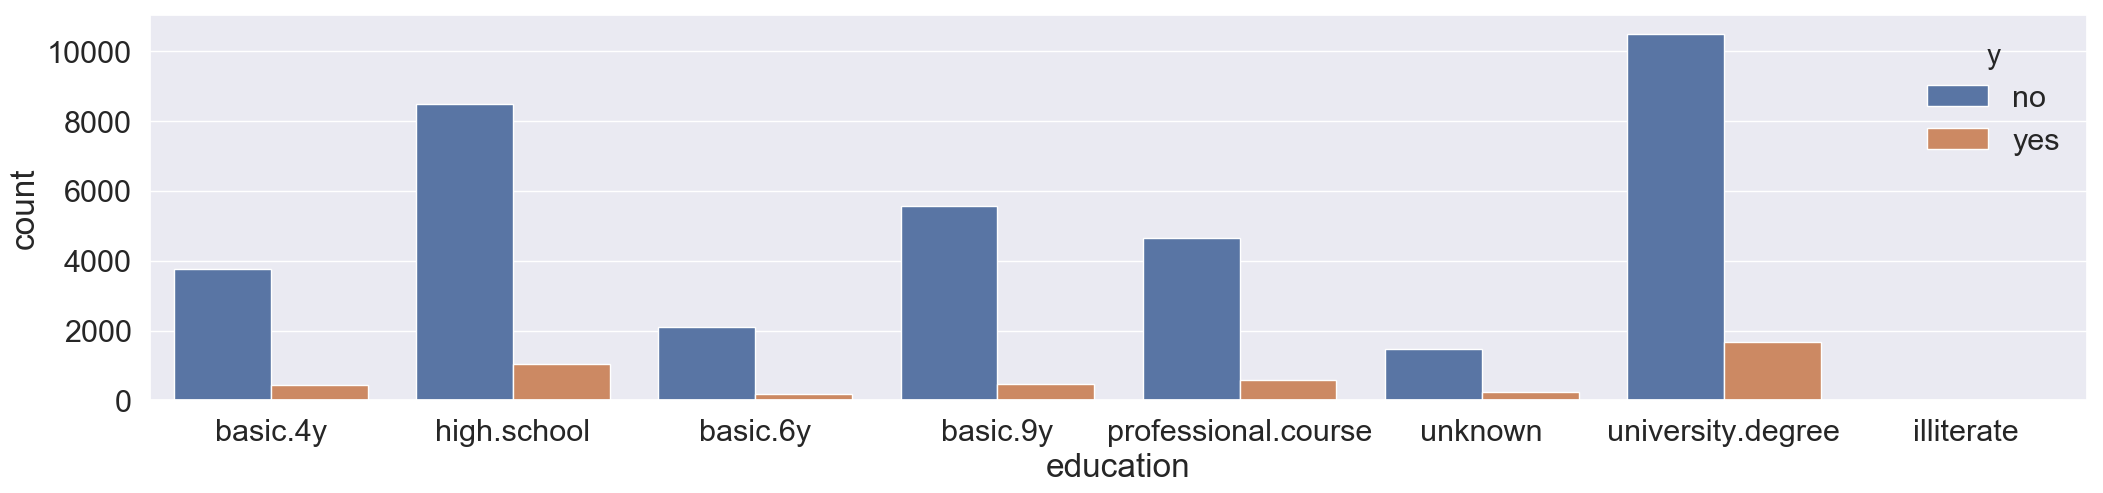

In [108]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[3], hue='y', data=data)
plt.show()

#### Housing (has/hasn't housing loan)

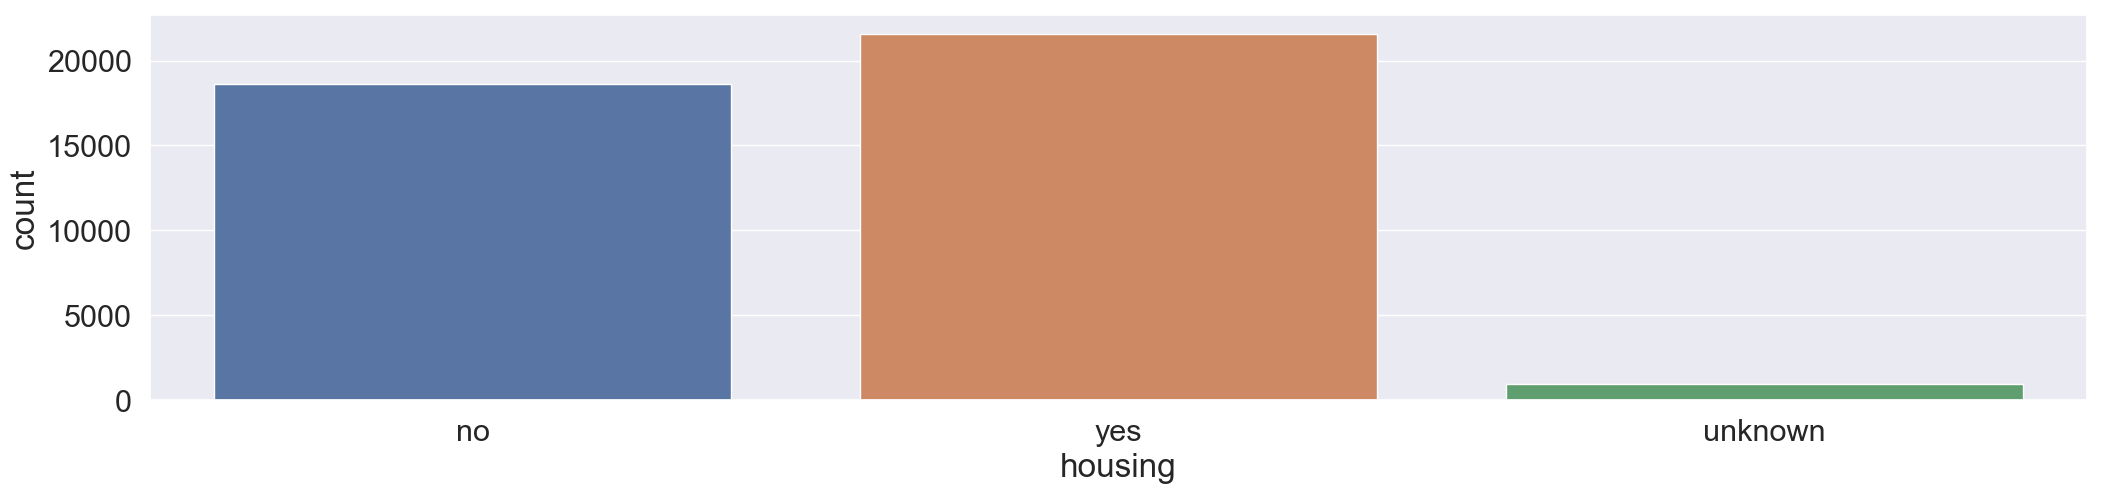

In [109]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[4], data=data)
plt.show()

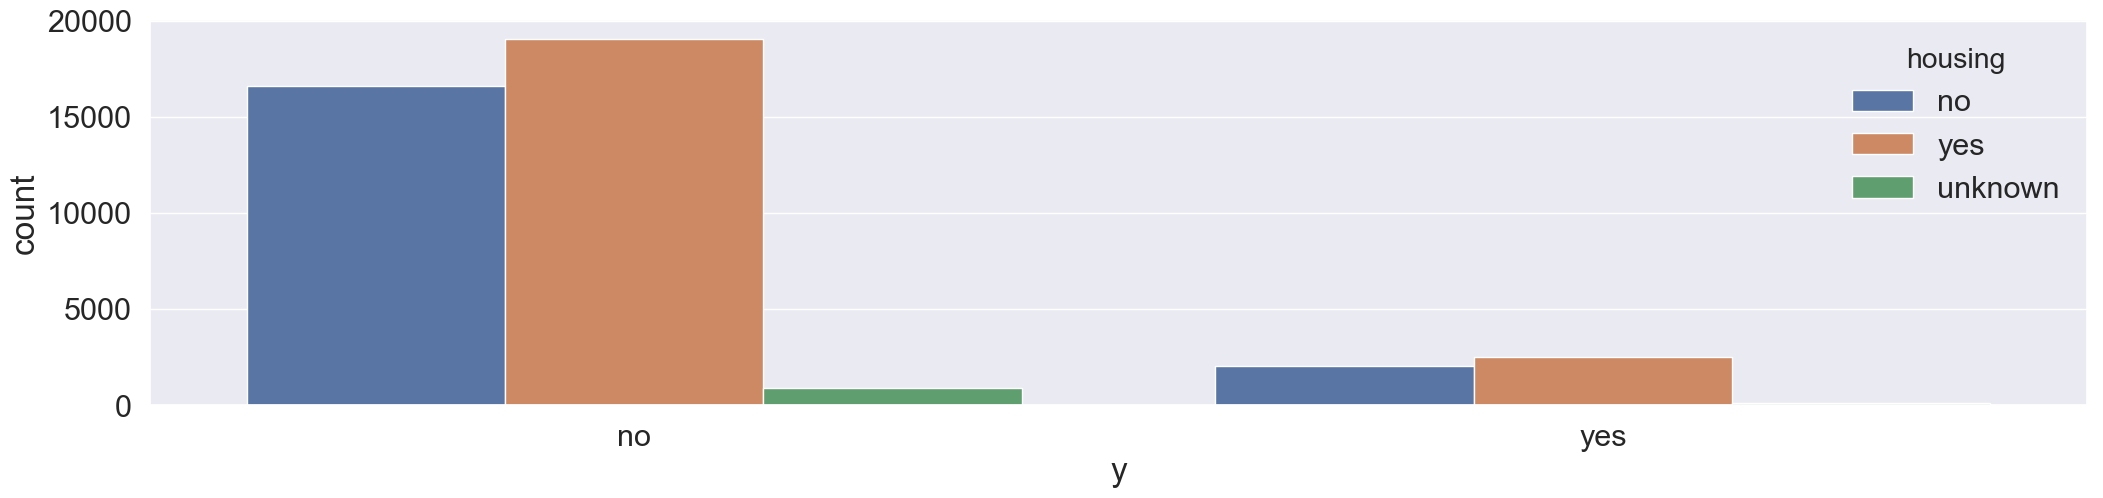

In [110]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[4], data=data)
plt.show()

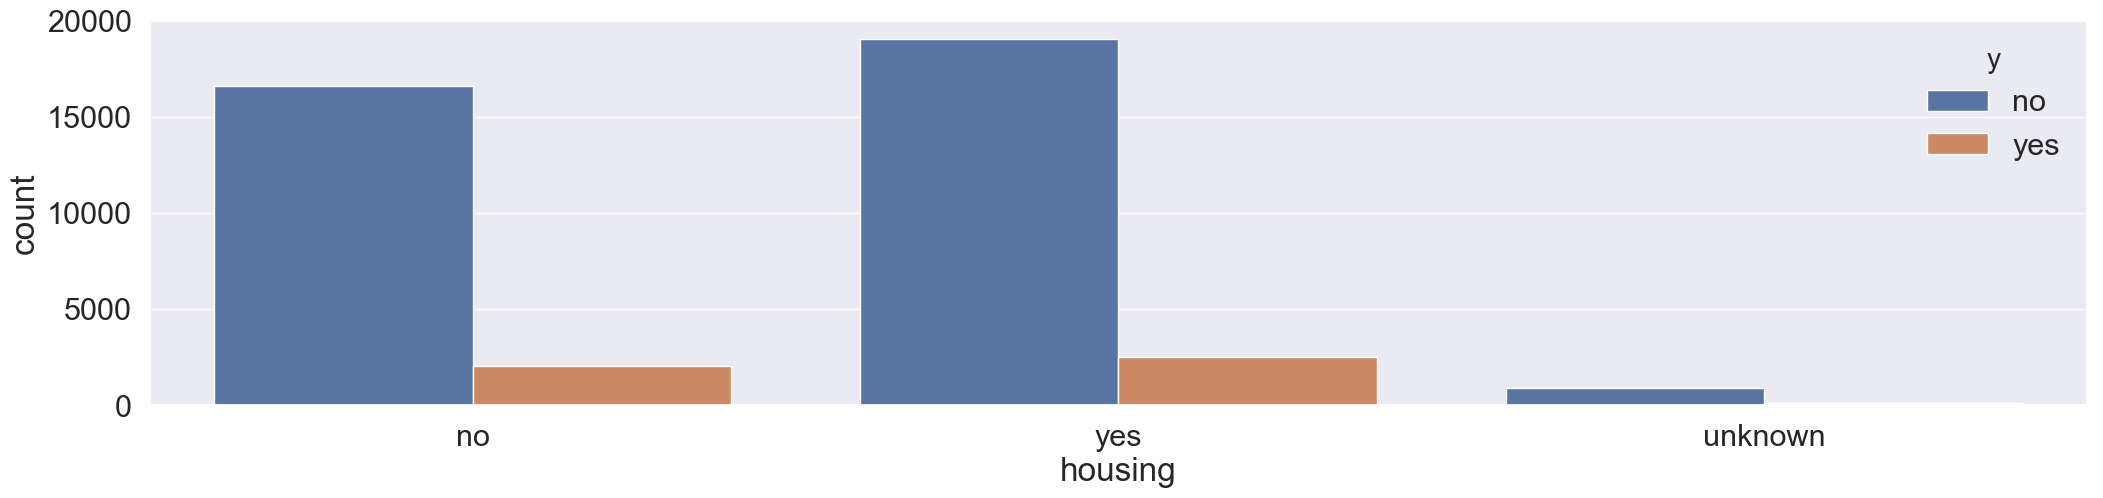

In [111]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[4], hue='y', data=data)
plt.show()

#### Job (type of job)

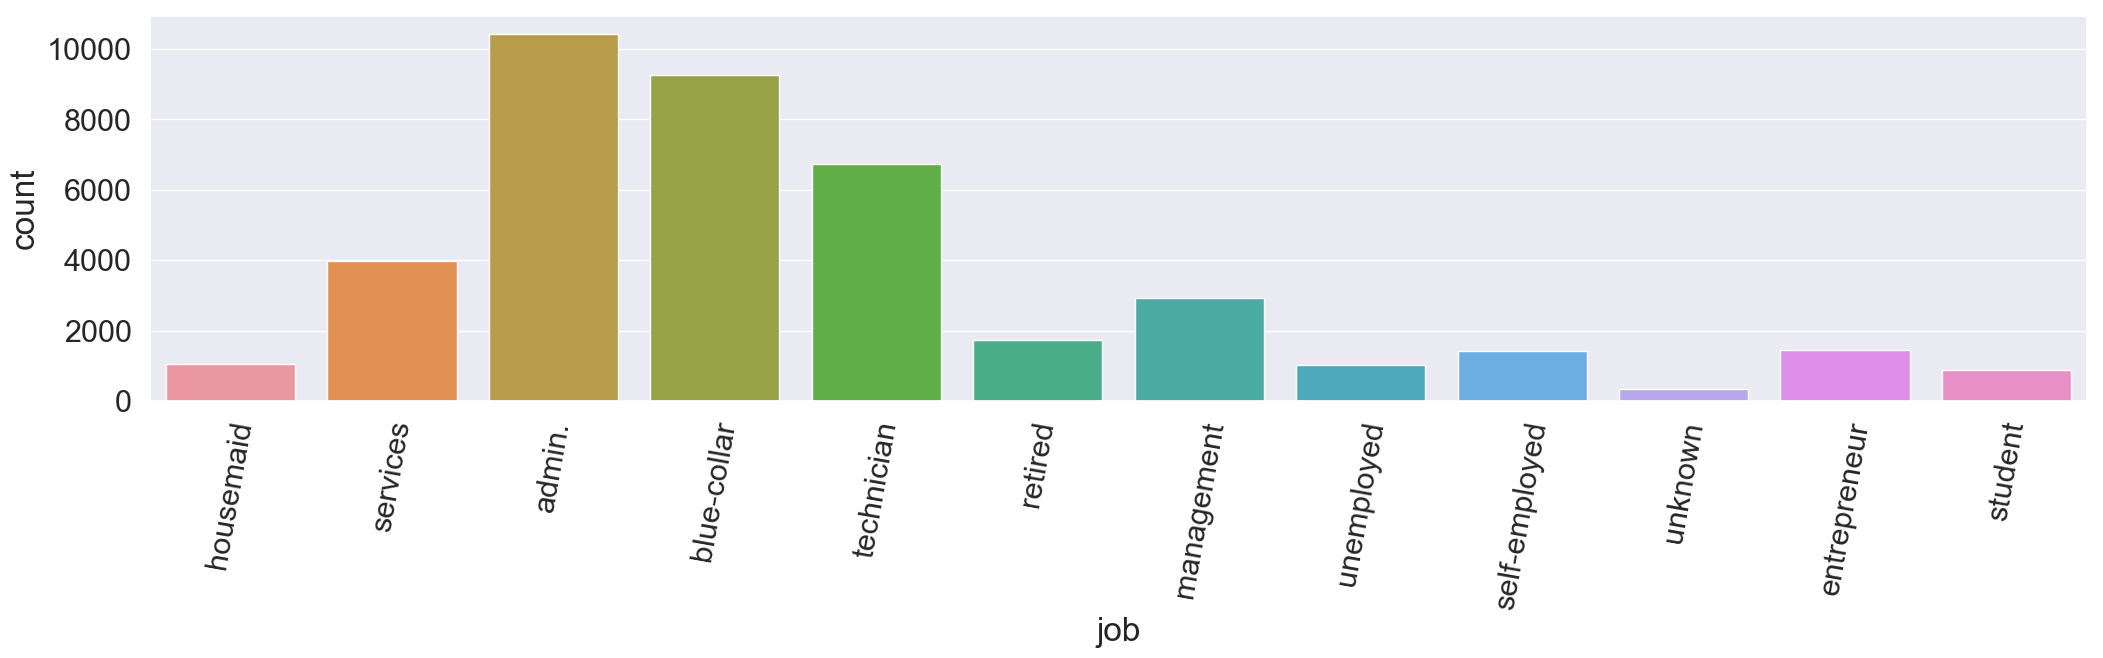

In [129]:
plt.figure(figsize=(25, 5))
ax = sns.countplot(x=discrete_features[5], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.show()

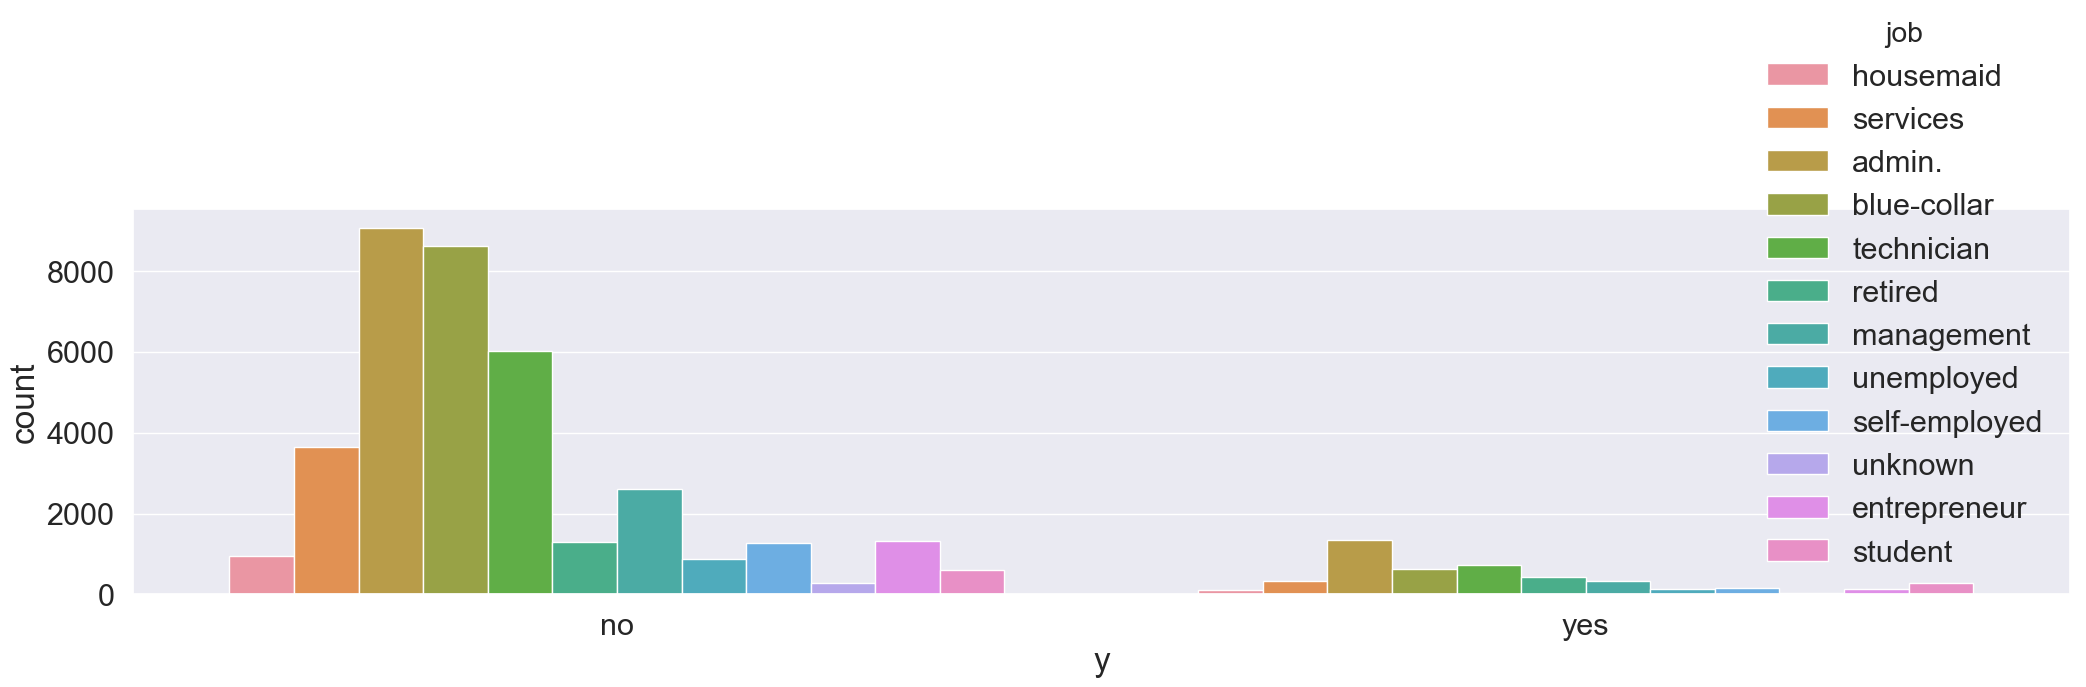

In [113]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[5], data=data)
plt.show()

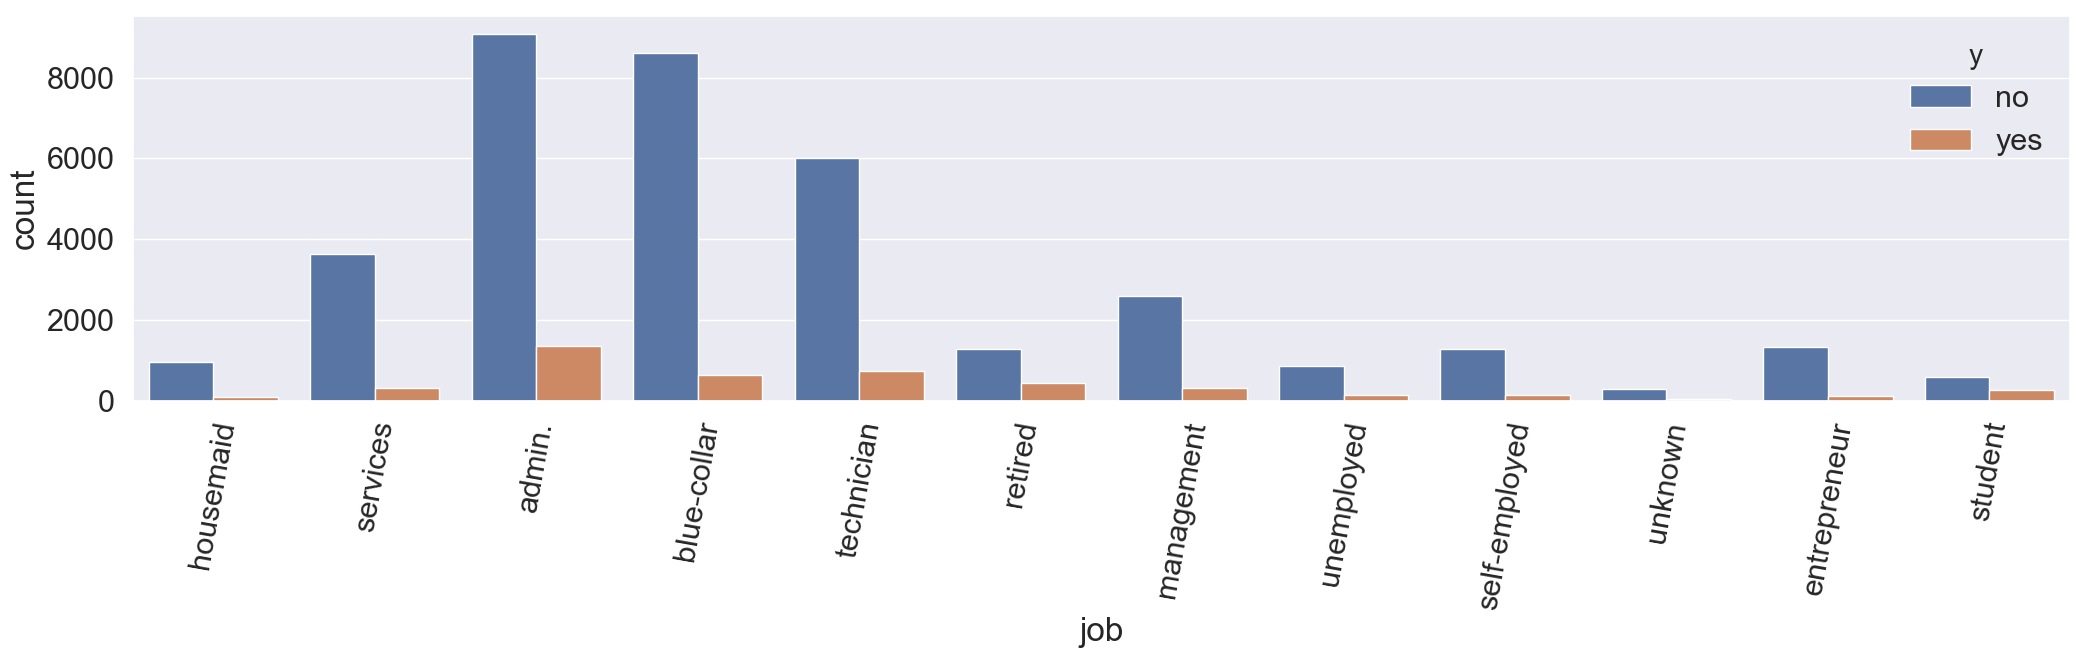

In [130]:
plt.figure(figsize=(25, 5))
ax = sns.countplot(x=discrete_features[5], hue='y', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.show()

#### Loan (has/hasn't personal loan)

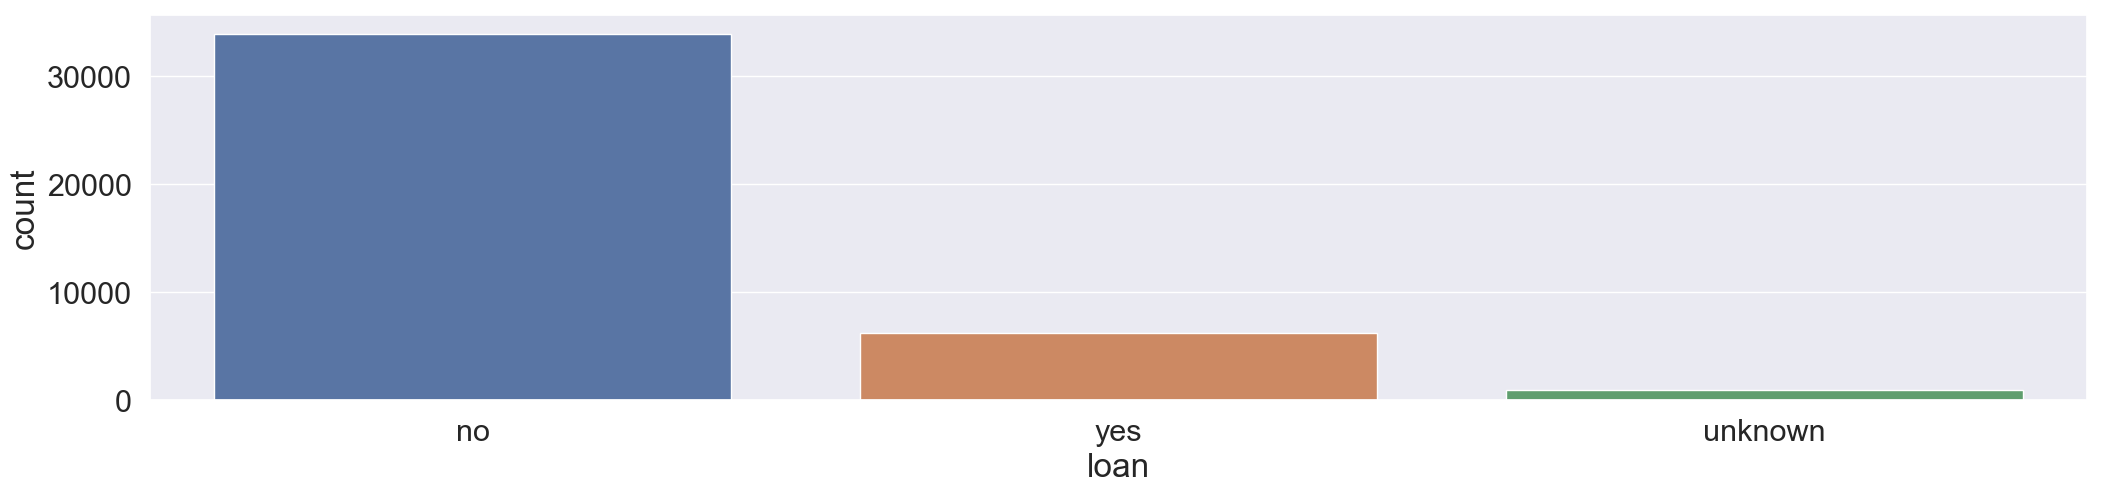

In [115]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[6], data=data)
plt.show()

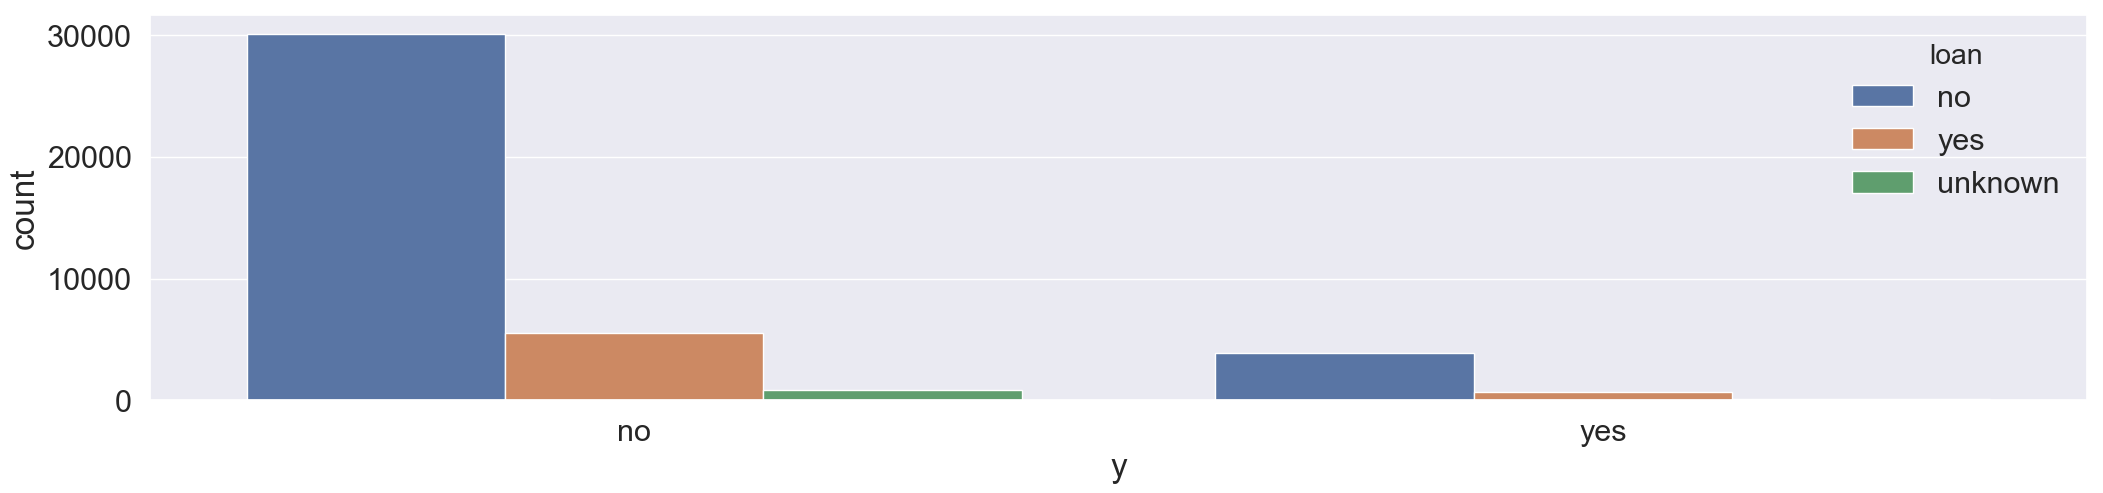

In [116]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[6], data=data)
plt.show()

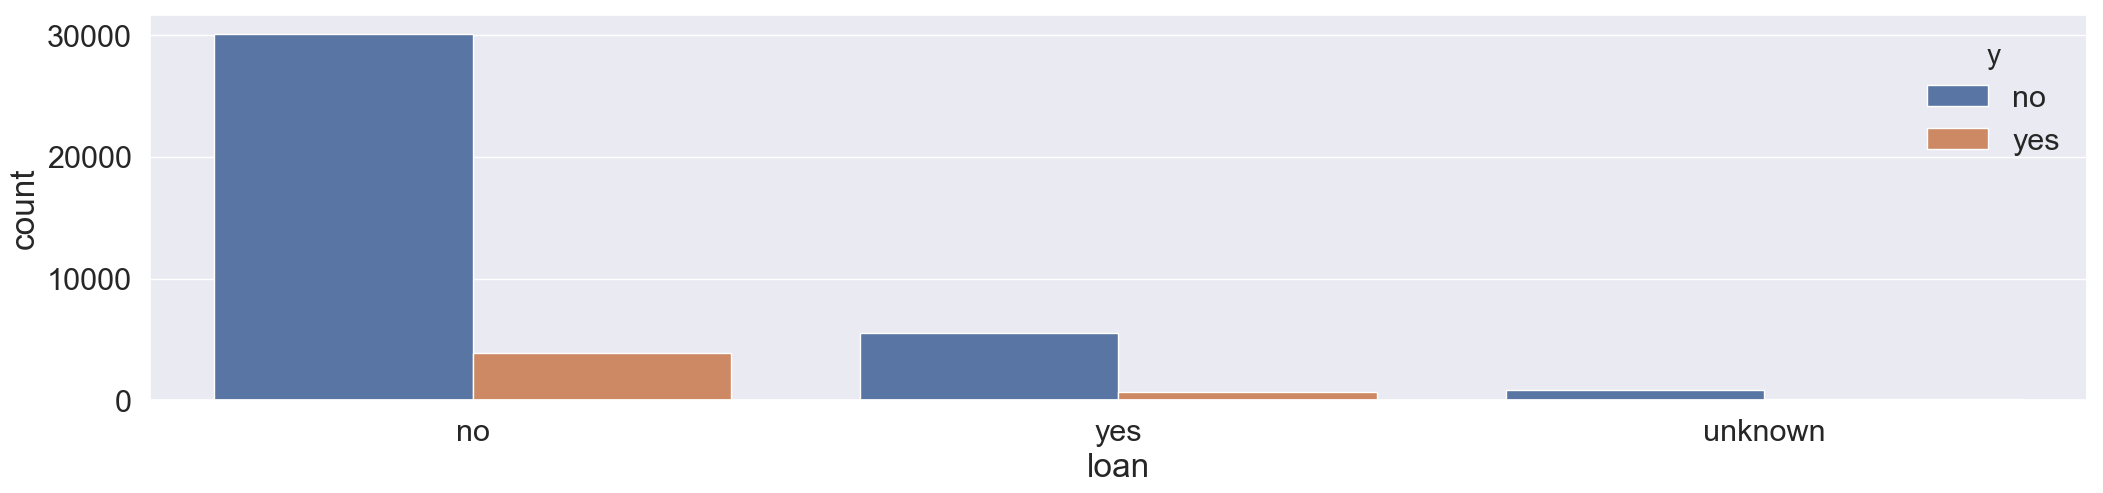

In [117]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[6], hue='y', data=data)
plt.show()

#### Marital status

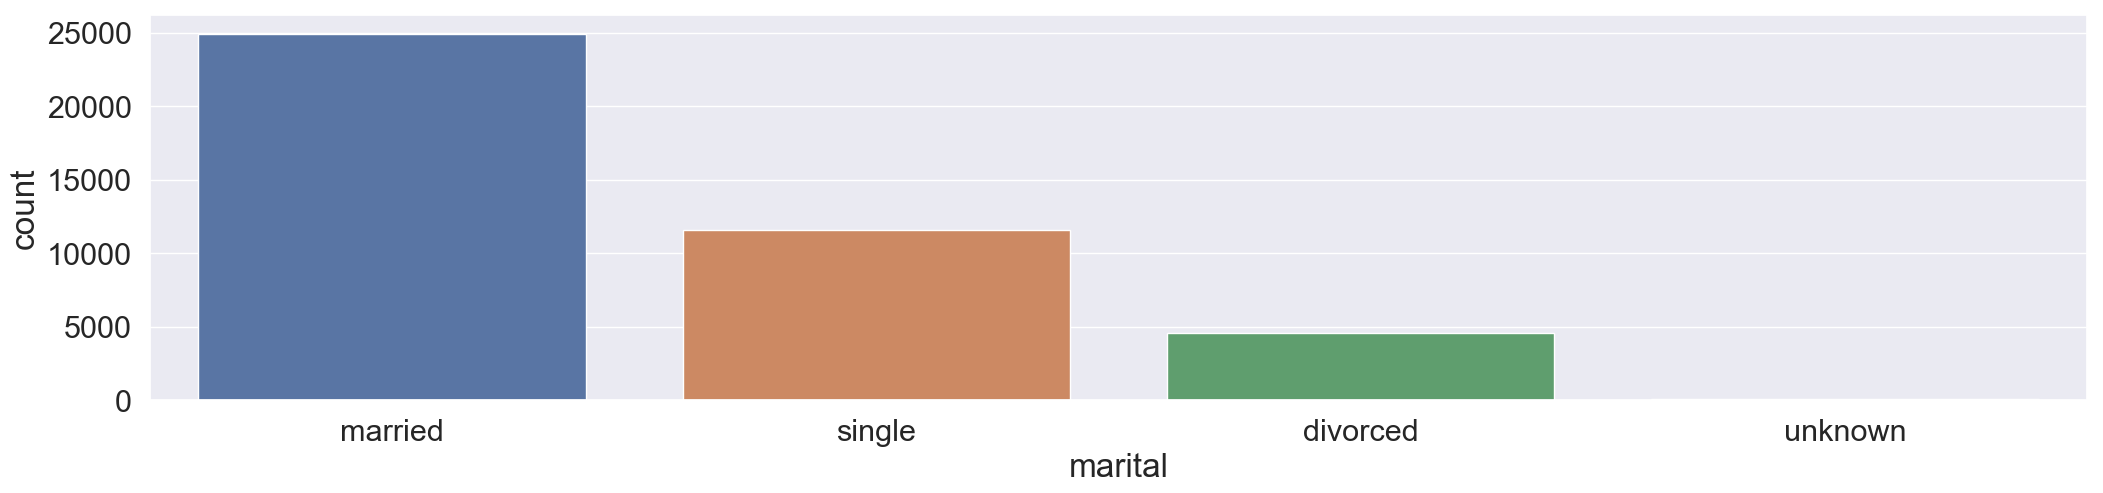

In [118]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[7], data=data)
plt.show()

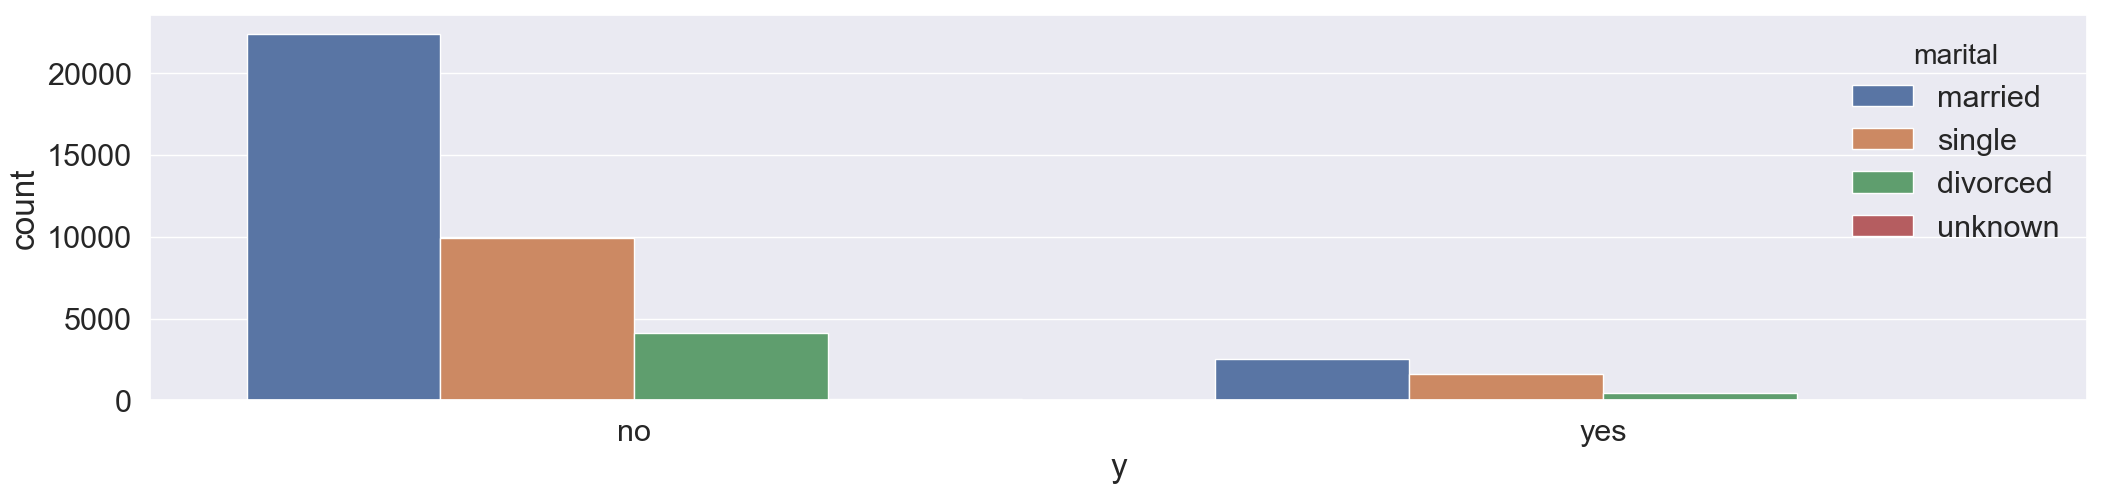

In [119]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[7], data=data)
plt.show()

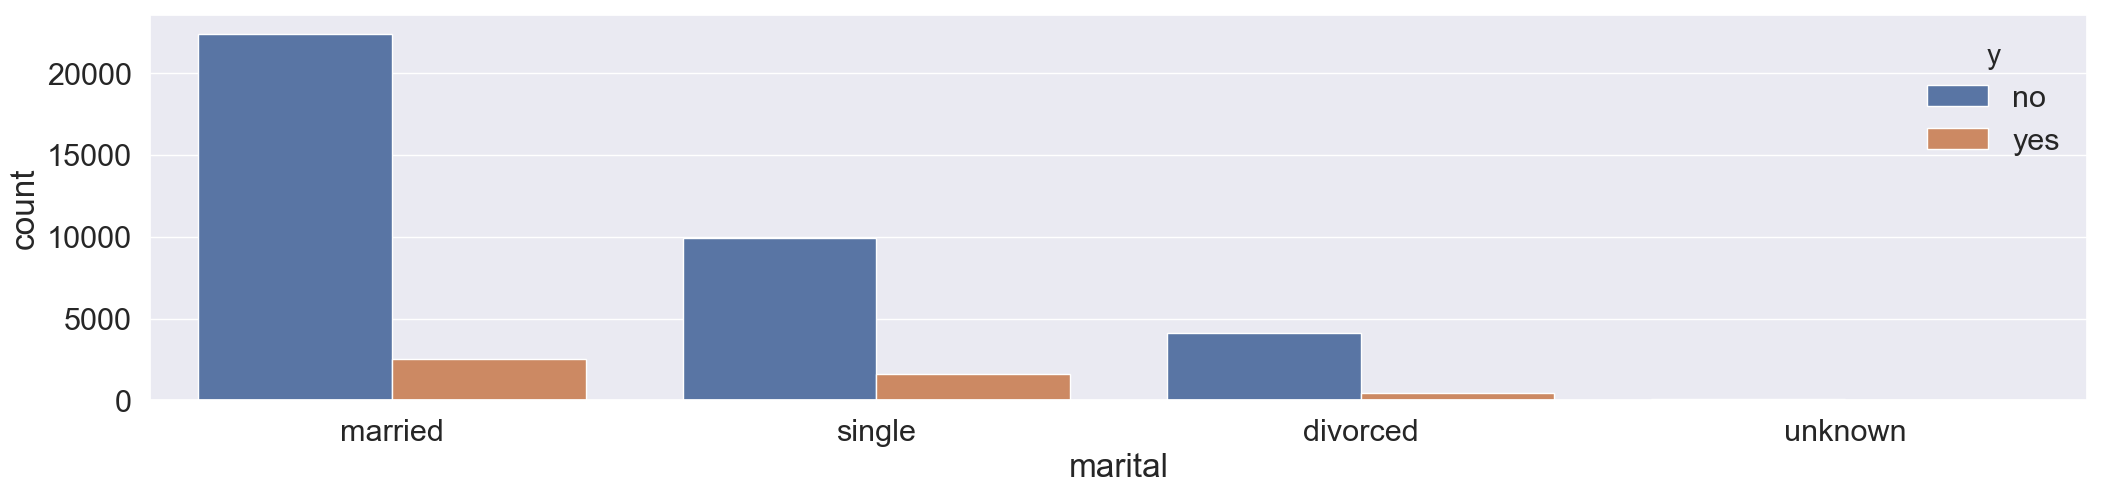

In [120]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[7], hue='y', data=data)
plt.show()

#### Month (last contact month of year)

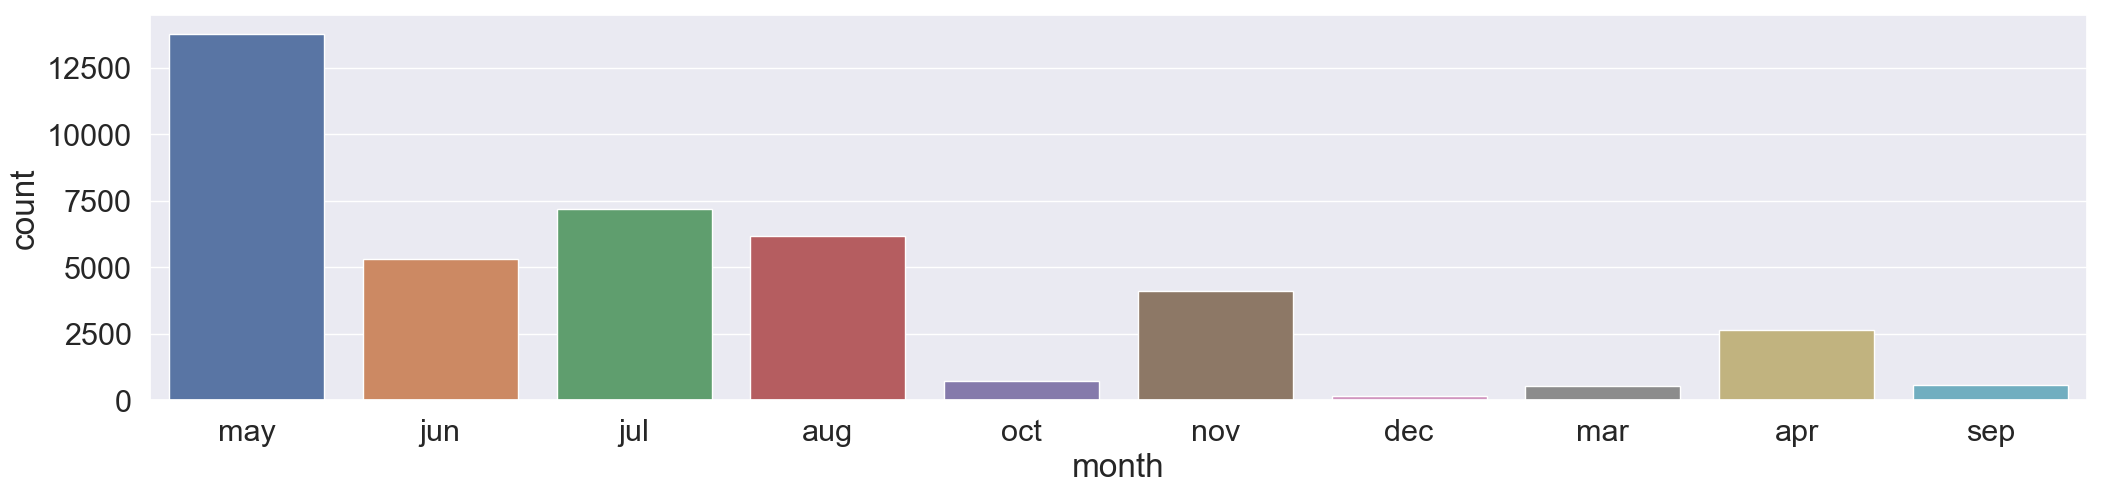

In [121]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[8], data=data)
plt.show()

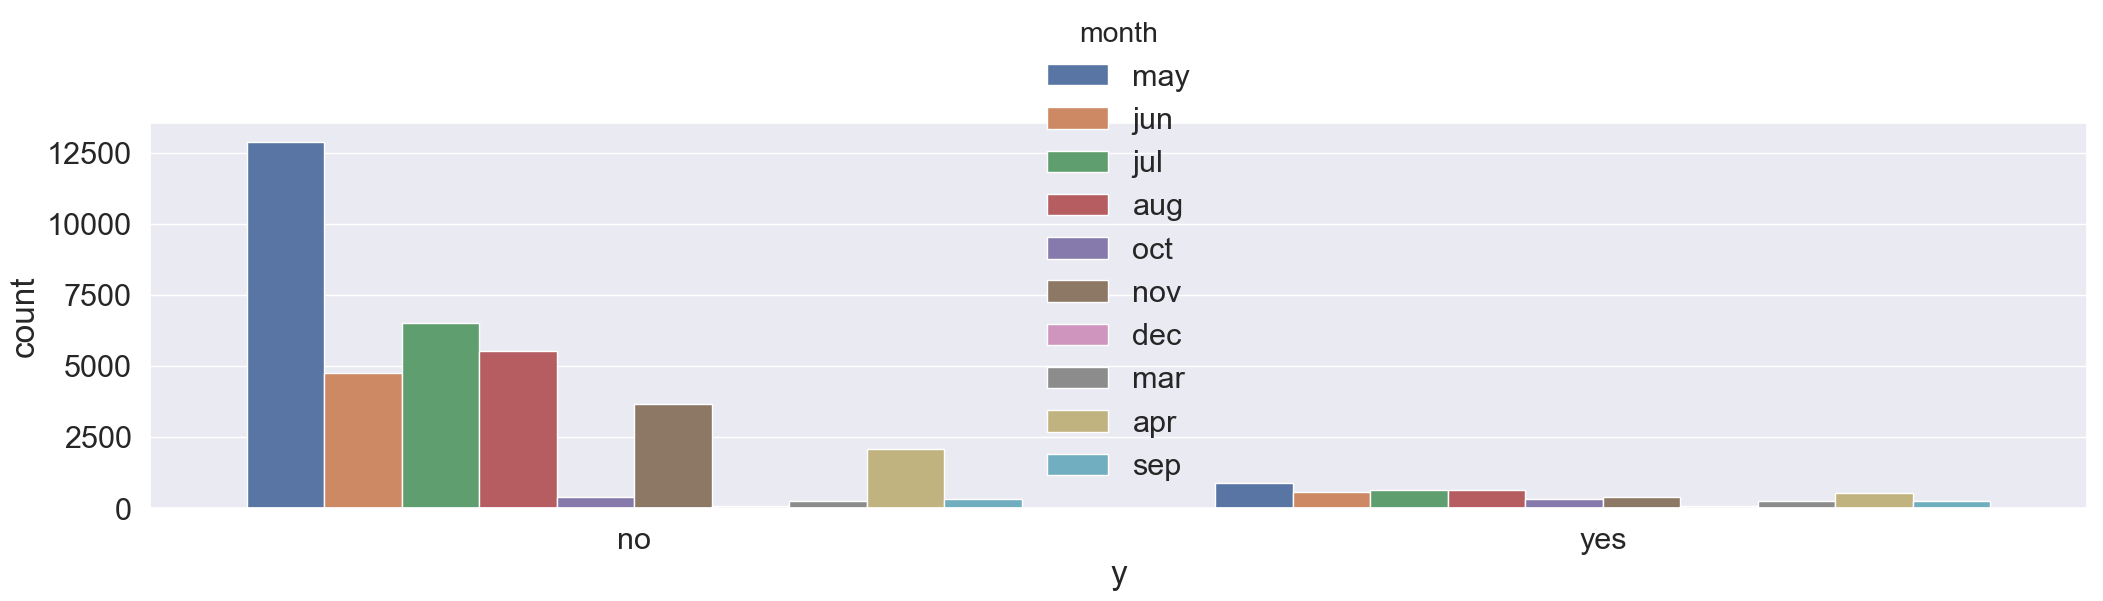

In [122]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[8], data=data)
plt.show()

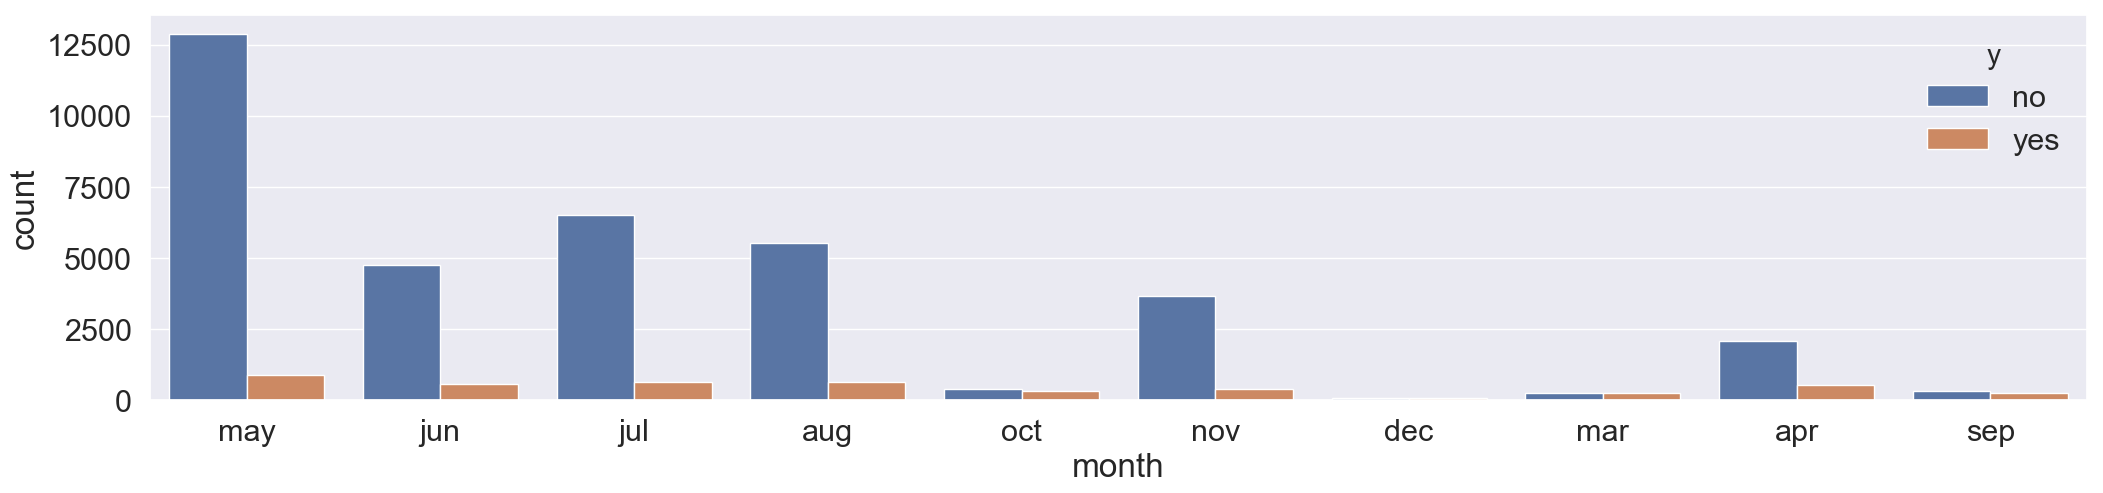

In [123]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[8], hue='y', data=data)
plt.show()

#### P-Outcome (outcome of the previous marketing campaign)

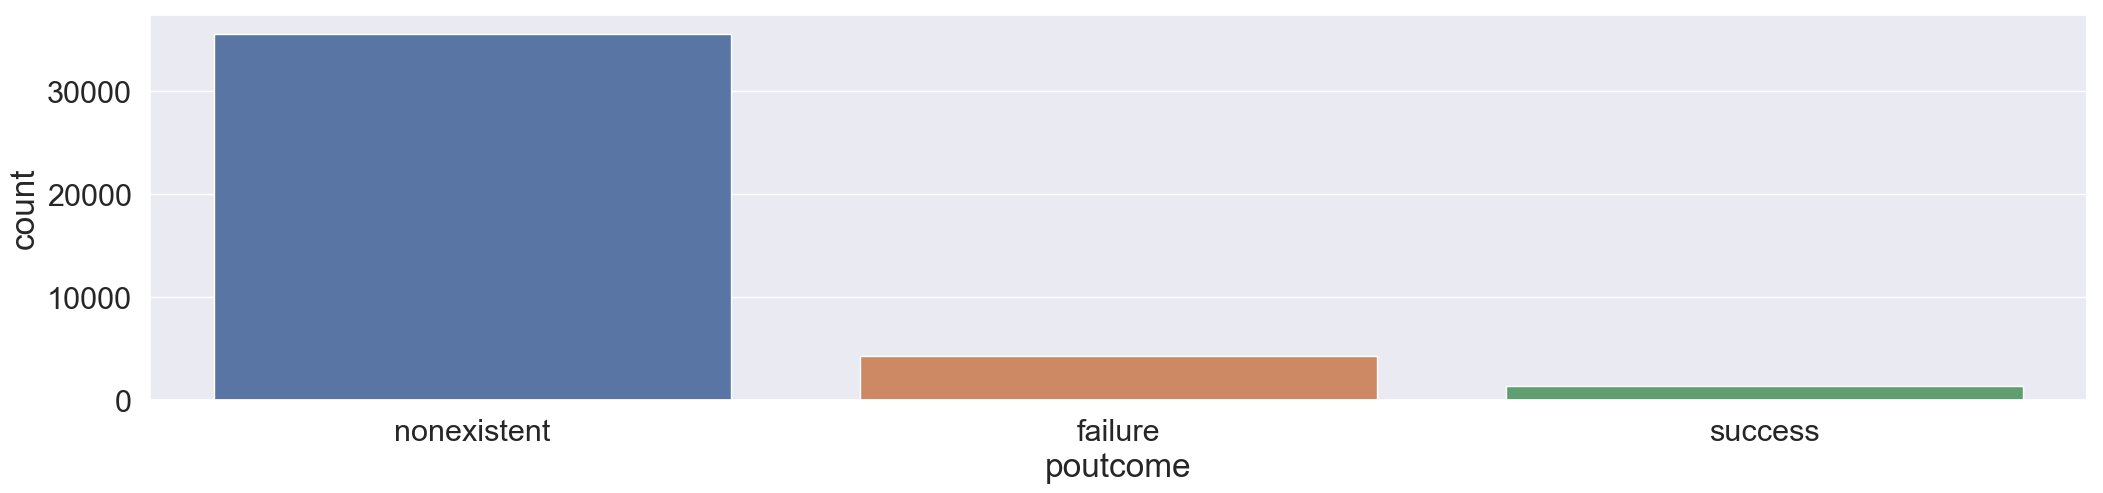

In [124]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[9], data=data)
plt.show()

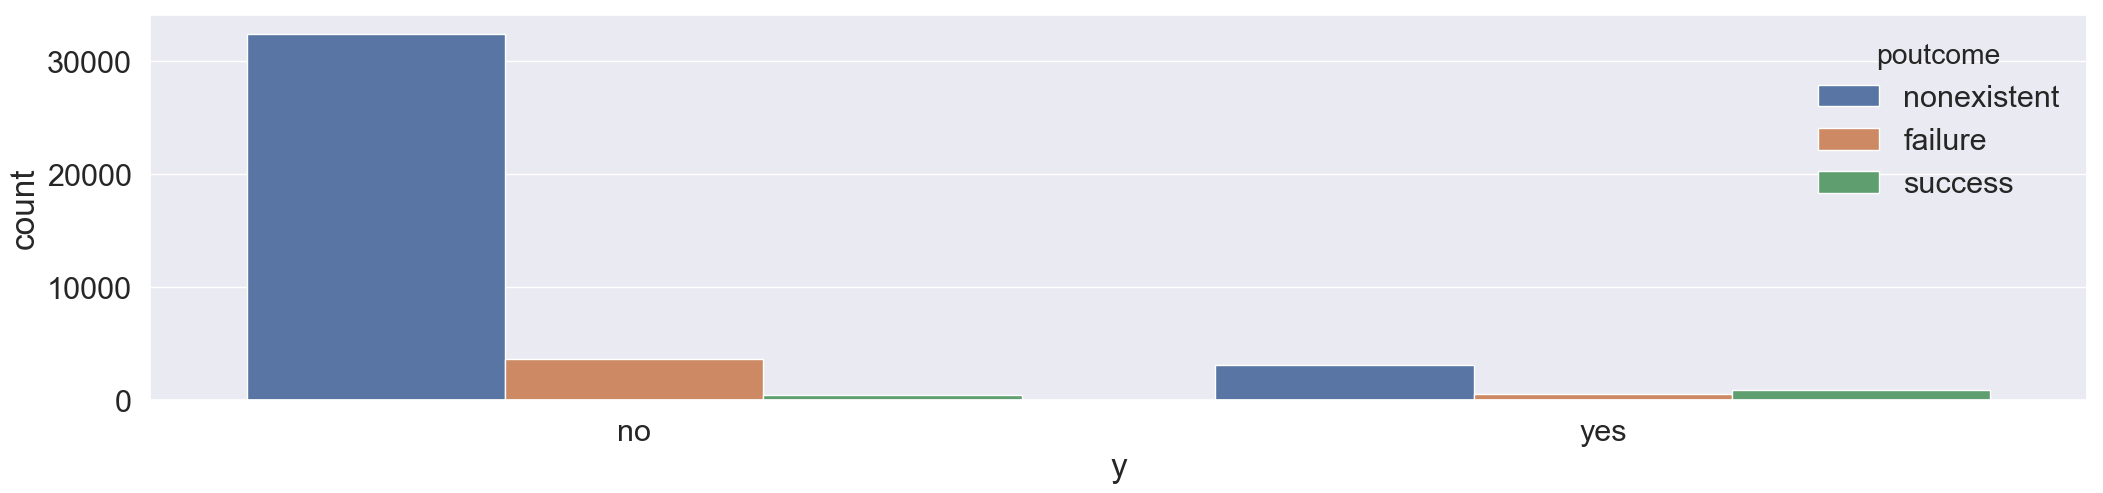

In [125]:
plt.figure(figsize=(25, 5))
sns.countplot(x='y', hue=discrete_features[9], data=data)
plt.show()

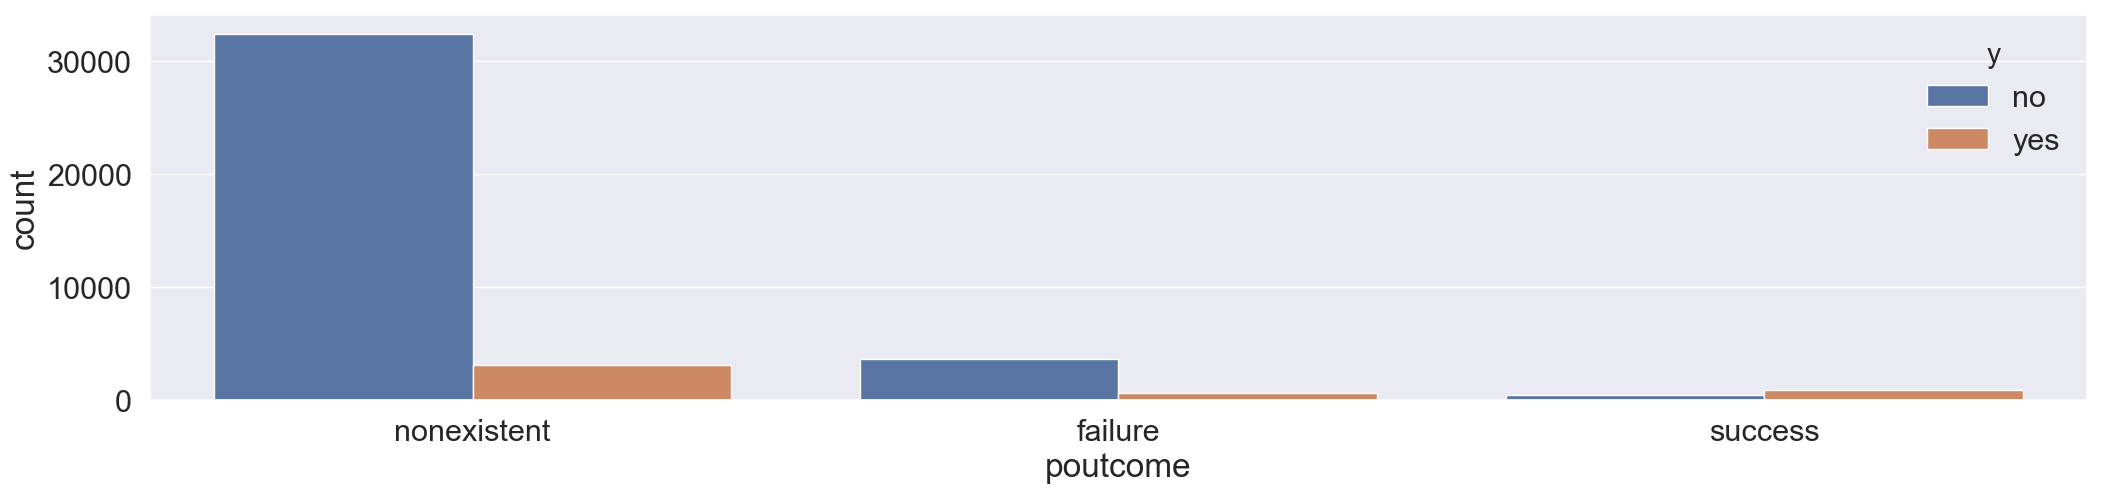

In [126]:
plt.figure(figsize=(25, 5))
sns.countplot(x=discrete_features[9], hue='y', data=data)
plt.show()

# Multivariate analysis

## Pair plots

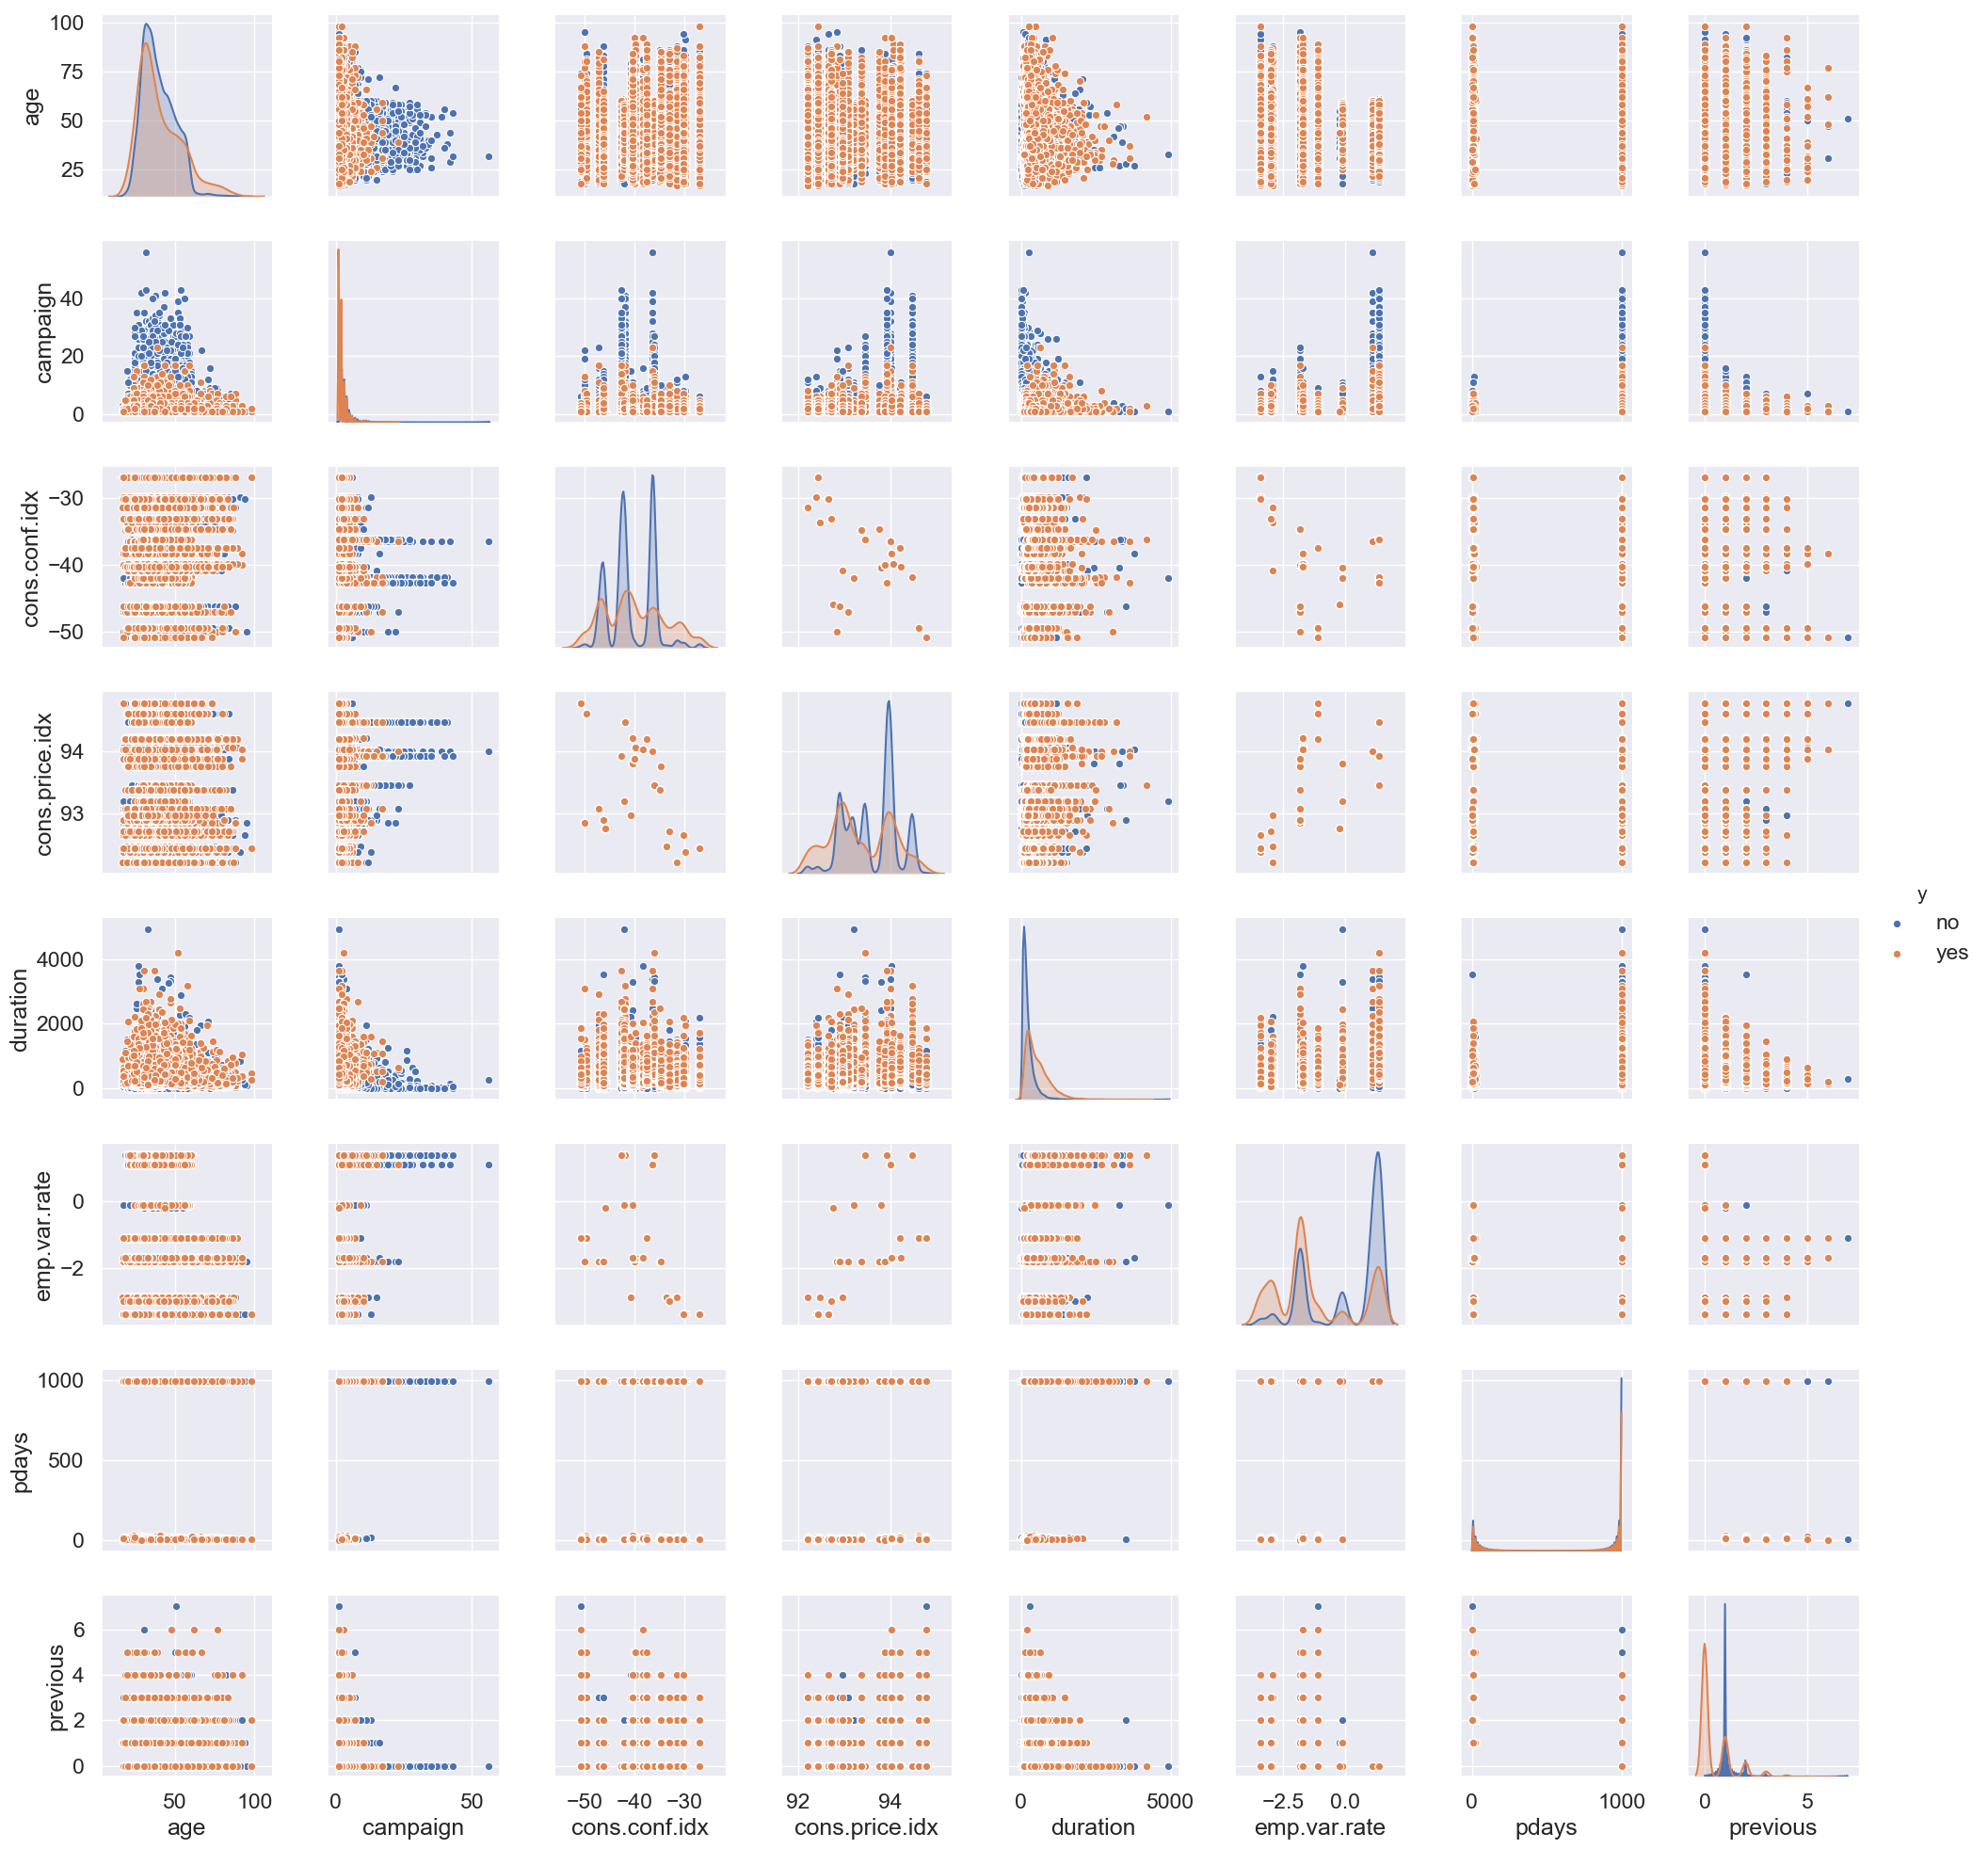

In [141]:
sns.set(font_scale=1.5)
sns.pairplot(data=data[continuous_features + ['y']], hue='y')
plt.show()

## Different correlation coefficients

## FaceGrid

## CatPlot

# Conclusion